In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
census = pd.read_csv("D:\\Data Science\\Machine Learning\\K-Means\\Assignment\\adult.csv")

In [3]:
census.head()

age         workclass  fnlwgt  education education_num      marital_status  \
0  39         State-gov   77516  Bachelors            13       Never-married   
1  50  Self-emp-not-inc   83311  Bachelors            13  Married-civ-spouse   
2  38           Private  215646    HS-grad             9            Divorced   
3  53           Private  234721       11th             7  Married-civ-spouse   
4  28           Private  338409  Bachelors            13  Married-civ-spouse   

          occupation   relationship   race     sex  capital_gain  \
0       Adm-clerical  Not-in-family  White    Male          2174   
1    Exec-managerial        Husband  White    Male             0   
2  Handlers-cleaners  Not-in-family  White    Male             0   
3  Handlers-cleaners        Husband  Black  #NAME?             0   
4     Prof-specialty           Wife  Black  Female             0   

   capital_loss  hours_per_week native_country income  
0             0              40  United-States  <=50K  
1             0              13  United-States  <=50K  
2             0              40  United-States  <=50K  
3             0              40  United-States  <=50K  
4             0              40           Cuba  <=50K

In [4]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             5000 non-null   object
 1   workclass       5000 non-null   object
 2   fnlwgt          5000 non-null   object
 3   education       5000 non-null   object
 4   education_num   5000 non-null   object
 5   marital_status  5000 non-null   object
 6   occupation      5000 non-null   object
 7   relationship    5000 non-null   object
 8   race            5000 non-null   object
 9   sex             5000 non-null   object
 10  capital_gain    5000 non-null   int64 
 11  capital_loss    5000 non-null   int64 
 12  hours_per_week  5000 non-null   int64 
 13  native_country  5000 non-null   object
 14  income          5000 non-null   object
dtypes: int64(3), object(12)
memory usage: 586.1+ KB


In [ ]:
census['hours_per_week'].value_counts().sort_index()

In [ ]:
print(census['fnlwgt'].value_counts())

##### There are some missing values in dataset. need to be assigned null

In [5]:
census['age'].replace('#NAME?',census['age'].mode()[0],inplace=True)

In [6]:
census['workclass'].replace('?','Private',inplace=True)

In [ ]:
##census['fnlwgt'].replace('#NAME?',census['fnlwgt'].mean,inplace=True)

In [7]:
census['education'].replace('?','HS-grad',inplace=True)

In [8]:
census['occupation'].replace('?','others',inplace=True)

In [9]:
census['sex'].replace('#NAME?','Male',inplace=True)

In [10]:
census['native_country'].replace('?','United-States',inplace=True)

In [11]:
census['race'].replace('#NAME?','White',inplace=True)

In [12]:
census.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [26]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             5000 non-null   float64 
 1   workclass       5000 non-null   category
 2   fnlwgt          5000 non-null   float64 
 3   education       5000 non-null   category
 4   occupation      5000 non-null   category
 5   race            5000 non-null   category
 6   sex             5000 non-null   category
 7   capital_gain    5000 non-null   int64   
 8   capital_loss    5000 non-null   int64   
 9   hours_per_week  5000 non-null   int64   
 10  native_country  5000 non-null   category
 11  income          5000 non-null   object  
dtypes: category(6), float64(2), int64(3), object(1)
memory usage: 267.5+ KB


##### There are some non-contributing data in this dataset. so it's better to drop them off. They are marital status, relationship, race

In [13]:
census = census.drop(['marital_status','relationship','education_num'],axis=1)

In [15]:
census['age'].unique()

array([39., 50., 38., 53., 28., 37., 49., 52., 31., 42., 30., 23., 32.,
       40., 34., 43., 54., 35., 59., 56., 19., 20., 45., 22., 48., 21.,
       24., 25., 57., 44., 41., 29., 18., 47., 46., 36., 79., 27., 67.,
       33., 76., 17., 55., 61., 70., 64., 71., 68., 66., 51., 58., 26.,
       60., 90., 75., 65., 77., 62., 63., 80., 72., 74., 69., 73., 81.,
       78., 88., 82.])

In [14]:
census['age'] = census['age'].astype(np.float)
census['workclass'] = census['workclass'].astype('category')
census['education'] = census['education'].astype('category')
census['occupation'] = census['occupation'].astype('category')
census['native_country'] = census['native_country'].astype('category')

In [16]:
census['fnlwgt'].replace('#NAME?',np.nan,inplace=True)

In [19]:
census['fnlwgt'] = census['fnlwgt'].astype(np.float)

In [21]:
census['fnlwgt'].median()

179533.0

In [22]:
census['fnlwgt'].replace(np.nan,census['fnlwgt'].median(),inplace=True)

In [25]:
census['race'] = census['race'].astype('category')
census['sex'] = census['sex'].astype('category')

In [27]:
census_X = census.drop('income', axis=1)
census_Y = census['income']

In [34]:
df1=pd.get_dummies(census_X)

In [53]:
final_census_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 94 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   age                                        5000 non-null   float64
 1   fnlwgt                                     5000 non-null   float64
 2   capital_gain                               5000 non-null   int64  
 3   capital_loss                               5000 non-null   int64  
 4   hours_per_week                             5000 non-null   int64  
 5   age                                        5000 non-null   float64
 6   fnlwgt                                     5000 non-null   float64
 7   capital_gain                               5000 non-null   int64  
 8   capital_loss                               5000 non-null   int64  
 9   hours_per_week                             5000 non-null   int64  
 10  workclass_Federal-gov   

In [42]:
census_X = census_X.drop(['workclass','education','occupation','native_country','race','sex'],axis=1)

KeyError: "['workclass' 'education' 'occupation' 'native_country' 'race' 'sex'] not found in axis"

In [52]:
final_census_X = pd.concat([census_X,df1],axis=1)

In [66]:
train_x, test_x, train_y, test_y = train_test_split(final_census_X, census_Y, test_size=0.2, random_state=42)

In [67]:
test_x.shape

(1000, 94)

In [69]:
def errormetrics(a,b):
    print(accuracy_score(a,b))
    print(confusion_matrix(a,b))
    print(classification_report(a,b))

#### Logistic Regression

In [70]:
lr = LogisticRegression()
lr.fit(train_x,train_y)
y_pred = lr.predict(test_x)
errormetrics(test_y,y_pred)

0.779
[[713  23]
 [198  66]]
              precision    recall  f1-score   support

       <=50K       0.78      0.97      0.87       736
        >50K       0.74      0.25      0.37       264

    accuracy                           0.78      1000
   macro avg       0.76      0.61      0.62      1000
weighted avg       0.77      0.78      0.74      1000



#### Decision tree

In [71]:
dt = DecisionTreeClassifier()
dt.fit(train_x,train_y)
y_pred = dt.predict(test_x)
errormetrics(test_y,y_pred)

0.774
[[611 125]
 [101 163]]
              precision    recall  f1-score   support

       <=50K       0.86      0.83      0.84       736
        >50K       0.57      0.62      0.59       264

    accuracy                           0.77      1000
   macro avg       0.71      0.72      0.72      1000
weighted avg       0.78      0.77      0.78      1000



#### Decision tree with params

In [72]:
params_dt = {'criterion':['gini','entropy'], 'max_depth' : np.arange(1,50), 'min_samples_split':np.arange(1,5),'min_samples_leaf':np.arange(1,5)}

In [73]:
gs_dt = GridSearchCV(dt,params_dt,verbose=3)

In [74]:
gs_dt.fit(train_x,train_y)

Fitting 5 folds for each of 1568 candidates, totalling 7840 fits
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, m

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\

[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=3, score=0.812, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=3, score=0.806, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=3, score=0.797, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=3, score=0.807, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=4 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=4, score=0.799, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=4 
[CV]  criterion=gini, max_depth=1, 

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=2, score=0.799, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=2, score=0.812, total=   0.0s
[CV] criterion=

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=4, score=0.806, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=4, score=0.797, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=4, score=0.807, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterio

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=3, score=0.807, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=4, score=0.799, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=4, score=0.812, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=4, score=0.806, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=4, score=0.797, total=   0.0s
[CV] criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=4, score=0.807, total=   0.0s
[CV] cr

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3, score=0.812, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3, score=0.805, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3, score=0.797, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3, score=0.806, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=4 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=4, score=0.799, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=4 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=4, score=0.812, total=   0.0s
[CV] cr

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2, score=0.805, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2, score=0.797, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2, score=0.806, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=3, score=0.799, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=3, score=0.812, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=3, score=0.805, total=   0.0s
[CV] cr

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=2, score=0.799, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=2, score=0.812, total=   0.0s
[CV] criterion=

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=2, score=0.806, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=3, score=0.799, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=3, score=0.812, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=3, score=0.805, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=3, score=0.797, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=3, score=0.806, total=   0.0s
[CV] cr

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, score=0.812, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, score=0.824, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, score=0.824, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, score=0.815, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, score=0.820, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=3, score=0.812, total=   0.0s
[CV] cr

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=3, score=0.824, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=3, score=0.814, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=3, score=0.820, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=4, score=0.812, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=4, score=0.824, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=4, score=0.823, total=   0.0s
[CV] cr

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=2, score=0.823, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=2, score=0.815, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=2, score=0.820, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=3, score=0.812, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=3, score=0.824, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=3, score=0.823, total=   0.0s
[CV] cr

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=2, score=0.812, total=   0.0s
[CV] criterion=gi

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2, score=0.828, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2, score=0.825, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2, score=0.816, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2, score=0.821, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=3, score=0.812, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=3, score=0.828, total=   0.0s
[CV] cr

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=3, score=0.812, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=3, score=0.829, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=3, score=0.825, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=3, score=0.815, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=3, score=0.821, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=4, score=0.812, total=   0.0s
[CV] cr

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2, score=0.812, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=4, min_samp

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=2, score=0.825, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=2, score=0.816, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=2, score=0.823, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=3, score=0.811, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=3, score=0.829, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=3, score=0.825, total=   0.0s
[CV] cr

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=3, score=0.819, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=3, score=0.828, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=3, score=0.829, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=3, score=0.814, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=3, score=0.824, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=4 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=4, score=0.818, total=   0.0s
[CV] cr

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2, score=0.819, total=   0.0s
[CV] criterion=gi

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=2, score=0.819, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=2, score=0.826, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=2, score=0.826, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=2, score=0.816, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=2, score=0.824, total=   0.0s
[CV] crit

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV] criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=3, score=0.818, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=3, score=0.829, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=3, score=0.826, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=3, score=0.815, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=3, score=0.825, total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=5, 

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=3, score=0.826, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=3, score=0.835, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=3, score=0.812, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=3, score=0.823, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=4 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=4, score=0.820, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=4 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=4, score=0.826, total=   0.0s
[CV] cr

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=2, score=0.820, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=2, score=0.826, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=2, score=0.834, total=   0.0s
[CV] criterio

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=2, score=0.823, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=2, score=0.825, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=2, score=0.830, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=2, score=0.810, total=   0.0s
[CV] criter

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g


[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=2, score=0.828, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=2, score=0.831, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=2, score=0.815, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=2, score=0.828, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=3, score=0.823, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=3, score=0.828, total=   0.0s
[CV] c

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=2, score=0.824, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=2, score=0.821, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=2, score=0.810, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=2, score=0.814, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=2, score=0.824, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=3, score=0.825, total=   0.0s
[CV] cr

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=2, score=0.825, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=2, score=0.809, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=2, score=0.812, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=2, score=0.826, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=3, score=0.825, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=3, score=0.824, total=   0.0s
[CV] cr

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=2, score=0.824, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=2, score=0.810, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=2, score=0.814, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=2, score=0.829, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=3, score=0.826, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=3, score=0.824, total=   0.0s
[CV] cr

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=2, score=0.826, total=   0.0s
[CV] criterion=gi

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=2, score=0.814, total=   0.0s
[CV] criterion=gi

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=3, score=0.830, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=3, score=0.804, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=3, score=0.802, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=3, score=0.823, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=4, score=0.815, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=4, score=0.831, total=   0.0s
[CV] cr

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=3, score=0.831, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=3, score=0.800, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=3, score=0.804, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=3, score=0.825, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=4, score=0.816, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=4, score=0.830, total=   0.0s
[CV] cr

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=2, score=0.818, total=   0.0s
[CV] criterion=gi

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=3, score=0.825, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=3, score=0.812, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=3, score=0.809, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=3, score=0.821, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=4 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=4, score=0.809, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=4 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=4, score=0.825, total=   0.0s
[CV] cr

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=2, score=0.824, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=3, score=0.805, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=3, score=0.826, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=3, score=0.814, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=3, score=0.805, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=3, score=0.828, total=   0.0s
[CV] cr

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2, score=0.804, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2, score=0.830, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=3, score=0.811, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=3, score=0.828, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=3, score=0.814, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=3, score=0.805, total=   0.0s
[CV] cr

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=2, score=0.814, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=2, score=0.828, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=3, score=0.811, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=3, score=0.826, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=3, score=0.810, total=   0.0s
[CV] criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=3, score=0.814, total=   0.0s
[CV] cr

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, score=0.799, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, score=0.821, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=3, score=0.811, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=3, score=0.818, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=3, score=0.807, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=3, score=0.794, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=2, score=0.818, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=2, score=0.811, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=2, score=0.789, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=2, score=0.823, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=3, score=0.812, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=3, score=0.821, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=2, score=0.814, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=2, score=0.810, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=2, score=0.789, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=2, score=0.830, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=3, score=0.812, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=3, score=0.814, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=2, score=0.807, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=2, score=0.828, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=2, score=0.805, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=2, score=0.797, total=   0.0s


C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=11, min_samples_leaf=1, min_samples_split=3, score=0.804, total=   0.0s
[CV] criterion=gini, max_depth=11, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=1, min_samples_split=3, score=0.816, total=   0.0s
[CV] criterion=gini, max_depth=11, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=1, min_samples_split=3, score=0.810, total=   0.0s
[CV] criterion=gini, max_depth=11, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=1, min_samples_split=3, score=0.800, total=   0.0s
[CV] criterion=gini, max_depth=11, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=1, min_samples_split=3, score=0.811, total=   0.0s
[CV] criterion=gini, max_depth=11, min_samples_leaf=1, min_samples_split=4 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=1, min_samples_split=4, score=0.806, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=2, score=0.794, total=   0.0s
[CV] criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=2, score=0.807, total=   0.0s
[CV] criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=3, score=0.807, total=   0.0s
[CV] criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=3, score=0.811, total=   0.0s
[CV] criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=3, score=0.819, total=   0.0s
[CV] criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=3, score=0.789, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=11, min_samples_leaf=3, min_samples_split=2, score=0.815, total=   0.0s
[CV] criterion=gini, max_depth=11, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=3, min_samples_split=2, score=0.787, total=   0.0s
[CV] criterion=gini, max_depth=11, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=3, min_samples_split=2, score=0.807, total=   0.0s
[CV] criterion=gini, max_depth=11, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=3, min_samples_split=3, score=0.814, total=   0.0s
[CV] criterion=gini, max_depth=11, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=3, min_samples_split=3, score=0.820, total=   0.0s
[CV] criterion=gini, max_depth=11, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=3, min_samples_split=3, score=0.816, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=2, score=0.810, total=   0.0s
[CV] criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=2, score=0.824, total=   0.0s
[CV] criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=2, score=0.809, total=   0.0s
[CV] criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=2, score=0.799, total=   0.0s
[CV] criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=2, score=0.812, total=   0.0s
[CV] criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=3, score=0.810, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=2, score=0.797, total=   0.0s
[CV] criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=2, score=0.811, total=   0.0s
[CV]

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=2, score=0.804, total=   0.0s
[CV] criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=3, score=0.792, total=   0.0s
[CV] criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=3, score=0.811, total=   0.0s
[CV] criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=3, score=0.799, total=   0.0s
[CV] criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=3, score=0.790, total=   0.0s
[CV] criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=3, score=0.806, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=2, score=0.812, total=   0.0s
[CV] criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=2, score=0.807, total=   0.0s
[CV] criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=2, score=0.789, total=   0.0s
[CV] criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=2, score=0.804, total=   0.0s
[CV] criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=3, score=0.804, total=   0.0s
[CV] criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=3, score=0.811, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=2, score=0.799, total=   0.0s
[CV] criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=2, score=0.821, total=   0.0s
[CV] criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=2, score=0.802, total=   0.0s
[CV] criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=2, score=0.796, total=   0.0s


C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=13, min_samples_leaf=1, min_samples_split=2, score=0.801, total=   0.0s
[CV] criterion=gini, max_depth=13, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=1, min_samples_split=3, score=0.789, total=   0.0s
[CV] criterion=gini, max_depth=13, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=1, min_samples_split=3, score=0.814, total=   0.0s
[CV] criterion=gini, max_depth=13, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=1, min_samples_split=3, score=0.797, total=   0.0s
[CV] criterion=gini, max_depth=13, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=1, min_samples_split=3, score=0.795, total=   0.0s
[CV] criterion=gini, max_depth=13, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=1, min_samples_split=3, score=0.802, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=2, score=0.802, total=   0.0s
[CV] criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=2, score=0.804, total=   0.0s
[CV] criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=2, score=0.794, total=   0.0s
[CV] criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=3, score=0.792, total=   0.0s
[CV] criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=3, score=0.811, total=   0.0s
[CV] criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=3, score=0.801, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=13, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=13, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=3, min_samples_split=2, score=0.794, total=   0.0s
[CV] criterion=gini, max_depth=13, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=3, min_samples_split=2, score=0.810, total=   0.0s
[CV] criterion=gini, max_depth=13, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=3, min_samples_split=2, score=0.807, total=   0.0s
[CV] criterion=gini, max_depth=13, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=3, min_samples_split=2, score=0.791, total=   0.0s
[CV] criterion=gini, max_depth=13, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=3, min_samples_split=2, score=0.796, total=   0.0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=2, score=0.802, total=   0.0s
[CV] criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=2, score=0.810, total=   0.0s
[CV] criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=3, score=0.796, total=   0.0s
[CV] criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=3, score=0.820, total=   0.0s
[CV] criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=3, score=0.795, total=   0.0s
[CV] criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=3, score=0.802, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=14, min_samples_leaf=1, min_samples_split=2, score=0.804, total=   0.0s
[CV] criterion=gini, max_depth=14, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=1, min_samples_split=2, score=0.795, total=   0.0s
[CV] criterion=gini, max_depth=14, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=1, min_samples_split=2, score=0.799, total=   0.0s
[CV] criterion=gini, max_depth=14, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=1, min_samples_split=2, score=0.794, total=   0.0s
[CV] criterion=gini, max_depth=14, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=1, min_samples_split=3, score=0.789, total=   0.0s
[CV] criterion=gini, max_depth=14, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=1, min_samples_split=3, score=0.812, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=2, score=0.794, total=   0.0s
[CV] criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=2, score=0.802, total=   0.0s
[CV]

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=2, score=0.802, total=   0.0s
[CV] criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=2, score=0.795, total=   0.0s
[CV] criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=2, score=0.796, total=   0.0s
[CV] criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=3, score=0.796, total=   0.0s
[CV] criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=3, score=0.809, total=   0.0s
[CV] criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=3, score=0.806, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=2, score=0.796, total=   0.0s
[CV] criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=2, score=0.818, total=   0.0s
[CV]

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=2, score=0.789, total=   0.0s
[CV] criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=2, score=0.809, total=   0.0s
[CV] criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=3, score=0.790, total=   0.0s
[CV] criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=3, score=0.807, total=   0.0s
[CV] criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=3, score=0.810, total=   0.0s
[CV] criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=3, score=0.792, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=2, score=0.794, total=   0.0s
[CV] criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=2, score=0.804, total=   0.0s
[CV] criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=2, score=0.809, total=   0.0s
[CV] criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=2, score=0.794, total=   0.0s
[CV] criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=2, score=0.800, total=   0.0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=2, score=0.797, total=   0.0s
[CV] criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=2, score=0.797, total=   0.0s
[CV] criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=3, score=0.794, total=   0.0s
[CV] criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=3, score=0.799, total=   0.0s
[CV] criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=3, score=0.801, total=   0.0s
[CV] criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=3, score=0.799, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=15, min_samples_leaf=4, min_samples_split=2, score=0.796, total=   0.0s
[CV] criterion=gini, max_depth=15, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=4, min_samples_split=2, score=0.818, total=   0.0s
[CV] criterion=gini, max_depth=15, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=4, min_samples_split=2, score=0.797, total=   0.0s
[CV] criterion=gini, max_depth=15, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=4, min_samples_split=2, score=0.800, total=   0.0s
[CV] criterion=gini, max_depth=15, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=4, min_samples_split=2, score=0.804, total=   0.0s
[CV] criterion=gini, max_depth=15, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=4, min_samples_split=3, score=0.794, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=16, min_samples_leaf=1, min_samples_split=3, score=0.781, total=   0.0s
[CV] criterion=gini, max_depth=16, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=1, min_samples_split=3, score=0.807, total=   0.0s
[CV] criterion=gini, max_depth=16, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=1, min_samples_split=3, score=0.800, total=   0.0s
[CV] criterion=gini, max_depth=16, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=1, min_samples_split=3, score=0.779, total=   0.0s
[CV] criterion=gini, max_depth=16, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=1, min_samples_split=3, score=0.787, total=   0.0s
[CV] criterion=gini, max_depth=16, min_samples_leaf=1, min_samples_split=4 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=1, min_samples_split=4, score=0.786, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=2, score=0.797, total=   0.0s
[CV] criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=2, score=0.791, total=   0.0s
[CV] criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=3, score=0.792, total=   0.0s
[CV] criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=3, score=0.799, total=   0.0s
[CV] criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=3, score=0.801, total=   0.0s
[CV] criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=3, score=0.791, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=2, score=0.806, total=   0.0s
[CV] criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=2, score=0.796, total=   0.0s
[CV] criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=2, score=0.791, total=   0.0s
[CV] criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=2, score=0.795, total=   0.0s
[CV] criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=3, score=0.794, total=   0.0s
[CV] criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=3, score=0.802, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=2, score=0.791, total=   0.0s
[CV] c

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=17, min_samples_leaf=1, min_samples_split=2, score=0.782, total=   0.0s
[CV] criterion=gini, max_depth=17, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=1, min_samples_split=2, score=0.780, total=   0.0s
[CV] criterion=gini, max_depth=17, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=1, min_samples_split=2, score=0.792, total=   0.0s
[CV] criterion=gini, max_depth=17, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=1, min_samples_split=3, score=0.784, total=   0.0s
[CV] criterion=gini, max_depth=17, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=1, min_samples_split=3, score=0.802, total=   0.0s
[CV] criterion=gini, max_depth=17, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=1, min_samples_split=3, score=0.792, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=17, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=17, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=17, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=17, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=17, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=17, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=2, min_samples_split=2, score=0.784, total=   0.0s
[CV] c

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g


[CV]  criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=2, score=0.791, total=   0.0s
[CV] criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=2, score=0.790, total=   0.0s
[CV] criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=2, score=0.800, total=   0.0s
[CV] criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=3, score=0.796, total=   0.0s
[CV] criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=3, score=0.794, total=   0.0s
[CV] criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=3, score=0.795, total=   

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=17, min_samples_leaf=4, min_samples_split=2, score=0.802, total=   0.0s
[CV] criterion=gini, max_depth=17, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=4, min_samples_split=2, score=0.812, total=   0.0s
[CV] criterion=gini, max_depth=17, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=4, min_samples_split=3, score=0.791, total=   0.0s
[CV] criterion=gini, max_depth=17, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=4, min_samples_split=3, score=0.815, total=   0.0s
[CV] criterion=gini, max_depth=17, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=4, min_samples_split=3, score=0.789, total=   0.0s
[CV] criterion=gini, max_depth=17, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=4, min_samples_split=3, score=0.790, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=18, min_samples_leaf=1, min_samples_split=2, score=0.765, total=   0.0s
[CV] criterion=gini, max_depth=18, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=1, min_samples_split=2, score=0.799, total=   0.0s
[CV] criterion=gini, max_depth=18, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=1, min_samples_split=2, score=0.782, total=   0.0s
[CV] criterion=gini, max_depth=18, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=1, min_samples_split=2, score=0.789, total=   0.0s
[CV] criterion=gini, max_depth=18, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=1, min_samples_split=2, score=0.781, total=   0.0s
[CV] criterion=gini, max_depth=18, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=1, min_samples_split=3, score=0.776, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=2, score=0.790, total=   0.0s
[CV] criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=2, score=0.799, total=   0.0s
[CV] criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=3, score=0.790, total=   0.0s
[CV] criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=3, score=0.790, total=   0.0s
[CV] criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=3, score=0.802, total=   0.0s
[CV] criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=3, score=0.796, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=2, score=0.794, total=   0.0s
[CV] criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=2, score=0.795, total=   0.0s
[CV]

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=2, score=0.786, total=   0.0s
[CV] criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=2, score=0.800, total=   0.0s
[CV] criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=2, score=0.809, total=   0.0s
[CV] criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=3, score=0.787, total=   0.0s
[CV] criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=3, score=0.820, total=   0.0s
[CV] criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=3, score=0.790, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=19, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=19, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=19, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=19, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=1, min_samples_split=2, score=0.777, total=   0.0s
[CV] criterion=gini, max_depth=19, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=1, min_samples_split=2, score=0.799, total=   0.0s
[CV] criterion=gini, max_depth=19, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=1, min_samples_split=2, score=0.786, total=   0.0s
[C

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=2, score=0.791, total=   0.0s
[CV] criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=2, score=0.802, total=   0.0s
[CV] criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=2, score=0.790, total=   0.0s
[CV] criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=2, score=0.795, total=   0.0s


C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=2, score=0.794, total=   0.0s
[CV] criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=2, score=0.785, total=   0.0s
[CV] criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=2, score=0.796, total=   0.0s
[CV] criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=2, score=0.799, total=   0.0s
[CV] criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=3, score=0.792, total=   0.0s
[CV] criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=3, score=0.794, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=3, score=0.790, total=   0.0s
[CV] criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=3, score=0.812, total=   0.0s
[CV] criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=3, score=0.781, total=   0.0s
[CV] criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=3, score=0.787, total=   0.0s
[CV] criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=3, score=0.814, total=   0.0s
[CV] criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=4, score=0.790, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=2, score=0.784, total=   0.0s
[CV] criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=2, score=0.779, total=   0.0s
[CV] criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=3, score=0.771, total=   0.0s
[CV] criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=3, score=0.795, total=   0.0s
[CV] criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=3, score=0.789, total=   0.0s
[CV] criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=3, score=0.787, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=2, min_samples_split=2, score=0.776, total=   0.0s
[CV] c

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=20, min_samples_leaf=3, min_samples_split=2, score=0.792, total=   0.0s
[CV] criterion=gini, max_depth=20, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=3, min_samples_split=2, score=0.787, total=   0.0s
[CV] criterion=gini, max_depth=20, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=3, min_samples_split=2, score=0.795, total=   0.0s
[CV] criterion=gini, max_depth=20, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=3, min_samples_split=2, score=0.799, total=   0.0s
[CV] criterion=gini, max_depth=20, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=3, min_samples_split=3, score=0.790, total=   0.0s
[CV] criterion=gini, max_depth=20, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=3, min_samples_split=3, score=0.790, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=2, score=0.795, total=   0.0s
[CV] criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=2, score=0.795, total=   0.0s
[CV] criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=3, score=0.790, total=   0.0s
[CV] criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=3, score=0.811, total=   0.0s
[CV] criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=3, score=0.782, total=   0.0s
[CV] criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=4, min_samples_split=3, score=0.804, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=21, min_samples_leaf=1, min_samples_split=2, score=0.774, total=   0.0s
[CV] criterion=gini, max_depth=21, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=21, min_samples_leaf=1, min_samples_split=2, score=0.780, total=   0.0s
[CV] criterion=gini, max_depth=21, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=21, min_samples_leaf=1, min_samples_split=3, score=0.772, total=   0.0s
[CV] criterion=gini, max_depth=21, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=21, min_samples_leaf=1, min_samples_split=3, score=0.809, total=   0.0s
[CV] criterion=gini, max_depth=21, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=21, min_samples_leaf=1, min_samples_split=3, score=0.790, total=   0.0s
[CV] criterion=gini, max_depth=21, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=21, min_samples_leaf=1, min_samples_split=3, score=0.769, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=21, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=21, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=gini, max_depth=21, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=21, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=gini, max_depth=21, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=21, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=gini, max_depth=21, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=21, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=gini, max_depth=21, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=21, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=21, min_samples_leaf=2, min_samples_split=2, score=0.790, total=   0.0s
[CV] c

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=21, min_samples_leaf=3, min_samples_split=2, score=0.787, total=   0.0s
[CV] criterion=gini, max_depth=21, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=21, min_samples_leaf=3, min_samples_split=2, score=0.796, total=   0.0s
[CV] criterion=gini, max_depth=21, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=21, min_samples_leaf=3, min_samples_split=3, score=0.794, total=   0.0s
[CV] criterion=gini, max_depth=21, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=21, min_samples_leaf=3, min_samples_split=3, score=0.794, total=   0.0s
[CV] criterion=gini, max_depth=21, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=21, min_samples_leaf=3, min_samples_split=3, score=0.786, total=   0.0s
[CV] criterion=gini, max_depth=21, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=21, min_samples_leaf=3, min_samples_split=3, score=0.790, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=21, min_samples_leaf=4, min_samples_split=2, score=0.794, total=   0.0s
[CV] criterion=gini, max_depth=21, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=21, min_samples_leaf=4, min_samples_split=2, score=0.814, total=   0.0s
[CV] criterion=gini, max_depth=21, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=21, min_samples_leaf=4, min_samples_split=2, score=0.779, total=   0.0s
[CV] criterion=gini, max_depth=21, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=21, min_samples_leaf=4, min_samples_split=2, score=0.794, total=   0.0s
[CV] criterion=gini, max_depth=21, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=21, min_samples_leaf=4, min_samples_split=2, score=0.801, total=   0.0s
[CV] criterion=gini, max_depth=21, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=21, min_samples_leaf=4, min_samples_split=3, score=0.792, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=22, min_samples_leaf=1, min_samples_split=2, score=0.801, total=   0.0s
[CV] criterion=gini, max_depth=22, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=22, min_samples_leaf=1, min_samples_split=2, score=0.780, total=   0.0s
[CV] criterion=gini, max_depth=22, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=22, min_samples_leaf=1, min_samples_split=2, score=0.782, total=   0.0s
[CV] criterion=gini, max_depth=22, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=22, min_samples_leaf=1, min_samples_split=2, score=0.775, total=   0.0s
[CV] criterion=gini, max_depth=22, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=22, min_samples_leaf=1, min_samples_split=3, score=0.770, total=   0.0s
[CV] criterion=gini, max_depth=22, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=22, min_samples_leaf=1, min_samples_split=3, score=0.804, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=22, min_samples_leaf=2, min_samples_split=2, score=0.787, total=   0.0s
[CV] criterion=gini, max_depth=22, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=22, min_samples_leaf=2, min_samples_split=2, score=0.791, total=   0.0s
[CV] criterion=gini, max_depth=22, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=22, min_samples_leaf=2, min_samples_split=3, score=0.795, total=   0.0s
[CV] criterion=gini, max_depth=22, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=22, min_samples_leaf=2, min_samples_split=3, score=0.791, total=   0.0s
[CV] criterion=gini, max_depth=22, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=22, min_samples_leaf=2, min_samples_split=3, score=0.792, total=   0.0s
[CV] criterion=gini, max_depth=22, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=22, min_samples_leaf=2, min_samples_split=3, score=0.796, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=22, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=22, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=gini, max_depth=22, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=22, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=gini, max_depth=22, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=22, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=22, min_samples_leaf=3, min_samples_split=2, score=0.787, total=   0.0s
[CV] criterion=gini, max_depth=22, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=22, min_samples_leaf=3, min_samples_split=2, score=0.790, total=   0.0s
[CV] criterion=gini, max_depth=22, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=22, min_samples_leaf=3, min_samples_split=2, score=0.781, total=   0.0s
[C

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=22, min_samples_leaf=4, min_samples_split=2, score=0.812, total=   0.0s
[CV] criterion=gini, max_depth=22, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=22, min_samples_leaf=4, min_samples_split=2, score=0.781, total=   0.0s
[CV] criterion=gini, max_depth=22, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=22, min_samples_leaf=4, min_samples_split=2, score=0.796, total=   0.0s
[CV] criterion=gini, max_depth=22, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=22, min_samples_leaf=4, min_samples_split=2, score=0.814, total=   0.0s
[CV] criterion=gini, max_depth=22, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=22, min_samples_leaf=4, min_samples_split=3, score=0.790, total=   0.0s
[CV] criterion=gini, max_depth=22, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=22, min_samples_leaf=4, min_samples_split=3, score=0.815, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=23, min_samples_leaf=1, min_samples_split=2, score=0.786, total=   0.0s
[CV] criterion=gini, max_depth=23, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=23, min_samples_leaf=1, min_samples_split=3, score=0.779, total=   0.0s
[CV] criterion=gini, max_depth=23, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=23, min_samples_leaf=1, min_samples_split=3, score=0.789, total=   0.0s
[CV] criterion=gini, max_depth=23, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=23, min_samples_leaf=1, min_samples_split=3, score=0.794, total=   0.0s
[CV] criterion=gini, max_depth=23, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=23, min_samples_leaf=1, min_samples_split=3, score=0.772, total=   0.0s
[CV] criterion=gini, max_depth=23, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=23, min_samples_leaf=1, min_samples_split=3, score=0.795, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=23, min_samples_leaf=2, min_samples_split=2, score=0.789, total=   0.0s
[CV] criterion=gini, max_depth=23, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=23, min_samples_leaf=2, min_samples_split=2, score=0.792, total=   0.0s
[CV] criterion=gini, max_depth=23, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=23, min_samples_leaf=2, min_samples_split=2, score=0.795, total=   0.0s
[CV] criterion=gini, max_depth=23, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=23, min_samples_leaf=2, min_samples_split=2, score=0.784, total=   0.0s
[CV] criterion=gini, max_depth=23, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=23, min_samples_leaf=2, min_samples_split=2, score=0.796, total=   0.0s
[CV] criterion=gini, max_depth=23, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=23, min_samples_leaf=2, min_samples_split=3, score=0.785, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=23, min_samples_leaf=3, min_samples_split=2, score=0.795, total=   0.0s
[CV] criterion=gini, max_depth=23, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=23, min_samples_leaf=3, min_samples_split=2, score=0.787, total=   0.0s
[CV] criterion=gini, max_depth=23, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=23, min_samples_leaf=3, min_samples_split=2, score=0.799, total=   0.0s
[CV] criterion=gini, max_depth=23, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=23, min_samples_leaf=3, min_samples_split=3, score=0.785, total=   0.0s
[CV] criterion=gini, max_depth=23, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=23, min_samples_leaf=3, min_samples_split=3, score=0.785, total=   0.0s
[CV] criterion=gini, max_depth=23, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=23, min_samples_leaf=3, min_samples_split=3, score=0.784, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=23, min_samples_leaf=4, min_samples_split=2, score=0.812, total=   0.0s
[CV] criterion=gini, max_depth=23, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=23, min_samples_leaf=4, min_samples_split=3, score=0.791, total=   0.0s
[CV] criterion=gini, max_depth=23, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=23, min_samples_leaf=4, min_samples_split=3, score=0.816, total=   0.0s
[CV] criterion=gini, max_depth=23, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=23, min_samples_leaf=4, min_samples_split=3, score=0.781, total=   0.0s
[CV] criterion=gini, max_depth=23, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=23, min_samples_leaf=4, min_samples_split=3, score=0.796, total=   0.0s
[CV] criterion=gini, max_depth=23, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=23, min_samples_leaf=4, min_samples_split=3, score=0.815, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=24, min_samples_leaf=1, min_samples_split=2, score=0.790, total=   0.0s
[CV] criterion=gini, max_depth=24, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=24, min_samples_leaf=1, min_samples_split=2, score=0.780, total=   0.0s
[CV] criterion=gini, max_depth=24, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=24, min_samples_leaf=1, min_samples_split=2, score=0.774, total=   0.0s
[CV] criterion=gini, max_depth=24, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=24, min_samples_leaf=1, min_samples_split=2, score=0.781, total=   0.0s
[CV] criterion=gini, max_depth=24, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=24, min_samples_leaf=1, min_samples_split=3, score=0.767, total=   0.1s
[CV] criterion=gini, max_depth=24, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=24, min_samples_leaf=1, min_samples_split=3, score=0.791, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=24, min_samples_leaf=2, min_samples_split=2, score=0.789, total=   0.0s
[CV] criterion=gini, max_depth=24, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=24, min_samples_leaf=2, min_samples_split=2, score=0.789, total=   0.0s
[CV] criterion=gini, max_depth=24, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=24, min_samples_leaf=2, min_samples_split=3, score=0.795, total=   0.0s
[CV] criterion=gini, max_depth=24, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=24, min_samples_leaf=2, min_samples_split=3, score=0.779, total=   0.0s
[CV] criterion=gini, max_depth=24, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=24, min_samples_leaf=2, min_samples_split=3, score=0.796, total=   0.0s
[CV] criterion=gini, max_depth=24, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=24, min_samples_leaf=2, min_samples_split=3, score=0.781, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=24, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=24, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=gini, max_depth=24, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=24, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=gini, max_depth=24, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=24, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=24, min_samples_leaf=3, min_samples_split=2, score=0.789, total=   0.0s
[CV] criterion=gini, max_depth=24, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=24, min_samples_leaf=3, min_samples_split=2, score=0.789, total=   0.0s
[CV] criterion=gini, max_depth=24, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=24, min_samples_leaf=3, min_samples_split=2, score=0.781, total=   0.0s
[C

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=24, min_samples_leaf=4, min_samples_split=2, score=0.792, total=   0.0s
[CV] criterion=gini, max_depth=24, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=24, min_samples_leaf=4, min_samples_split=2, score=0.812, total=   0.0s
[CV] criterion=gini, max_depth=24, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=24, min_samples_leaf=4, min_samples_split=2, score=0.786, total=   0.0s
[CV] criterion=gini, max_depth=24, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=24, min_samples_leaf=4, min_samples_split=2, score=0.794, total=   0.0s
[CV] criterion=gini, max_depth=24, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=24, min_samples_leaf=4, min_samples_split=2, score=0.802, total=   0.0s
[CV] criterion=gini, max_depth=24, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=24, min_samples_leaf=4, min_samples_split=3, score=0.790, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=25, min_samples_leaf=1, min_samples_split=2, score=0.771, total=   0.0s
[CV] criterion=gini, max_depth=25, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=1, min_samples_split=2, score=0.775, total=   0.0s
[CV] criterion=gini, max_depth=25, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=1, min_samples_split=3, score=0.769, total=   0.0s
[CV] criterion=gini, max_depth=25, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=1, min_samples_split=3, score=0.787, total=   0.0s
[CV] criterion=gini, max_depth=25, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=1, min_samples_split=3, score=0.784, total=   0.0s
[CV] criterion=gini, max_depth=25, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=1, min_samples_split=3, score=0.779, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=25, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=25, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=25, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=25, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=2, min_samples_split=2, score=0.785, total=   0.0s
[CV] criterion=gini, max_depth=25, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=2, min_samples_split=2, score=0.781, total=   0.0s
[CV] criterion=gini, max_depth=25, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=2, min_samples_split=2, score=0.797, total=   0.0s
[C

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=25, min_samples_leaf=3, min_samples_split=2, score=0.797, total=   0.0s
[CV] criterion=gini, max_depth=25, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=3, min_samples_split=2, score=0.785, total=   0.0s
[CV] criterion=gini, max_depth=25, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=3, min_samples_split=2, score=0.784, total=   0.0s
[CV] criterion=gini, max_depth=25, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=3, min_samples_split=2, score=0.790, total=   0.0s
[CV] criterion=gini, max_depth=25, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=3, min_samples_split=3, score=0.787, total=   0.0s
[CV] criterion=gini, max_depth=25, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=3, min_samples_split=3, score=0.795, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=25, min_samples_leaf=4, min_samples_split=2, score=0.785, total=   0.0s
[CV] criterion=gini, max_depth=25, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=4, min_samples_split=2, score=0.805, total=   0.0s
[CV] criterion=gini, max_depth=25, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=4, min_samples_split=3, score=0.792, total=   0.0s
[CV] criterion=gini, max_depth=25, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=4, min_samples_split=3, score=0.812, total=   0.0s
[CV] criterion=gini, max_depth=25, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=4, min_samples_split=3, score=0.789, total=   0.0s
[CV] criterion=gini, max_depth=25, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=25, min_samples_leaf=4, min_samples_split=3, score=0.789, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=26, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=26, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=26, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=26, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=26, min_samples_leaf=1, min_samples_split=2, score=0.762, total=   0.0s
[CV] criterion=gini, max_depth=26, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=26, min_samples_leaf=1, min_samples_split=2, score=0.780, total=   0.0s
[CV] criterion=gini, max_depth=26, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=26, min_samples_leaf=1, min_samples_split=2, score=0.780, total=   0.0s
[CV] criterion=gini, max_depth=26, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=26, min_samples_leaf=1, min_samples_split=2, score=0.771, total=   0.0s


C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=26, min_samples_leaf=2, min_samples_split=2, score=0.797, total=   0.0s
[CV] criterion=gini, max_depth=26, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=26, min_samples_leaf=2, min_samples_split=2, score=0.789, total=   0.0s
[CV] criterion=gini, max_depth=26, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=26, min_samples_leaf=2, min_samples_split=2, score=0.787, total=   0.0s
[CV] criterion=gini, max_depth=26, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=26, min_samples_leaf=2, min_samples_split=2, score=0.785, total=   0.0s
[CV] criterion=gini, max_depth=26, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=26, min_samples_leaf=2, min_samples_split=2, score=0.792, total=   0.0s
[CV] criterion=gini, max_depth=26, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=26, min_samples_leaf=2, min_samples_split=3, score=0.792, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=26, min_samples_leaf=3, min_samples_split=2, score=0.787, total=   0.0s
[CV] criterion=gini, max_depth=26, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=26, min_samples_leaf=3, min_samples_split=2, score=0.796, total=   0.0s
[CV] criterion=gini, max_depth=26, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=26, min_samples_leaf=3, min_samples_split=2, score=0.795, total=   0.0s
[CV] criterion=gini, max_depth=26, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=26, min_samples_leaf=3, min_samples_split=3, score=0.786, total=   0.0s
[CV] criterion=gini, max_depth=26, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=26, min_samples_leaf=3, min_samples_split=3, score=0.797, total=   0.0s
[CV] criterion=gini, max_depth=26, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=26, min_samples_leaf=3, min_samples_split=3, score=0.792, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=26, min_samples_leaf=4, min_samples_split=2, score=0.802, total=   0.0s
[CV] criterion=gini, max_depth=26, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=26, min_samples_leaf=4, min_samples_split=3, score=0.792, total=   0.0s
[CV] criterion=gini, max_depth=26, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=26, min_samples_leaf=4, min_samples_split=3, score=0.816, total=   0.0s
[CV] criterion=gini, max_depth=26, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=26, min_samples_leaf=4, min_samples_split=3, score=0.780, total=   0.0s
[CV] criterion=gini, max_depth=26, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=26, min_samples_leaf=4, min_samples_split=3, score=0.795, total=   0.0s
[CV] criterion=gini, max_depth=26, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=26, min_samples_leaf=4, min_samples_split=3, score=0.801, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=27, min_samples_leaf=1, min_samples_split=2, score=0.789, total=   0.0s
[CV] criterion=gini, max_depth=27, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=27, min_samples_leaf=1, min_samples_split=2, score=0.782, total=   0.0s
[CV] criterion=gini, max_depth=27, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=27, min_samples_leaf=1, min_samples_split=2, score=0.770, total=   0.0s
[CV] criterion=gini, max_depth=27, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=27, min_samples_leaf=1, min_samples_split=2, score=0.776, total=   0.0s
[CV] criterion=gini, max_depth=27, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=27, min_samples_leaf=1, min_samples_split=3, score=0.767, total=   0.0s
[CV] criterion=gini, max_depth=27, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=27, min_samples_leaf=1, min_samples_split=3, score=0.804, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=27, min_samples_leaf=2, min_samples_split=2, score=0.792, total=   0.0s
[CV] criterion=gini, max_depth=27, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=27, min_samples_leaf=2, min_samples_split=3, score=0.790, total=   0.0s
[CV] criterion=gini, max_depth=27, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=27, min_samples_leaf=2, min_samples_split=3, score=0.785, total=   0.0s
[CV] criterion=gini, max_depth=27, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=27, min_samples_leaf=2, min_samples_split=3, score=0.796, total=   0.0s
[CV] criterion=gini, max_depth=27, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=27, min_samples_leaf=2, min_samples_split=3, score=0.775, total=   0.0s
[CV] criterion=gini, max_depth=27, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=27, min_samples_leaf=2, min_samples_split=3, score=0.796, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=27, min_samples_leaf=3, min_samples_split=2, score=0.785, total=   0.0s
[CV] criterion=gini, max_depth=27, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=27, min_samples_leaf=3, min_samples_split=2, score=0.796, total=   0.0s
[CV] criterion=gini, max_depth=27, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=27, min_samples_leaf=3, min_samples_split=2, score=0.786, total=   0.0s
[CV] criterion=gini, max_depth=27, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=27, min_samples_leaf=3, min_samples_split=2, score=0.791, total=   0.0s
[CV] criterion=gini, max_depth=27, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=27, min_samples_leaf=3, min_samples_split=2, score=0.797, total=   0.0s
[CV] criterion=gini, max_depth=27, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=27, min_samples_leaf=3, min_samples_split=3, score=0.789, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=27, min_samples_leaf=4, min_samples_split=2, score=0.795, total=   0.0s
[CV] criterion=gini, max_depth=27, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=27, min_samples_leaf=4, min_samples_split=2, score=0.794, total=   0.0s
[CV] criterion=gini, max_depth=27, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=27, min_samples_leaf=4, min_samples_split=3, score=0.789, total=   0.0s
[CV] criterion=gini, max_depth=27, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=27, min_samples_leaf=4, min_samples_split=3, score=0.811, total=   0.0s
[CV] criterion=gini, max_depth=27, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=27, min_samples_leaf=4, min_samples_split=3, score=0.784, total=   0.0s
[CV] criterion=gini, max_depth=27, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=27, min_samples_leaf=4, min_samples_split=3, score=0.796, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=28, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=28, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=28, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=28, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=28, min_samples_leaf=1, min_samples_split=2, score=0.744, total=   0.0s
[CV] criterion=gini, max_depth=28, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=28, min_samples_leaf=1, min_samples_split=2, score=0.791, total=   0.0s
[CV] criterion=gini, max_depth=28, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=28, min_samples_leaf=1, min_samples_split=2, score=0.774, total=   0.0s
[CV] criterion=gini, max_depth=28, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=28, min_samples_leaf=1, min_samples_split=2, score=0.769, total=   0.0s


C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=28, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=28, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=gini, max_depth=28, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=28, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=28, min_samples_leaf=2, min_samples_split=2, score=0.796, total=   0.0s
[CV] criterion=gini, max_depth=28, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=28, min_samples_leaf=2, min_samples_split=2, score=0.785, total=   0.0s
[CV] criterion=gini, max_depth=28, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=28, min_samples_leaf=2, min_samples_split=2, score=0.790, total=   0.0s
[CV] criterion=gini, max_depth=28, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=28, min_samples_leaf=2, min_samples_split=2, score=0.790, total=   0.0s


C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=28, min_samples_leaf=3, min_samples_split=2, score=0.780, total=   0.0s
[CV] criterion=gini, max_depth=28, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=28, min_samples_leaf=3, min_samples_split=2, score=0.789, total=   0.0s
[CV] criterion=gini, max_depth=28, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=28, min_samples_leaf=3, min_samples_split=2, score=0.801, total=   0.0s
[CV] criterion=gini, max_depth=28, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=28, min_samples_leaf=3, min_samples_split=3, score=0.790, total=   0.0s
[CV] criterion=gini, max_depth=28, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=28, min_samples_leaf=3, min_samples_split=3, score=0.799, total=   0.0s
[CV] criterion=gini, max_depth=28, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=28, min_samples_leaf=3, min_samples_split=3, score=0.787, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=28, min_samples_leaf=4, min_samples_split=3, score=0.791, total=   0.0s
[CV] criterion=gini, max_depth=28, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=28, min_samples_leaf=4, min_samples_split=3, score=0.811, total=   0.0s
[CV] criterion=gini, max_depth=28, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=28, min_samples_leaf=4, min_samples_split=3, score=0.784, total=   0.0s
[CV] criterion=gini, max_depth=28, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=28, min_samples_leaf=4, min_samples_split=3, score=0.792, total=   0.0s
[CV] criterion=gini, max_depth=28, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=28, min_samples_leaf=4, min_samples_split=3, score=0.799, total=   0.0s
[CV] criterion=gini, max_depth=28, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=28, min_samples_leaf=4, min_samples_split=4, score=0.789, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=29, min_samples_leaf=1, min_samples_split=2, score=0.784, total=   0.0s
[CV] criterion=gini, max_depth=29, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=29, min_samples_leaf=1, min_samples_split=2, score=0.781, total=   0.0s
[CV] criterion=gini, max_depth=29, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=29, min_samples_leaf=1, min_samples_split=2, score=0.759, total=   0.0s
[CV] criterion=gini, max_depth=29, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=29, min_samples_leaf=1, min_samples_split=2, score=0.784, total=   0.0s
[CV] criterion=gini, max_depth=29, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=29, min_samples_leaf=1, min_samples_split=3, score=0.771, total=   0.0s
[CV] criterion=gini, max_depth=29, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=29, min_samples_leaf=1, min_samples_split=3, score=0.791, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=29, min_samples_leaf=2, min_samples_split=2, score=0.781, total=   0.0s
[CV] criterion=gini, max_depth=29, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=29, min_samples_leaf=2, min_samples_split=2, score=0.792, total=   0.0s
[CV] criterion=gini, max_depth=29, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=29, min_samples_leaf=2, min_samples_split=3, score=0.790, total=   0.0s
[CV] criterion=gini, max_depth=29, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=29, min_samples_leaf=2, min_samples_split=3, score=0.792, total=   0.0s
[CV] criterion=gini, max_depth=29, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=29, min_samples_leaf=2, min_samples_split=3, score=0.791, total=   0.0s
[CV] criterion=gini, max_depth=29, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=29, min_samples_leaf=2, min_samples_split=3, score=0.774, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=29, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=29, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=gini, max_depth=29, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=29, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=gini, max_depth=29, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=29, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=gini, max_depth=29, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=29, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=29, min_samples_leaf=3, min_samples_split=2, score=0.790, total=   0.0s
[CV] criterion=gini, max_depth=29, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=29, min_samples_leaf=3, min_samples_split=2, score=0.787, total=   0.0s
[CV]

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=29, min_samples_leaf=4, min_samples_split=2, score=0.780, total=   0.0s
[CV] criterion=gini, max_depth=29, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=29, min_samples_leaf=4, min_samples_split=2, score=0.791, total=   0.0s
[CV] criterion=gini, max_depth=29, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=29, min_samples_leaf=4, min_samples_split=2, score=0.806, total=   0.0s
[CV] criterion=gini, max_depth=29, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=29, min_samples_leaf=4, min_samples_split=3, score=0.789, total=   0.0s
[CV] criterion=gini, max_depth=29, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=29, min_samples_leaf=4, min_samples_split=3, score=0.818, total=   0.0s
[CV] criterion=gini, max_depth=29, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=29, min_samples_leaf=4, min_samples_split=3, score=0.786, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=2, score=0.777, total=   0.0s
[CV] criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=3, score=0.766, total=   0.0s
[CV] criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=3, score=0.790, total=   0.0s
[CV] criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=3, score=0.787, total=   0.0s
[CV] criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=3, score=0.776, total=   0.0s
[CV] criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=1, min_samples_split=3, score=0.776, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=2, score=0.794, total=   0.0s
[CV] criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=2, score=0.786, total=   0.0s
[CV] criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=2, score=0.801, total=   0.0s
[CV] criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=2, score=0.789, total=   0.0s
[CV] criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=2, score=0.787, total=   0.0s
[CV] criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=2, min_samples_split=3, score=0.786, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=2, score=0.789, total=   0.0s
[CV] criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=2, score=0.796, total=   0.0s
[CV] criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=3, score=0.789, total=   0.0s
[CV] criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=3, score=0.794, total=   0.0s
[CV] criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=3, score=0.789, total=   0.0s
[CV] criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=3, score=0.790, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=30, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=30, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=30, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=30, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=30, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=4, min_samples_split=2, score=0.790, total=   0.0s
[CV] criterion=gini, max_depth=30, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=4, min_samples_split=2, score=0.815, total=   0.0s
[CV]

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=31, min_samples_leaf=1, min_samples_split=2, score=0.770, total=   0.0s
[CV] criterion=gini, max_depth=31, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=31, min_samples_leaf=1, min_samples_split=2, score=0.780, total=   0.0s
[CV] criterion=gini, max_depth=31, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=31, min_samples_leaf=1, min_samples_split=3, score=0.775, total=   0.0s
[CV] criterion=gini, max_depth=31, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=31, min_samples_leaf=1, min_samples_split=3, score=0.794, total=   0.0s
[CV] criterion=gini, max_depth=31, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=31, min_samples_leaf=1, min_samples_split=3, score=0.780, total=   0.0s
[CV] criterion=gini, max_depth=31, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=31, min_samples_leaf=1, min_samples_split=3, score=0.774, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=31, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=31, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=gini, max_depth=31, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=31, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=gini, max_depth=31, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=31, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=gini, max_depth=31, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=31, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=31, min_samples_leaf=2, min_samples_split=2, score=0.785, total=   0.0s
[CV] criterion=gini, max_depth=31, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=31, min_samples_leaf=2, min_samples_split=2, score=0.782, total=   0.0s
[CV]

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=31, min_samples_leaf=3, min_samples_split=2, score=0.790, total=   0.0s
[CV] criterion=gini, max_depth=31, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=31, min_samples_leaf=3, min_samples_split=2, score=0.780, total=   0.0s
[CV] criterion=gini, max_depth=31, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=31, min_samples_leaf=3, min_samples_split=2, score=0.784, total=   0.0s
[CV] criterion=gini, max_depth=31, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=31, min_samples_leaf=3, min_samples_split=2, score=0.789, total=   0.0s
[CV] criterion=gini, max_depth=31, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=31, min_samples_leaf=3, min_samples_split=2, score=0.794, total=   0.0s
[CV] criterion=gini, max_depth=31, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=31, min_samples_leaf=3, min_samples_split=3, score=0.789, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=31, min_samples_leaf=4, min_samples_split=2, score=0.784, total=   0.0s
[CV] criterion=gini, max_depth=31, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=31, min_samples_leaf=4, min_samples_split=2, score=0.792, total=   0.0s
[CV] criterion=gini, max_depth=31, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=31, min_samples_leaf=4, min_samples_split=2, score=0.795, total=   0.0s
[CV] criterion=gini, max_depth=31, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=31, min_samples_leaf=4, min_samples_split=3, score=0.790, total=   0.0s
[CV] criterion=gini, max_depth=31, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=31, min_samples_leaf=4, min_samples_split=3, score=0.812, total=   0.0s
[CV] criterion=gini, max_depth=31, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=31, min_samples_leaf=4, min_samples_split=3, score=0.784, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=32, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=32, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=32, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=32, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=32, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=32, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=32, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=32, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=32, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=32, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=32, min_samples_leaf=1, min_samples_split=2, score=0.764, total=   0.0s
[CV] c

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=32, min_samples_leaf=2, min_samples_split=2, score=0.782, total=   0.0s
[CV] criterion=gini, max_depth=32, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=32, min_samples_leaf=2, min_samples_split=2, score=0.784, total=   0.0s
[CV] criterion=gini, max_depth=32, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=32, min_samples_leaf=2, min_samples_split=2, score=0.807, total=   0.0s
[CV] criterion=gini, max_depth=32, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=32, min_samples_leaf=2, min_samples_split=2, score=0.779, total=   0.0s
[CV] criterion=gini, max_depth=32, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=32, min_samples_leaf=2, min_samples_split=2, score=0.791, total=   0.0s
[CV] criterion=gini, max_depth=32, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=32, min_samples_leaf=2, min_samples_split=3, score=0.792, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV] criterion=gini, max_depth=32, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=32, min_samples_leaf=3, min_samples_split=2, score=0.787, total=   0.0s
[CV] criterion=gini, max_depth=32, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=32, min_samples_leaf=3, min_samples_split=2, score=0.799, total=   0.0s
[CV] criterion=gini, max_depth=32, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=32, min_samples_leaf=3, min_samples_split=3, score=0.785, total=   0.0s
[CV] criterion=gini, max_depth=32, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=32, min_samples_leaf=3, min_samples_split=3, score=0.799, total=   0.0s
[CV] criterion=gini, max_depth=32, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=32, min_samples_leaf=3, min_samples_split=3, score=0.786, total=   0.0s
[CV] criterion=gini, max_depth=32, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, ma

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=32, min_samples_leaf=4, min_samples_split=2, score=0.815, total=   0.0s
[CV] criterion=gini, max_depth=32, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=32, min_samples_leaf=4, min_samples_split=3, score=0.790, total=   0.0s
[CV] criterion=gini, max_depth=32, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=32, min_samples_leaf=4, min_samples_split=3, score=0.809, total=   0.0s
[CV] criterion=gini, max_depth=32, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=32, min_samples_leaf=4, min_samples_split=3, score=0.780, total=   0.0s
[CV] criterion=gini, max_depth=32, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=32, min_samples_leaf=4, min_samples_split=3, score=0.791, total=   0.0s
[CV] criterion=gini, max_depth=32, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=32, min_samples_leaf=4, min_samples_split=3, score=0.821, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=33, min_samples_leaf=1, min_samples_split=2, score=0.791, total=   0.0s
[CV] criterion=gini, max_depth=33, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=33, min_samples_leaf=1, min_samples_split=2, score=0.776, total=   0.0s
[CV] criterion=gini, max_depth=33, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=33, min_samples_leaf=1, min_samples_split=2, score=0.779, total=   0.0s
[CV] criterion=gini, max_depth=33, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=33, min_samples_leaf=1, min_samples_split=2, score=0.774, total=   0.0s
[CV] criterion=gini, max_depth=33, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=33, min_samples_leaf=1, min_samples_split=3, score=0.777, total=   0.0s
[CV] criterion=gini, max_depth=33, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=33, min_samples_leaf=1, min_samples_split=3, score=0.791, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=33, min_samples_leaf=2, min_samples_split=2, score=0.782, total=   0.0s
[CV] criterion=gini, max_depth=33, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=33, min_samples_leaf=2, min_samples_split=2, score=0.789, total=   0.0s
[CV] criterion=gini, max_depth=33, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=33, min_samples_leaf=2, min_samples_split=3, score=0.785, total=   0.0s
[CV] criterion=gini, max_depth=33, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=33, min_samples_leaf=2, min_samples_split=3, score=0.792, total=   0.0s
[CV] criterion=gini, max_depth=33, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=33, min_samples_leaf=2, min_samples_split=3, score=0.795, total=   0.0s
[CV] criterion=gini, max_depth=33, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=33, min_samples_leaf=2, min_samples_split=3, score=0.782, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=33, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=33, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=gini, max_depth=33, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=33, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=gini, max_depth=33, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=33, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=gini, max_depth=33, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=33, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=gini, max_depth=33, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=33, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=33, min_samples_leaf=3, min_samples_split=2, score=0.789, total=   0.0s
[CV] c

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=33, min_samples_leaf=4, min_samples_split=2, score=0.786, total=   0.0s
[CV] criterion=gini, max_depth=33, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=33, min_samples_leaf=4, min_samples_split=2, score=0.786, total=   0.0s
[CV] criterion=gini, max_depth=33, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=33, min_samples_leaf=4, min_samples_split=2, score=0.804, total=   0.0s
[CV] criterion=gini, max_depth=33, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=33, min_samples_leaf=4, min_samples_split=3, score=0.789, total=   0.0s
[CV] criterion=gini, max_depth=33, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=33, min_samples_leaf=4, min_samples_split=3, score=0.812, total=   0.0s
[CV] criterion=gini, max_depth=33, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=33, min_samples_leaf=4, min_samples_split=3, score=0.784, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=34, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=34, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=34, min_samples_leaf=1, min_samples_split=2, score=0.757, total=   0.0s
[CV] criterion=gini, max_depth=34, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=34, min_samples_leaf=1, min_samples_split=2, score=0.785, total=   0.0s
[CV] criterion=gini, max_depth=34, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=34, min_samples_leaf=1, min_samples_split=2, score=0.772, total=   0.0s
[CV] criterion=gini, max_depth=34, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=34, min_samples_leaf=1, min_samples_split=2, score=0.774, total=   0.0s
[CV] criterion=gini, max_depth=34, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=34, min_samples_leaf=1, min_samples_split=2, score=0.781, total=   0.0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=34, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=34, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=34, min_samples_leaf=2, min_samples_split=2, score=0.786, total=   0.0s
[CV] criterion=gini, max_depth=34, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=34, min_samples_leaf=2, min_samples_split=2, score=0.779, total=   0.0s
[CV] criterion=gini, max_depth=34, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=34, min_samples_leaf=2, min_samples_split=2, score=0.795, total=   0.0s
[CV] criterion=gini, max_depth=34, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=34, min_samples_leaf=2, min_samples_split=2, score=0.785, total=   0.0s
[CV] criterion=gini, max_depth=34, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=34, min_samples_leaf=2, min_samples_split=2, score=0.792, total=   0.0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=34, min_samples_leaf=3, min_samples_split=2, score=0.794, total=   0.0s
[CV] criterion=gini, max_depth=34, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=34, min_samples_leaf=3, min_samples_split=2, score=0.781, total=   0.0s
[CV] criterion=gini, max_depth=34, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=34, min_samples_leaf=3, min_samples_split=2, score=0.789, total=   0.0s
[CV] criterion=gini, max_depth=34, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=34, min_samples_leaf=3, min_samples_split=2, score=0.801, total=   0.0s
[CV] criterion=gini, max_depth=34, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=34, min_samples_leaf=3, min_samples_split=3, score=0.785, total=   0.0s
[CV] criterion=gini, max_depth=34, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=34, min_samples_leaf=3, min_samples_split=3, score=0.789, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=34, min_samples_leaf=4, min_samples_split=2, score=0.805, total=   0.0s
[CV] criterion=gini, max_depth=34, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=34, min_samples_leaf=4, min_samples_split=3, score=0.787, total=   0.0s
[CV] criterion=gini, max_depth=34, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=34, min_samples_leaf=4, min_samples_split=3, score=0.807, total=   0.0s
[CV] criterion=gini, max_depth=34, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=34, min_samples_leaf=4, min_samples_split=3, score=0.785, total=   0.0s
[CV] criterion=gini, max_depth=34, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=34, min_samples_leaf=4, min_samples_split=3, score=0.780, total=   0.0s
[CV] criterion=gini, max_depth=34, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=34, min_samples_leaf=4, min_samples_split=3, score=0.810, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=35, min_samples_leaf=1, min_samples_split=2, score=0.790, total=   0.0s
[CV] criterion=gini, max_depth=35, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=1, min_samples_split=2, score=0.772, total=   0.0s
[CV] criterion=gini, max_depth=35, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=1, min_samples_split=2, score=0.774, total=   0.0s
[CV] criterion=gini, max_depth=35, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=1, min_samples_split=2, score=0.787, total=   0.0s
[CV] criterion=gini, max_depth=35, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=1, min_samples_split=3, score=0.771, total=   0.0s
[CV] criterion=gini, max_depth=35, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=1, min_samples_split=3, score=0.791, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=35, min_samples_leaf=2, min_samples_split=2, score=0.779, total=   0.0s
[CV] criterion=gini, max_depth=35, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=2, min_samples_split=2, score=0.792, total=   0.0s
[CV] criterion=gini, max_depth=35, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=2, min_samples_split=3, score=0.784, total=   0.0s
[CV] criterion=gini, max_depth=35, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=2, min_samples_split=3, score=0.786, total=   0.0s
[CV] criterion=gini, max_depth=35, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=2, min_samples_split=3, score=0.792, total=   0.0s
[CV] criterion=gini, max_depth=35, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=2, min_samples_split=3, score=0.781, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=35, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=35, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=35, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=35, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=35, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=3, min_samples_split=2, score=0.787, total=   0.0s
[CV] criterion=gini, max_depth=35, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=3, min_samples_split=2, score=0.787, total=   0.0s
[CV]

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=35, min_samples_leaf=4, min_samples_split=2, score=0.786, total=   0.0s
[CV] criterion=gini, max_depth=35, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=4, min_samples_split=2, score=0.787, total=   0.0s
[CV] criterion=gini, max_depth=35, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=4, min_samples_split=2, score=0.802, total=   0.0s
[CV] criterion=gini, max_depth=35, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=4, min_samples_split=3, score=0.790, total=   0.0s
[CV] criterion=gini, max_depth=35, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=4, min_samples_split=3, score=0.816, total=   0.0s
[CV] criterion=gini, max_depth=35, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=35, min_samples_leaf=4, min_samples_split=3, score=0.789, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=36, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=36, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=36, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=36, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=36, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=36, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=36, min_samples_leaf=1, min_samples_split=2, score=0.754, total=   0.0s
[CV] criterion=gini, max_depth=36, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=36, min_samples_leaf=1, min_samples_split=2, score=0.787, total=   0.0s
[CV] criterion=gini, max_depth=36, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=36, min_samples_leaf=1, min_samples_split=2, score=0.770, total=   0.0s
[C

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=36, min_samples_leaf=2, min_samples_split=2, score=0.795, total=   0.0s
[CV] criterion=gini, max_depth=36, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=36, min_samples_leaf=2, min_samples_split=2, score=0.790, total=   0.0s
[CV] criterion=gini, max_depth=36, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=36, min_samples_leaf=2, min_samples_split=2, score=0.786, total=   0.0s
[CV] criterion=gini, max_depth=36, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=36, min_samples_leaf=2, min_samples_split=2, score=0.787, total=   0.0s
[CV] criterion=gini, max_depth=36, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=36, min_samples_leaf=2, min_samples_split=2, score=0.790, total=   0.0s
[CV] criterion=gini, max_depth=36, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=36, min_samples_leaf=2, min_samples_split=3, score=0.792, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=36, min_samples_leaf=3, min_samples_split=2, score=0.781, total=   0.0s
[CV] criterion=gini, max_depth=36, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=36, min_samples_leaf=3, min_samples_split=2, score=0.784, total=   0.0s
[CV] criterion=gini, max_depth=36, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=36, min_samples_leaf=3, min_samples_split=2, score=0.802, total=   0.0s
[CV] criterion=gini, max_depth=36, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=36, min_samples_leaf=3, min_samples_split=3, score=0.789, total=   0.0s
[CV] criterion=gini, max_depth=36, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=36, min_samples_leaf=3, min_samples_split=3, score=0.785, total=   0.0s
[CV] criterion=gini, max_depth=36, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=36, min_samples_leaf=3, min_samples_split=3, score=0.787, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=36, min_samples_leaf=4, min_samples_split=3, score=0.792, total=   0.0s
[CV] criterion=gini, max_depth=36, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=36, min_samples_leaf=4, min_samples_split=3, score=0.814, total=   0.0s
[CV] criterion=gini, max_depth=36, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=36, min_samples_leaf=4, min_samples_split=3, score=0.779, total=   0.0s
[CV] criterion=gini, max_depth=36, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=36, min_samples_leaf=4, min_samples_split=3, score=0.789, total=   0.0s
[CV] criterion=gini, max_depth=36, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=36, min_samples_leaf=4, min_samples_split=3, score=0.816, total=   0.0s
[CV] criterion=gini, max_depth=36, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=36, min_samples_leaf=4, min_samples_split=4, score=0.789, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=37, min_samples_leaf=1, min_samples_split=2, score=0.769, total=   0.0s
[CV] criterion=gini, max_depth=37, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=37, min_samples_leaf=1, min_samples_split=2, score=0.767, total=   0.0s
[CV] criterion=gini, max_depth=37, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=37, min_samples_leaf=1, min_samples_split=2, score=0.790, total=   0.0s
[CV] criterion=gini, max_depth=37, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=37, min_samples_leaf=1, min_samples_split=3, score=0.764, total=   0.0s
[CV] criterion=gini, max_depth=37, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=37, min_samples_leaf=1, min_samples_split=3, score=0.789, total=   0.0s
[CV] criterion=gini, max_depth=37, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=37, min_samples_leaf=1, min_samples_split=3, score=0.780, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=37, min_samples_leaf=2, min_samples_split=2, score=0.789, total=   0.0s
[CV] criterion=gini, max_depth=37, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=37, min_samples_leaf=2, min_samples_split=3, score=0.785, total=   0.0s
[CV] criterion=gini, max_depth=37, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=37, min_samples_leaf=2, min_samples_split=3, score=0.787, total=   0.0s
[CV] criterion=gini, max_depth=37, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=37, min_samples_leaf=2, min_samples_split=3, score=0.786, total=   0.0s
[CV] criterion=gini, max_depth=37, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=37, min_samples_leaf=2, min_samples_split=3, score=0.780, total=   0.0s
[CV] criterion=gini, max_depth=37, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=37, min_samples_leaf=2, min_samples_split=3, score=0.786, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV] criterion=gini, max_depth=37, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=37, min_samples_leaf=3, min_samples_split=2, score=0.789, total=   0.0s
[CV] criterion=gini, max_depth=37, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=37, min_samples_leaf=3, min_samples_split=2, score=0.787, total=   0.0s
[CV] criterion=gini, max_depth=37, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=37, min_samples_leaf=3, min_samples_split=2, score=0.784, total=   0.0s
[CV] criterion=gini, max_depth=37, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=37, min_samples_leaf=3, min_samples_split=2, score=0.794, total=   0.0s
[CV] criterion=gini, max_depth=37, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=37, min_samples_leaf=3, min_samples_split=3, score=0.785, total=   0.0s
[CV] criterion=gini, max_depth=37, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, ma

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=37, min_samples_leaf=4, min_samples_split=2, score=0.814, total=   0.0s
[CV] criterion=gini, max_depth=37, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=37, min_samples_leaf=4, min_samples_split=3, score=0.790, total=   0.0s
[CV] criterion=gini, max_depth=37, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=37, min_samples_leaf=4, min_samples_split=3, score=0.812, total=   0.0s
[CV] criterion=gini, max_depth=37, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=37, min_samples_leaf=4, min_samples_split=3, score=0.781, total=   0.0s
[CV] criterion=gini, max_depth=37, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=37, min_samples_leaf=4, min_samples_split=3, score=0.789, total=   0.0s
[CV] criterion=gini, max_depth=37, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=37, min_samples_leaf=4, min_samples_split=3, score=0.797, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=38, min_samples_leaf=1, min_samples_split=2, score=0.760, total=   0.0s
[CV] criterion=gini, max_depth=38, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=38, min_samples_leaf=1, min_samples_split=2, score=0.785, total=   0.0s
[CV] criterion=gini, max_depth=38, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=38, min_samples_leaf=1, min_samples_split=2, score=0.777, total=   0.0s
[CV] criterion=gini, max_depth=38, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=38, min_samples_leaf=1, min_samples_split=2, score=0.769, total=   0.0s
[CV] criterion=gini, max_depth=38, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=38, min_samples_leaf=1, min_samples_split=2, score=0.776, total=   0.0s
[CV] criterion=gini, max_depth=38, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=38, min_samples_leaf=1, min_samples_split=3, score=0.771, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=38, min_samples_leaf=2, min_samples_split=2, score=0.796, total=   0.0s
[CV] criterion=gini, max_depth=38, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=38, min_samples_leaf=2, min_samples_split=2, score=0.777, total=   0.0s
[CV] criterion=gini, max_depth=38, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=38, min_samples_leaf=2, min_samples_split=2, score=0.785, total=   0.0s
[CV] criterion=gini, max_depth=38, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=38, min_samples_leaf=2, min_samples_split=3, score=0.782, total=   0.0s
[CV] criterion=gini, max_depth=38, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=38, min_samples_leaf=2, min_samples_split=3, score=0.790, total=   0.0s
[CV] criterion=gini, max_depth=38, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=38, min_samples_leaf=2, min_samples_split=3, score=0.794, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=38, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=38, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=gini, max_depth=38, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=38, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=gini, max_depth=38, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=38, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=gini, max_depth=38, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=38, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=gini, max_depth=38, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=38, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=38, min_samples_leaf=3, min_samples_split=2, score=0.786, total=   0.0s
[CV] c

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=38, min_samples_leaf=4, min_samples_split=2, score=0.811, total=   0.0s
[CV] criterion=gini, max_depth=38, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=38, min_samples_leaf=4, min_samples_split=2, score=0.789, total=   0.0s
[CV] criterion=gini, max_depth=38, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=38, min_samples_leaf=4, min_samples_split=2, score=0.791, total=   0.0s
[CV] criterion=gini, max_depth=38, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=38, min_samples_leaf=4, min_samples_split=2, score=0.806, total=   0.0s
[CV] criterion=gini, max_depth=38, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=38, min_samples_leaf=4, min_samples_split=3, score=0.791, total=   0.0s
[CV] criterion=gini, max_depth=38, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=38, min_samples_leaf=4, min_samples_split=3, score=0.816, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=39, min_samples_leaf=1, min_samples_split=2, score=0.787, total=   0.0s
[CV] criterion=gini, max_depth=39, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=39, min_samples_leaf=1, min_samples_split=3, score=0.769, total=   0.0s
[CV] criterion=gini, max_depth=39, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=39, min_samples_leaf=1, min_samples_split=3, score=0.786, total=   0.0s
[CV] criterion=gini, max_depth=39, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=39, min_samples_leaf=1, min_samples_split=3, score=0.784, total=   0.0s
[CV] criterion=gini, max_depth=39, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=39, min_samples_leaf=1, min_samples_split=3, score=0.770, total=   0.0s
[CV] criterion=gini, max_depth=39, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=39, min_samples_leaf=1, min_samples_split=3, score=0.790, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=39, min_samples_leaf=2, min_samples_split=2, score=0.781, total=   0.0s
[CV] criterion=gini, max_depth=39, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=39, min_samples_leaf=2, min_samples_split=2, score=0.787, total=   0.0s
[CV] criterion=gini, max_depth=39, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=39, min_samples_leaf=2, min_samples_split=2, score=0.782, total=   0.0s
[CV] criterion=gini, max_depth=39, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=39, min_samples_leaf=2, min_samples_split=2, score=0.795, total=   0.0s
[CV] criterion=gini, max_depth=39, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=39, min_samples_leaf=2, min_samples_split=3, score=0.792, total=   0.0s
[CV] criterion=gini, max_depth=39, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=39, min_samples_leaf=2, min_samples_split=3, score=0.790, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=39, min_samples_leaf=3, min_samples_split=2, score=0.801, total=   0.0s
[CV] criterion=gini, max_depth=39, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=39, min_samples_leaf=3, min_samples_split=3, score=0.789, total=   0.0s
[CV] criterion=gini, max_depth=39, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=39, min_samples_leaf=3, min_samples_split=3, score=0.797, total=   0.0s
[CV] criterion=gini, max_depth=39, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=39, min_samples_leaf=3, min_samples_split=3, score=0.781, total=   0.0s
[CV] criterion=gini, max_depth=39, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=39, min_samples_leaf=3, min_samples_split=3, score=0.790, total=   0.0s
[CV] criterion=gini, max_depth=39, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=39, min_samples_leaf=3, min_samples_split=3, score=0.800, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=39, min_samples_leaf=4, min_samples_split=2, score=0.812, total=   0.0s
[CV] criterion=gini, max_depth=39, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=39, min_samples_leaf=4, min_samples_split=2, score=0.781, total=   0.0s
[CV] criterion=gini, max_depth=39, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=39, min_samples_leaf=4, min_samples_split=2, score=0.796, total=   0.0s
[CV] criterion=gini, max_depth=39, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=39, min_samples_leaf=4, min_samples_split=2, score=0.800, total=   0.0s
[CV] criterion=gini, max_depth=39, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=39, min_samples_leaf=4, min_samples_split=3, score=0.792, total=   0.0s
[CV] criterion=gini, max_depth=39, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=39, min_samples_leaf=4, min_samples_split=3, score=0.812, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=40, min_samples_leaf=1, min_samples_split=2, score=0.766, total=   0.0s
[CV] criterion=gini, max_depth=40, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=1, min_samples_split=2, score=0.785, total=   0.0s
[CV] criterion=gini, max_depth=40, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=1, min_samples_split=3, score=0.776, total=   0.0s
[CV] criterion=gini, max_depth=40, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=1, min_samples_split=3, score=0.791, total=   0.0s
[CV] criterion=gini, max_depth=40, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=1, min_samples_split=3, score=0.781, total=   0.0s
[CV] criterion=gini, max_depth=40, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=1, min_samples_split=3, score=0.775, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=40, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=40, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=40, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=40, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=40, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=40, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=2, min_samples_split=2, score=0.791, total=   0.0s
[CV] c

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=40, min_samples_leaf=3, min_samples_split=2, score=0.789, total=   0.0s
[CV] criterion=gini, max_depth=40, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=3, min_samples_split=2, score=0.791, total=   0.0s
[CV] criterion=gini, max_depth=40, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=3, min_samples_split=2, score=0.784, total=   0.0s
[CV] criterion=gini, max_depth=40, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=3, min_samples_split=2, score=0.802, total=   0.0s
[CV] criterion=gini, max_depth=40, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=3, min_samples_split=2, score=0.799, total=   0.0s
[CV] criterion=gini, max_depth=40, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=3, min_samples_split=3, score=0.787, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=40, min_samples_leaf=4, min_samples_split=2, score=0.786, total=   0.0s
[CV] criterion=gini, max_depth=40, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=4, min_samples_split=2, score=0.797, total=   0.0s
[CV] criterion=gini, max_depth=40, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=4, min_samples_split=2, score=0.802, total=   0.0s
[CV] criterion=gini, max_depth=40, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=4, min_samples_split=3, score=0.792, total=   0.0s
[CV] criterion=gini, max_depth=40, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=4, min_samples_split=3, score=0.811, total=   0.0s
[CV] criterion=gini, max_depth=40, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=4, min_samples_split=3, score=0.781, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=41, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=41, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=41, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=41, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=41, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=41, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=41, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=41, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=41, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=41, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=41, min_samples_leaf=1, min_samples_split=2, score=0.761, total=   0.0s
[CV] c

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=41, min_samples_leaf=2, min_samples_split=2, score=0.782, total=   0.0s
[CV] criterion=gini, max_depth=41, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=41, min_samples_leaf=2, min_samples_split=2, score=0.790, total=   0.0s
[CV] criterion=gini, max_depth=41, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=41, min_samples_leaf=2, min_samples_split=2, score=0.795, total=   0.0s
[CV] criterion=gini, max_depth=41, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=41, min_samples_leaf=2, min_samples_split=2, score=0.781, total=   0.0s
[CV] criterion=gini, max_depth=41, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=41, min_samples_leaf=2, min_samples_split=2, score=0.789, total=   0.0s
[CV] criterion=gini, max_depth=41, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=41, min_samples_leaf=2, min_samples_split=3, score=0.789, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=41, min_samples_leaf=3, min_samples_split=2, score=0.782, total=   0.0s
[CV] criterion=gini, max_depth=41, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=41, min_samples_leaf=3, min_samples_split=2, score=0.787, total=   0.0s
[CV] criterion=gini, max_depth=41, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=41, min_samples_leaf=3, min_samples_split=2, score=0.792, total=   0.0s
[CV] criterion=gini, max_depth=41, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=41, min_samples_leaf=3, min_samples_split=3, score=0.789, total=   0.0s
[CV] criterion=gini, max_depth=41, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=41, min_samples_leaf=3, min_samples_split=3, score=0.784, total=   0.0s
[CV] criterion=gini, max_depth=41, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=41, min_samples_leaf=3, min_samples_split=3, score=0.784, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=41, min_samples_leaf=4, min_samples_split=3, score=0.787, total=   0.0s
[CV] criterion=gini, max_depth=41, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=41, min_samples_leaf=4, min_samples_split=3, score=0.810, total=   0.0s
[CV] criterion=gini, max_depth=41, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=41, min_samples_leaf=4, min_samples_split=3, score=0.787, total=   0.0s
[CV] criterion=gini, max_depth=41, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=41, min_samples_leaf=4, min_samples_split=3, score=0.796, total=   0.0s
[CV] criterion=gini, max_depth=41, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=41, min_samples_leaf=4, min_samples_split=3, score=0.787, total=   0.0s
[CV] criterion=gini, max_depth=41, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=gini, max_depth=41, min_samples_leaf=4, min_samples_split=4, score=0.790, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=42, min_samples_leaf=1, min_samples_split=2, score=0.771, total=   0.0s
[CV] criterion=gini, max_depth=42, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=42, min_samples_leaf=1, min_samples_split=2, score=0.757, total=   0.0s
[CV] criterion=gini, max_depth=42, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=42, min_samples_leaf=1, min_samples_split=2, score=0.782, total=   0.0s
[CV] criterion=gini, max_depth=42, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=42, min_samples_leaf=1, min_samples_split=3, score=0.767, total=   0.0s
[CV] criterion=gini, max_depth=42, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=42, min_samples_leaf=1, min_samples_split=3, score=0.781, total=   0.0s
[CV] criterion=gini, max_depth=42, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=42, min_samples_leaf=1, min_samples_split=3, score=0.786, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=42, min_samples_leaf=2, min_samples_split=2, score=0.786, total=   0.0s
[CV] criterion=gini, max_depth=42, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=42, min_samples_leaf=2, min_samples_split=3, score=0.782, total=   0.0s
[CV] criterion=gini, max_depth=42, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=42, min_samples_leaf=2, min_samples_split=3, score=0.786, total=   0.0s
[CV] criterion=gini, max_depth=42, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=42, min_samples_leaf=2, min_samples_split=3, score=0.789, total=   0.0s
[CV] criterion=gini, max_depth=42, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=42, min_samples_leaf=2, min_samples_split=3, score=0.779, total=   0.0s
[CV] criterion=gini, max_depth=42, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=42, min_samples_leaf=2, min_samples_split=3, score=0.787, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=42, min_samples_leaf=3, min_samples_split=2, score=0.786, total=   0.0s
[CV] criterion=gini, max_depth=42, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=42, min_samples_leaf=3, min_samples_split=2, score=0.782, total=   0.0s
[CV] criterion=gini, max_depth=42, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=42, min_samples_leaf=3, min_samples_split=2, score=0.790, total=   0.0s
[CV] criterion=gini, max_depth=42, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=42, min_samples_leaf=3, min_samples_split=2, score=0.787, total=   0.0s
[CV] criterion=gini, max_depth=42, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=42, min_samples_leaf=3, min_samples_split=2, score=0.794, total=   0.0s
[CV] criterion=gini, max_depth=42, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=42, min_samples_leaf=3, min_samples_split=3, score=0.784, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=42, min_samples_leaf=4, min_samples_split=2, score=0.785, total=   0.0s
[CV] criterion=gini, max_depth=42, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=42, min_samples_leaf=4, min_samples_split=2, score=0.789, total=   0.0s
[CV] criterion=gini, max_depth=42, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=42, min_samples_leaf=4, min_samples_split=2, score=0.802, total=   0.0s
[CV] criterion=gini, max_depth=42, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=42, min_samples_leaf=4, min_samples_split=3, score=0.789, total=   0.0s
[CV] criterion=gini, max_depth=42, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=42, min_samples_leaf=4, min_samples_split=3, score=0.811, total=   0.0s
[CV] criterion=gini, max_depth=42, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=42, min_samples_leaf=4, min_samples_split=3, score=0.786, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=43, min_samples_leaf=1, min_samples_split=2, score=0.789, total=   0.0s
[CV] criterion=gini, max_depth=43, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=43, min_samples_leaf=1, min_samples_split=3, score=0.766, total=   0.0s
[CV] criterion=gini, max_depth=43, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=43, min_samples_leaf=1, min_samples_split=3, score=0.781, total=   0.0s
[CV] criterion=gini, max_depth=43, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=43, min_samples_leaf=1, min_samples_split=3, score=0.785, total=   0.0s
[CV] criterion=gini, max_depth=43, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=43, min_samples_leaf=1, min_samples_split=3, score=0.771, total=   0.0s
[CV] criterion=gini, max_depth=43, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=43, min_samples_leaf=1, min_samples_split=3, score=0.782, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=43, min_samples_leaf=2, min_samples_split=2, score=0.792, total=   0.0s
[CV] criterion=gini, max_depth=43, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=43, min_samples_leaf=2, min_samples_split=2, score=0.785, total=   0.0s
[CV] criterion=gini, max_depth=43, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=43, min_samples_leaf=2, min_samples_split=2, score=0.791, total=   0.0s
[CV] criterion=gini, max_depth=43, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=43, min_samples_leaf=2, min_samples_split=2, score=0.780, total=   0.0s
[CV] criterion=gini, max_depth=43, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=43, min_samples_leaf=2, min_samples_split=2, score=0.792, total=   0.0s
[CV] criterion=gini, max_depth=43, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=43, min_samples_leaf=2, min_samples_split=3, score=0.782, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=43, min_samples_leaf=3, min_samples_split=2, score=0.790, total=   0.0s
[CV] criterion=gini, max_depth=43, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=43, min_samples_leaf=3, min_samples_split=2, score=0.796, total=   0.0s
[CV] criterion=gini, max_depth=43, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=43, min_samples_leaf=3, min_samples_split=2, score=0.796, total=   0.0s
[CV] criterion=gini, max_depth=43, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=43, min_samples_leaf=3, min_samples_split=3, score=0.790, total=   0.0s
[CV] criterion=gini, max_depth=43, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=43, min_samples_leaf=3, min_samples_split=3, score=0.791, total=   0.0s
[CV] criterion=gini, max_depth=43, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=43, min_samples_leaf=3, min_samples_split=3, score=0.781, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=43, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=43, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=gini, max_depth=43, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=43, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=gini, max_depth=43, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=43, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=gini, max_depth=43, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=43, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=gini, max_depth=43, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=43, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=43, min_samples_leaf=4, min_samples_split=2, score=0.792, total=   0.0s
[CV] c

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=44, min_samples_leaf=1, min_samples_split=2, score=0.771, total=   0.0s
[CV] criterion=gini, max_depth=44, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=44, min_samples_leaf=1, min_samples_split=2, score=0.770, total=   0.0s
[CV] criterion=gini, max_depth=44, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=44, min_samples_leaf=1, min_samples_split=2, score=0.780, total=   0.0s
[CV] criterion=gini, max_depth=44, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=44, min_samples_leaf=1, min_samples_split=3, score=0.769, total=   0.0s
[CV] criterion=gini, max_depth=44, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=44, min_samples_leaf=1, min_samples_split=3, score=0.792, total=   0.0s
[CV] criterion=gini, max_depth=44, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=44, min_samples_leaf=1, min_samples_split=3, score=0.786, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=44, min_samples_leaf=2, min_samples_split=2, score=0.790, total=   0.0s
[CV] criterion=gini, max_depth=44, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=44, min_samples_leaf=2, min_samples_split=3, score=0.789, total=   0.0s
[CV] criterion=gini, max_depth=44, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=44, min_samples_leaf=2, min_samples_split=3, score=0.789, total=   0.0s
[CV] criterion=gini, max_depth=44, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=44, min_samples_leaf=2, min_samples_split=3, score=0.789, total=   0.0s
[CV] criterion=gini, max_depth=44, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=44, min_samples_leaf=2, min_samples_split=3, score=0.780, total=   0.0s
[CV] criterion=gini, max_depth=44, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=44, min_samples_leaf=2, min_samples_split=3, score=0.792, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=44, min_samples_leaf=3, min_samples_split=2, score=0.787, total=   0.0s
[CV] criterion=gini, max_depth=44, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=44, min_samples_leaf=3, min_samples_split=2, score=0.790, total=   0.0s
[CV] criterion=gini, max_depth=44, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=44, min_samples_leaf=3, min_samples_split=2, score=0.787, total=   0.0s
[CV] criterion=gini, max_depth=44, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=44, min_samples_leaf=3, min_samples_split=2, score=0.789, total=   0.0s
[CV] criterion=gini, max_depth=44, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=44, min_samples_leaf=3, min_samples_split=2, score=0.790, total=   0.0s
[CV] criterion=gini, max_depth=44, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=44, min_samples_leaf=3, min_samples_split=3, score=0.789, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=44, min_samples_leaf=4, min_samples_split=2, score=0.789, total=   0.0s
[CV] criterion=gini, max_depth=44, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=44, min_samples_leaf=4, min_samples_split=2, score=0.816, total=   0.0s
[CV] criterion=gini, max_depth=44, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=44, min_samples_leaf=4, min_samples_split=3, score=0.789, total=   0.0s
[CV] criterion=gini, max_depth=44, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=44, min_samples_leaf=4, min_samples_split=3, score=0.811, total=   0.0s
[CV] criterion=gini, max_depth=44, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=44, min_samples_leaf=4, min_samples_split=3, score=0.784, total=   0.0s
[CV] criterion=gini, max_depth=44, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=44, min_samples_leaf=4, min_samples_split=3, score=0.797, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=45, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=45, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=45, min_samples_leaf=1, min_samples_split=2, score=0.755, total=   0.0s
[CV] criterion=gini, max_depth=45, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=45, min_samples_leaf=1, min_samples_split=2, score=0.786, total=   0.0s
[CV] criterion=gini, max_depth=45, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=45, min_samples_leaf=1, min_samples_split=2, score=0.775, total=   0.0s
[CV] criterion=gini, max_depth=45, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=45, min_samples_leaf=1, min_samples_split=2, score=0.754, total=   0.0s
[CV] criterion=gini, max_depth=45, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=45, min_samples_leaf=1, min_samples_split=2, score=0.780, total=   0.0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=45, min_samples_leaf=2, min_samples_split=2, score=0.787, total=   0.0s
[CV] criterion=gini, max_depth=45, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=45, min_samples_leaf=2, min_samples_split=2, score=0.794, total=   0.0s
[CV] criterion=gini, max_depth=45, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=45, min_samples_leaf=2, min_samples_split=2, score=0.789, total=   0.0s
[CV] criterion=gini, max_depth=45, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=45, min_samples_leaf=2, min_samples_split=2, score=0.789, total=   0.0s
[CV] criterion=gini, max_depth=45, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=45, min_samples_leaf=2, min_samples_split=2, score=0.791, total=   0.0s
[CV] criterion=gini, max_depth=45, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=45, min_samples_leaf=2, min_samples_split=3, score=0.787, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=45, min_samples_leaf=3, min_samples_split=2, score=0.792, total=   0.0s
[CV] criterion=gini, max_depth=45, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=45, min_samples_leaf=3, min_samples_split=2, score=0.802, total=   0.0s
[CV] criterion=gini, max_depth=45, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=45, min_samples_leaf=3, min_samples_split=3, score=0.789, total=   0.0s
[CV] criterion=gini, max_depth=45, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=45, min_samples_leaf=3, min_samples_split=3, score=0.781, total=   0.0s
[CV] criterion=gini, max_depth=45, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=45, min_samples_leaf=3, min_samples_split=3, score=0.791, total=   0.0s
[CV] criterion=gini, max_depth=45, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=45, min_samples_leaf=3, min_samples_split=3, score=0.785, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=45, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=45, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=gini, max_depth=45, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=45, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=gini, max_depth=45, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=45, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=45, min_samples_leaf=4, min_samples_split=2, score=0.789, total=   0.0s
[CV] criterion=gini, max_depth=45, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=45, min_samples_leaf=4, min_samples_split=2, score=0.814, total=   0.0s
[CV] criterion=gini, max_depth=45, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=45, min_samples_leaf=4, min_samples_split=2, score=0.787, total=   0.0s
[C

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=46, min_samples_leaf=1, min_samples_split=2, score=0.780, total=   0.0s
[CV] criterion=gini, max_depth=46, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=46, min_samples_leaf=1, min_samples_split=2, score=0.777, total=   0.0s
[CV] criterion=gini, max_depth=46, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=46, min_samples_leaf=1, min_samples_split=2, score=0.762, total=   0.0s
[CV] criterion=gini, max_depth=46, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=46, min_samples_leaf=1, min_samples_split=2, score=0.779, total=   0.0s
[CV] criterion=gini, max_depth=46, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=46, min_samples_leaf=1, min_samples_split=3, score=0.767, total=   0.0s
[CV] criterion=gini, max_depth=46, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=46, min_samples_leaf=1, min_samples_split=3, score=0.795, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=46, min_samples_leaf=2, min_samples_split=2, score=0.796, total=   0.0s
[CV] criterion=gini, max_depth=46, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=46, min_samples_leaf=2, min_samples_split=2, score=0.772, total=   0.0s
[CV] criterion=gini, max_depth=46, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=46, min_samples_leaf=2, min_samples_split=2, score=0.785, total=   0.0s
[CV] criterion=gini, max_depth=46, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=46, min_samples_leaf=2, min_samples_split=3, score=0.792, total=   0.0s
[CV] criterion=gini, max_depth=46, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=46, min_samples_leaf=2, min_samples_split=3, score=0.794, total=   0.0s
[CV] criterion=gini, max_depth=46, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=46, min_samples_leaf=2, min_samples_split=3, score=0.791, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=46, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=46, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=gini, max_depth=46, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=46, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=gini, max_depth=46, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=46, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=gini, max_depth=46, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=46, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=gini, max_depth=46, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=46, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=46, min_samples_leaf=3, min_samples_split=2, score=0.787, total=   0.0s
[CV] c

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=46, min_samples_leaf=4, min_samples_split=2, score=0.781, total=   0.0s
[CV] criterion=gini, max_depth=46, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=46, min_samples_leaf=4, min_samples_split=2, score=0.785, total=   0.0s
[CV] criterion=gini, max_depth=46, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=46, min_samples_leaf=4, min_samples_split=2, score=0.802, total=   0.0s
[CV] criterion=gini, max_depth=46, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=46, min_samples_leaf=4, min_samples_split=3, score=0.792, total=   0.0s
[CV] criterion=gini, max_depth=46, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=46, min_samples_leaf=4, min_samples_split=3, score=0.811, total=   0.0s
[CV] criterion=gini, max_depth=46, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=46, min_samples_leaf=4, min_samples_split=3, score=0.780, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=47, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=47, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=47, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=47, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=47, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=47, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=47, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=47, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=gini, max_depth=47, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=47, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=47, min_samples_leaf=1, min_samples_split=2, score=0.760, total=   0.0s
[CV] c

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=47, min_samples_leaf=2, min_samples_split=2, score=0.782, total=   0.0s
[CV] criterion=gini, max_depth=47, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=47, min_samples_leaf=2, min_samples_split=2, score=0.786, total=   0.0s
[CV] criterion=gini, max_depth=47, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=47, min_samples_leaf=2, min_samples_split=2, score=0.790, total=   0.0s
[CV] criterion=gini, max_depth=47, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=47, min_samples_leaf=2, min_samples_split=2, score=0.781, total=   0.0s
[CV] criterion=gini, max_depth=47, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=47, min_samples_leaf=2, min_samples_split=2, score=0.789, total=   0.0s
[CV] criterion=gini, max_depth=47, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=47, min_samples_leaf=2, min_samples_split=3, score=0.784, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=47, min_samples_leaf=3, min_samples_split=2, score=0.781, total=   0.0s
[CV] criterion=gini, max_depth=47, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=47, min_samples_leaf=3, min_samples_split=2, score=0.792, total=   0.0s
[CV] criterion=gini, max_depth=47, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=47, min_samples_leaf=3, min_samples_split=2, score=0.800, total=   0.0s
[CV] criterion=gini, max_depth=47, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=47, min_samples_leaf=3, min_samples_split=3, score=0.789, total=   0.0s
[CV] criterion=gini, max_depth=47, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=47, min_samples_leaf=3, min_samples_split=3, score=0.787, total=   0.0s
[CV] criterion=gini, max_depth=47, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=47, min_samples_leaf=3, min_samples_split=3, score=0.781, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=47, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=47, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=gini, max_depth=47, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=47, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=gini, max_depth=47, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=47, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=gini, max_depth=47, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=47, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=gini, max_depth=47, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=47, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=47, min_samples_leaf=4, min_samples_split=2, score=0.791, total=   0.0s
[CV] c

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=48, min_samples_leaf=1, min_samples_split=2, score=0.781, total=   0.0s
[CV] criterion=gini, max_depth=48, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=48, min_samples_leaf=1, min_samples_split=2, score=0.761, total=   0.0s
[CV] criterion=gini, max_depth=48, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=48, min_samples_leaf=1, min_samples_split=2, score=0.780, total=   0.0s
[CV] criterion=gini, max_depth=48, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=48, min_samples_leaf=1, min_samples_split=3, score=0.766, total=   0.0s
[CV] criterion=gini, max_depth=48, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=48, min_samples_leaf=1, min_samples_split=3, score=0.790, total=   0.0s
[CV] criterion=gini, max_depth=48, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=48, min_samples_leaf=1, min_samples_split=3, score=0.781, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=48, min_samples_leaf=2, min_samples_split=2, score=0.800, total=   0.0s
[CV] criterion=gini, max_depth=48, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=48, min_samples_leaf=2, min_samples_split=3, score=0.791, total=   0.0s
[CV] criterion=gini, max_depth=48, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=48, min_samples_leaf=2, min_samples_split=3, score=0.792, total=   0.0s
[CV] criterion=gini, max_depth=48, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=48, min_samples_leaf=2, min_samples_split=3, score=0.782, total=   0.0s
[CV] criterion=gini, max_depth=48, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=48, min_samples_leaf=2, min_samples_split=3, score=0.776, total=   0.0s
[CV] criterion=gini, max_depth=48, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=48, min_samples_leaf=2, min_samples_split=3, score=0.795, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=48, min_samples_leaf=3, min_samples_split=2, score=0.792, total=   0.0s
[CV] criterion=gini, max_depth=48, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=48, min_samples_leaf=3, min_samples_split=2, score=0.780, total=   0.0s
[CV] criterion=gini, max_depth=48, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=48, min_samples_leaf=3, min_samples_split=2, score=0.792, total=   0.0s
[CV] criterion=gini, max_depth=48, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=48, min_samples_leaf=3, min_samples_split=2, score=0.802, total=   0.0s
[CV] criterion=gini, max_depth=48, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=48, min_samples_leaf=3, min_samples_split=3, score=0.789, total=   0.0s
[CV] criterion=gini, max_depth=48, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=gini, max_depth=48, min_samples_leaf=3, min_samples_split=3, score=0.792, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=48, min_samples_leaf=4, min_samples_split=2, score=0.809, total=   0.0s
[CV] criterion=gini, max_depth=48, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=48, min_samples_leaf=4, min_samples_split=3, score=0.791, total=   0.0s
[CV] criterion=gini, max_depth=48, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=48, min_samples_leaf=4, min_samples_split=3, score=0.811, total=   0.0s
[CV] criterion=gini, max_depth=48, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=48, min_samples_leaf=4, min_samples_split=3, score=0.784, total=   0.0s
[CV] criterion=gini, max_depth=48, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=48, min_samples_leaf=4, min_samples_split=3, score=0.790, total=   0.0s
[CV] criterion=gini, max_depth=48, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=48, min_samples_leaf=4, min_samples_split=3, score=0.797, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=49, min_samples_leaf=1, min_samples_split=2, score=0.789, total=   0.0s
[CV] criterion=gini, max_depth=49, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=49, min_samples_leaf=1, min_samples_split=2, score=0.780, total=   0.0s
[CV] criterion=gini, max_depth=49, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=49, min_samples_leaf=1, min_samples_split=2, score=0.757, total=   0.0s
[CV] criterion=gini, max_depth=49, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=49, min_samples_leaf=1, min_samples_split=2, score=0.770, total=   0.0s
[CV] criterion=gini, max_depth=49, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=49, min_samples_leaf=1, min_samples_split=3, score=0.775, total=   0.0s
[CV] criterion=gini, max_depth=49, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=gini, max_depth=49, min_samples_leaf=1, min_samples_split=3, score=0.784, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=49, min_samples_leaf=2, min_samples_split=2, score=0.776, total=   0.0s
[CV] criterion=gini, max_depth=49, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=49, min_samples_leaf=2, min_samples_split=2, score=0.790, total=   0.0s
[CV] criterion=gini, max_depth=49, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=49, min_samples_leaf=2, min_samples_split=3, score=0.780, total=   0.0s
[CV] criterion=gini, max_depth=49, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=49, min_samples_leaf=2, min_samples_split=3, score=0.791, total=   0.0s
[CV] criterion=gini, max_depth=49, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=49, min_samples_leaf=2, min_samples_split=3, score=0.791, total=   0.0s
[CV] criterion=gini, max_depth=49, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=gini, max_depth=49, min_samples_leaf=2, min_samples_split=3, score=0.785, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=49, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=49, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=gini, max_depth=49, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=49, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=gini, max_depth=49, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=49, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=gini, max_depth=49, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=gini, max_depth=49, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=49, min_samples_leaf=3, min_samples_split=2, score=0.787, total=   0.0s
[CV] criterion=gini, max_depth=49, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=gini, max_depth=49, min_samples_leaf=3, min_samples_split=2, score=0.784, total=   0.0s
[CV]

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=gini, max_depth=49, min_samples_leaf=4, min_samples_split=2, score=0.794, total=   0.0s
[CV] criterion=gini, max_depth=49, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=49, min_samples_leaf=4, min_samples_split=2, score=0.799, total=   0.0s
[CV] criterion=gini, max_depth=49, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=49, min_samples_leaf=4, min_samples_split=3, score=0.790, total=   0.0s
[CV] criterion=gini, max_depth=49, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=49, min_samples_leaf=4, min_samples_split=3, score=0.815, total=   0.0s
[CV] criterion=gini, max_depth=49, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=49, min_samples_leaf=4, min_samples_split=3, score=0.781, total=   0.0s
[CV] criterion=gini, max_depth=49, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=gini, max_depth=49, min_samples_leaf=4, min_samples_split=3, score=0.796, total=   0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=2, score=0.799, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=2, score=0.812, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=2, score=0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=4, score=0.792, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=4, score=0.807, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=1, score=n

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=4, score=0.806, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=4, score=0.792, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=4, score=0.807, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=1, score

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=4, score=0.812, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=4, score=0.806, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=4, score=0.792, total=   0.0s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=4, score=0.807, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=1, sco

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g


[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=3, score=0.806, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=3, score=0.792, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=3, score=0.807, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=4 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=4, score=0.799, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=4 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=4, score=0.812, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=4 
[

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=2, score=0.806, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=2, score=0.792, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=2, score=0.807, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=3, score=0.799, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=3, score=0.812, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=3, s

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=2, score=0.799, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=2, score=0.8

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=3, score=0.812, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=3, score=0.806, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=3, score=0.792, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=3, score=0.807, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=4, score=0.799, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=4, s

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=2, score=0.807, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=2, score=0.792, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=2, score=0.809, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=3, score=0.815, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=3, score=0.812, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=3, s

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=4, score=0.815, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=4, score=0.812, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=4, score=0.807, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=4, score=0.792, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=4, score=0.809, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=1, s

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=3, score=0.815, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=3, score=0.812, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=3, score=0.807, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=3, score=0.792, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=3, score=0.809, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=4, s

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=2, score=0.815, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=2, score=0.812, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=2, score=0.807, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=2, score=0.792, total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=2, sco

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=3, score=0.814, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=3, score=0.824, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=3, score=0.824, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=3, score=0.807, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=3, score=0.824, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=4 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=4, s

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=2, score=0.814, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=2, score=0.8

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=2, score=0.807, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=2, score=0.824, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=3, score=0.814, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=3, score=0.824, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=3, score=0.821, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=3, s

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=3, score=0.821, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=3, score=0.807, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=3, score=0.824, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=4, score=0.814, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=4, score=0.824, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=4, s

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=2, score=0.826, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=2, score=0.825, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=2, score=0.805, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=2, score=0.825, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=3, score=0.819, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=3, s

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2, score=0.824, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=3, score=0.820, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=3, score=0.829, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=3, score=0.824, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=3, score=0.805, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=3, s

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=3, score=0.826, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=3, score=0.823, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=3, score=0.805, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=3, score=0.825, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=4, score=0.820, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=4, s

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=2, score=0.820, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=2, score=0.829, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=2, score=0.823, total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=2, score

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=2, score=0.825, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=2, score=0.809, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=2, score=0.826, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=3, score=0.818, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=3, score=0.826, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=3, s

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=2, score=0.826, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=3, score=0.818, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=3, score=0.826, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=3, score=0.824, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=3, score=0.809, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=3, s

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=3, score=0.828, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=3, score=0.824, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=3, score=0.809, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=3, score=0.829, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=4, score=0.820, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=4, s

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=2, score=0.820

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=2, score=0.815, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=2, score=0.825, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=2, score=0.806, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=2, score=0.815, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=2, sco

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=2, score=0.814

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=2, score=0.815, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=2, score=0.824, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=2, score=0.805, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=2, score

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=2, score=0.820, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=2, score=0.828, total=   0.0s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=2, score=0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=2, score=0.812, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=2, score=0.8

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=3, score=0.823, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=3, score=0.797, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=3, score=0.802, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=3, score=0.826, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=4, score=0.812, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=4 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=4, s

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=3, score=0.826, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=3, score=0.795, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=3, score=0.801, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=3, score=0.826, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=4, score=0.814, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=4, s

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=3, score=0.831, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=3, score=0.805, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=3, score=0.805, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=3, score=0.825, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=4, score=0.818, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=4, s

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=3, score=0.812, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=3, score=0.825, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=3, score=0.810, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=3, score=0.790, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=3, score=0.826, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=4 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=4, s

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=2, score=0.792, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=2, score=0.826, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=3, score=0.811, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=3, score=0.826, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=3, score=0.801, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=3, s

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=2, score=0.825, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=2, score=0.802, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=2, score=0.787, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=2, score=0.830, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=3, score=0.810, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=3, s

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=2, score=0.814, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=2, score=0.829, total=   0.0s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=2, score=0

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=2, score=0.823, total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=3, score=0.812, total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=3, score=0.814, total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=3, score=0.801, total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=3, score=0.800, total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=2, score=0.801, total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=2, score=0.802, total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=2, score=0.824, total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=3, score=0.818, total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=3, score=0.823, total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=2, score=0.819, total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=2

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=3, score=0.819, total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=3, score=0.814, total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=3, score=0.809, total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=3, score=0.801, total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=3, score=0.825, total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=4 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=11, min_samples_leaf=1, min_samples_split=2, score=0.795, total=   0.0s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=1, min_samples_split=2, score=0.815, total=   0.0s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=1, min_samples_split=3, score=0.812, total=   0.0s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=1, min_samples_split=3, score=0.809, total=   0.0s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=1, min_samples_split=3, score=0.797, total=   0.0s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=1, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=11, min_samples_leaf=2, min_samples_split=2, score=0.809, total=   0.0s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=2, min_samples_split=2, score=0.811, total=   0.0s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=2, min_samples_split=2, score=0.795, total=   0.0s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=2, min_samples_split=2, score=0.791, total=   0.0s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=2, min_samples_split=2, score=0.811, total=   0.0s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=2, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=11, min_samples_leaf=3, min_samples_split=3, score=0.812, total=   0.0s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=3, min_samples_split=3, score=0.818, total=   0.0s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=3, min_samples_split=3, score=0.791, total=   0.0s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=3, min_samples_split=3, score=0.794, total=   0.0s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=3, min_samples_split=3, score=0.812, total=   0.0s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=3, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=11, min_samples_leaf=4, min_samples_split=2, score=0.790, total=   0.0s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=4, min_samples_split=2, score=0.812, total=   0.0s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=4, min_samples_split=3, score=0.811, total=   0.0s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=4, min_samples_split=3, score=0.816, total=   0.0s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=4, min_samples_split=3, score=0.810, total=   0.0s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=4, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=12, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=1, min_samples_split=2, score=0.807, total=   0.0s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=1, min_samples_split=2, score=0.809, total=   0.0s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=1, min_samples_split=2, score=0.795, total=   0.0s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=1, min_samples_spl

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=2, score=0.791, total=   0.0s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=2, score=0.794, total=   0.0s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=2, score=0.807, total=   0.0s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=3, score=0.812, total=   0.0s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=3, score=0.814, total=   0.0s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=3, score=0.806, total=   0.0s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=3, score=0.812, total=   0.0s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=3, score=0.797, total=   0.0s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=3, score=0.791, total=   0.0s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=3, score=0.804, total=   0.0s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=4 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=2, score=0.794, total=   0.0s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=2, score=0.820, total=   0.0s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=3, score=0.818, total=   0.0s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=3, score=0.809, total=   0.0s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=3, score=0.801, total=   0.0s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=13, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=1, min_samples_split=2, score=0.801, total=   0.0s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=1, min_samples_split=2

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=13, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=2, min_samples_split=2, score=0.806, total=   0.0s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=2, min_samples_split=2, score=0.804, total=   0.0s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=2, min_samples_split=2, score=0.787, total=   0.0s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=2, min_samples_spl

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=13, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=3, min_samples_split=2, score=0.805, total=   0.0s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=3, min_samples_split=2, score=0.804, total=   0.0s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=3, min_samples_split

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=2, score=0.811, total=   0.0s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=2, score=0.806, total=   0.0s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=2, score=0.795, total=   0.0s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=2, score=0.796, total=   0.0s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=2, score=0.824, total=   0.0s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=14, min_samples_leaf=1, min_samples_split=2, score=0.782, total=   0.0s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=1, min_samples_split=2, score=0.790, total=   0.0s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=1, min_samples_split=2, score=0.797, total=   0.0s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=1, min_samples_split=3, score=0.806, total=   0.0s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=1, min_samples_split=3, score=0.791, total=   0.0s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=1, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=2, score=0.794, total=   0.0s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=3, score=0.809, total=   0.0s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=3, score=0.794, total=   0.0s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=3, score=0.779, total=   0.0s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=3, score=0.785, total=   0.0s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=2, score=0.799, total=   0.0s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=2, score=0.792, total=   0.0s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=2, score=0.790, total=   0.0s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=2, score=0.790, total=   0.0s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=2, score=0.796, total=   0.0s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=2, score=0.792, total=   0.0s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=2, score=0.796, total=   0.0s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=2, score=0.823, total=   0.0s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=3, score=0.795, total=   0.0s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=3, score=0.801, total=   0.0s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=2, score=0.800, total=   0.0s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=3, score=0.791, total=   0.0s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=3, score=0.774, total=   0.0s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=3, score=0.787, total=   0.0s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=3, score=0.789, total=   0.0s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=2, score=0.784, total=   0.0s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=2, score=0.781, total=   0.0s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=2, score=0.781, total=   0.0s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=2, score=0.794, total=   0.0s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=2, score=0.796, total=   0.0s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=2, score=0.787, total=   0.0s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=2, score=0.789, total=   0.0s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=2, score=0.802, total=   0.0s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=3, score=0.779, total=   0.0s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=3, score=0.780, total=   0.0s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=15, min_samples_leaf=4, min_samples_split=2, score=0.811, total=   0.0s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=4, min_samples_split=3, score=0.792, total=   0.0s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=4, min_samples_split=3, score=0.791, total=   0.0s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=4, min_samples_split=3, score=0.794, total=   0.0s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=4, min_samples_split=3, score=0.795, total=   0.0s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=4, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=16, min_samples_leaf=1, min_samples_split=2, score=0.790, total=   0.0s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=1, min_samples_split=2, score=0.782, total=   0.0s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=1, min_samples_split=2, score=0.777, total=   0.0s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=1, min_samples_split=2, score=0.786, total=   0.0s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=1, min_samples_split=2, score=0.794, total=   0.0s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=1, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=2, score=0.772, total=   0.0s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=2, score=0.785, total=   0.0s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=2, score=0.787, total=   0.0s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=3, score=0.795, total=   0.0s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=3, score=0.789, total=   0.0s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=2, score=0.792, total=   0.0s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=3, score=0.786, total=   0.0s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=3, score=0.784, total=   0.0s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=3, score=0.791, total=   0.0s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=3, score=0.782, total=   0.0s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=2, score=0.791, total=   0.0s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=2, score=0.797, total=   0.0s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=2, score=0.800, total=   0.0s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=2, score=0.786, total=   0.0s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=2, score=0.814, total=   0.1s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=17, min_samples_leaf=1, min_samples_split=2, score=0.786, total=   0.0s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=1, min_samples_split=2, score=0.772, total=   0.0s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=1, min_samples_split=2, score=0.770, total=   0.0s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=1, min_samples_split=2, score=0.782, total=   0.0s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=1, min_samples_split=2, score=0.784, total=   0.0s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=1, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=2, score=0.786, total=   0.0s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=2, score=0.781, total=   0.0s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=2, score=0.786, total=   0.0s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=2, score=0.782, total=   0.0s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=3, score=0.787, total=   0.0s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples_split=2, score=0.785, total=   0.0s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples_split=2, score=0.807, total=   0.0s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples_split=3, score=0.777, total=   0.0s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples_split=3, score=0.786, total=   0.0s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples_split=3, score=0.784, total=   0.0s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=17, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=4, min_samples_split=2, 

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=18, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=1, min_samples_split=2, score=0.786, total=   0.0s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=1, min_samples_split=2, score=0.776, total=   0.0s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=1, min_samples_split=2, score=0.771, total=   0.0s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=1, min_samples_spl

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=2, score=0.791, total=   0.0s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=3, score=0.787, total=   0.0s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=3, score=0.795, total=   0.0s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=3, score=0.776, total=   0.0s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=3, score=0.784, total=   0.0s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=2, score=0.807, total=   0.0s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=3, score=0.774, total=   0.0s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=3, score=0.776, total=   0.0s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=3, score=0.789, total=   0.0s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=3, score=0.782, total=   0.0s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=2, 

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=19, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=1, min_samples_split=2, 

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=19, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=2, min_samples_split=2, score=0.787, total=   0.0s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=2, min_samples_split=2, score=0.782, total=   0.0s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=2, min_samples_split=2, score=0.780, total=   0.0s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=2, min_samples_split=2, score=0.784, total=   0.0s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=2, min_samples_s

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=19, min_samples_leaf=3, min_samples_split=2, score=0.776, total=   0.0s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=3, min_samples_split=2, score=0.786, total=   0.0s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=3, min_samples_split=2, score=0.792, total=   0.0s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=3, min_samples_split=2, score=0.777, total=   0.0s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=3, min_samples_split=2, score=0.801, total=   0.0s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=3, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=2, score=0.799, total=   0.0s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=2, score=0.785, total=   0.0s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=2, score=0.780, total=   0.0s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=2, score=0.805, total=   0.0s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=3, score=0.791, total=   0.0s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=20, min_samples_leaf=1, min_samples_split=2, score=0.779, total=   0.1s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=1, min_samples_split=2, score=0.775, total=   0.0s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=1, min_samples_split=2, score=0.795, total=   0.0s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=1, min_samples_split=3, score=0.786, total=   0.0s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=1, min_samples_split=3, score=0.785, total=   0.0s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=1, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=2, score=0.784, total=   0.1s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=2, score=0.786, total=   0.0s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=3, score=0.779, total=   0.0s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=3, score=0.789, total=   0.0s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=3, score=0.781, total=   0.0s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=2, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=20, min_samples_leaf=3, min_samples_split=2, score=0.794, total=   0.0s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=3, min_samples_split=2, score=0.776, total=   0.0s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=3, min_samples_split=2, score=0.796, total=   0.0s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=3, min_samples_split=3, score=0.775, total=   0.0s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=3, min_samples_split=3, score=0.781, total=   0.0s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=3, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=2, score=0.779, total=   0.0s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=2, score=0.816, total=   0.0s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=3, score=0.786, total=   0.0s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=3, score=0.796, total=   0.0s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=3, score=0.786, total=   0.0s
[CV] criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=20, min_samples_leaf=4, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=21, min_samples_leaf=1, min_samples_split=2, score=0.795, total=   0.0s
[CV] criterion=entropy, max_depth=21, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=21, min_samples_leaf=1, min_samples_split=3, score=0.781, total=   0.0s
[CV] criterion=entropy, max_depth=21, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=21, min_samples_leaf=1, min_samples_split=3, score=0.775, total=   0.0s
[CV] criterion=entropy, max_depth=21, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=21, min_samples_leaf=1, min_samples_split=3, score=0.772, total=   0.0s
[CV] criterion=entropy, max_depth=21, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=21, min_samples_leaf=1, min_samples_split=3, score=0.789, total=   0.0s
[CV] criterion=entropy, max_depth=21, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=21, min_samples_leaf=1, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=21, min_samples_leaf=2, min_samples_split=2, score=0.777, total=   0.0s
[CV] criterion=entropy, max_depth=21, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=21, min_samples_leaf=2, min_samples_split=2, score=0.782, total=   0.0s
[CV] criterion=entropy, max_depth=21, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=21, min_samples_leaf=2, min_samples_split=2, score=0.770, total=   0.0s
[CV] criterion=entropy, max_depth=21, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=21, min_samples_leaf=2, min_samples_split=2, score=0.785, total=   0.0s
[CV] criterion=entropy, max_depth=21, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=21, min_samples_leaf=2, min_samples_split=2, score=0.794, total=   0.0s
[CV] criterion=entropy, max_depth=21, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=21, min_samples_leaf=2, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=21, min_samples_leaf=3, min_samples_split=2, score=0.781, total=   0.0s
[CV] criterion=entropy, max_depth=21, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=21, min_samples_leaf=3, min_samples_split=2, score=0.790, total=   0.0s
[CV] criterion=entropy, max_depth=21, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=21, min_samples_leaf=3, min_samples_split=2, score=0.779, total=   0.0s
[CV] criterion=entropy, max_depth=21, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=21, min_samples_leaf=3, min_samples_split=2, score=0.799, total=   0.0s
[CV] criterion=entropy, max_depth=21, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=21, min_samples_leaf=3, min_samples_split=3, score=0.769, total=   0.0s
[CV] criterion=entropy, max_depth=21, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=21, min_samples_leaf=3, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g


[CV] criterion=entropy, max_depth=21, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=21, min_samples_leaf=4, min_samples_split=2, score=0.802, total=   0.0s
[CV] criterion=entropy, max_depth=21, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=21, min_samples_leaf=4, min_samples_split=2, score=0.794, total=   0.0s
[CV] criterion=entropy, max_depth=21, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=21, min_samples_leaf=4, min_samples_split=2, score=0.781, total=   0.0s
[CV] criterion=entropy, max_depth=21, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=21, min_samples_leaf=4, min_samples_split=2, score=0.801, total=   0.0s
[CV] criterion=entropy, max_depth=21, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=21, min_samples_leaf=4, min_samples_split=3, score=0.790, total=   0.0s
[CV] criterion=entropy, max_depth=21, min_samples_leaf=4, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=22, min_samples_leaf=1, min_samples_split=2, score=0.770, total=   0.0s
[CV] criterion=entropy, max_depth=22, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=22, min_samples_leaf=1, min_samples_split=2, score=0.781, total=   0.0s
[CV] criterion=entropy, max_depth=22, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=22, min_samples_leaf=1, min_samples_split=2, score=0.785, total=   0.0s
[CV] criterion=entropy, max_depth=22, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=22, min_samples_leaf=1, min_samples_split=3, score=0.789, total=   0.0s
[CV] criterion=entropy, max_depth=22, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=22, min_samples_leaf=1, min_samples_split=3, score=0.777, total=   0.0s
[CV] criterion=entropy, max_depth=22, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=22, min_samples_leaf=1, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=22, min_samples_leaf=2, min_samples_split=2, score=0.777, total=   0.0s
[CV] criterion=entropy, max_depth=22, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=22, min_samples_leaf=2, min_samples_split=2, score=0.784, total=   0.0s
[CV] criterion=entropy, max_depth=22, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=22, min_samples_leaf=2, min_samples_split=2, score=0.792, total=   0.0s
[CV] criterion=entropy, max_depth=22, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=22, min_samples_leaf=2, min_samples_split=3, score=0.781, total=   0.0s
[CV] criterion=entropy, max_depth=22, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=22, min_samples_leaf=2, min_samples_split=3, score=0.779, total=   0.0s
[CV] criterion=entropy, max_depth=22, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=22, min_samples_leaf=2, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=22, min_samples_leaf=3, min_samples_split=2, score=0.792, total=   0.0s
[CV] criterion=entropy, max_depth=22, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=22, min_samples_leaf=3, min_samples_split=2, score=0.781, total=   0.0s
[CV] criterion=entropy, max_depth=22, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=22, min_samples_leaf=3, min_samples_split=2, score=0.799, total=   0.0s
[CV] criterion=entropy, max_depth=22, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=22, min_samples_leaf=3, min_samples_split=3, score=0.777, total=   0.0s
[CV] criterion=entropy, max_depth=22, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=22, min_samples_leaf=3, min_samples_split=3, score=0.775, total=   0.0s
[CV] criterion=entropy, max_depth=22, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=22, min_samples_leaf=3, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV] criterion=entropy, max_depth=22, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=22, min_samples_leaf=4, min_samples_split=2, score=0.804, total=   0.0s
[CV] criterion=entropy, max_depth=22, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=22, min_samples_leaf=4, min_samples_split=3, score=0.787, total=   0.0s
[CV] criterion=entropy, max_depth=22, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=22, min_samples_leaf=4, min_samples_split=3, score=0.804, total=   0.0s
[CV] criterion=entropy, max_depth=22, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=22, min_samples_leaf=4, min_samples_split=3, score=0.792, total=   0.0s
[CV] criterion=entropy, max_depth=22, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=22, min_samples_leaf=4, min_samples_split=3, score=0.776, total=   0.0s
[CV] criterion=entropy, max_depth=22, min_samples_leaf=4, min_samples_

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=23, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=23, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=entropy, max_depth=23, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=23, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=entropy, max_depth=23, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=23, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=entropy, max_depth=23, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=23, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=entropy, max_depth=23, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=23, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=23, min_samples_leaf=1, min_samples_split=2, 

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=23, min_samples_leaf=2, min_samples_split=2, score=0.800, total=   0.0s
[CV] criterion=entropy, max_depth=23, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=23, min_samples_leaf=2, min_samples_split=3, score=0.781, total=   0.0s
[CV] criterion=entropy, max_depth=23, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=23, min_samples_leaf=2, min_samples_split=3, score=0.786, total=   0.0s
[CV] criterion=entropy, max_depth=23, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=23, min_samples_leaf=2, min_samples_split=3, score=0.770, total=   0.0s
[CV] criterion=entropy, max_depth=23, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=23, min_samples_leaf=2, min_samples_split=3, score=0.776, total=   0.0s
[CV] criterion=entropy, max_depth=23, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=23, min_samples_leaf=2, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=23, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=23, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=23, min_samples_leaf=3, min_samples_split=2, score=0.764, total=   0.0s
[CV] criterion=entropy, max_depth=23, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=23, min_samples_leaf=3, min_samples_split=2, score=0.784, total=   0.0s
[CV] criterion=entropy, max_depth=23, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=23, min_samples_leaf=3, min_samples_split=2, score=0.792, total=   0.0s
[CV] criterion=entropy, max_depth=23, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=23, min_samples_leaf=3, min_samples_split=2, score=0.776, total=   0.0s
[CV] criterion=entropy, max_depth=23, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=23, min_samples_leaf=3, min_samples_s

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=23, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=23, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=23, min_samples_leaf=4, min_samples_split=2, score=0.787, total=   0.0s
[CV] criterion=entropy, max_depth=23, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=23, min_samples_leaf=4, min_samples_split=2, score=0.799, total=   0.0s
[CV] criterion=entropy, max_depth=23, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=23, min_samples_leaf=4, min_samples_split=2, score=0.794, total=   0.0s
[CV] criterion=entropy, max_depth=23, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=23, min_samples_leaf=4, min_samples_split=2, score=0.774, total=   0.0s
[CV] criterion=entropy, max_depth=23, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=23, min_samples_leaf=4, min_samples_s

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=24, min_samples_leaf=1, min_samples_split=2, score=0.772, total=   0.0s
[CV] criterion=entropy, max_depth=24, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=24, min_samples_leaf=1, min_samples_split=2, score=0.784, total=   0.0s
[CV] criterion=entropy, max_depth=24, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=24, min_samples_leaf=1, min_samples_split=2, score=0.777, total=   0.0s
[CV] criterion=entropy, max_depth=24, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=24, min_samples_leaf=1, min_samples_split=2, score=0.781, total=   0.0s
[CV] criterion=entropy, max_depth=24, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=24, min_samples_leaf=1, min_samples_split=3, score=0.784, total=   0.0s
[CV] criterion=entropy, max_depth=24, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=24, min_samples_leaf=1, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=24, min_samples_leaf=2, min_samples_split=2, score=0.780, total=   0.0s
[CV] criterion=entropy, max_depth=24, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=24, min_samples_leaf=2, min_samples_split=2, score=0.792, total=   0.0s
[CV] criterion=entropy, max_depth=24, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=24, min_samples_leaf=2, min_samples_split=3, score=0.780, total=   0.0s
[CV] criterion=entropy, max_depth=24, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=24, min_samples_leaf=2, min_samples_split=3, score=0.789, total=   0.0s
[CV] criterion=entropy, max_depth=24, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=24, min_samples_leaf=2, min_samples_split=3, score=0.782, total=   0.0s
[CV] criterion=entropy, max_depth=24, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=24, min_samples_leaf=2, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=24, min_samples_leaf=3, min_samples_split=2, score=0.801, total=   0.0s
[CV] criterion=entropy, max_depth=24, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=24, min_samples_leaf=3, min_samples_split=3, score=0.761, total=   0.0s
[CV] criterion=entropy, max_depth=24, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=24, min_samples_leaf=3, min_samples_split=3, score=0.780, total=   0.0s
[CV] criterion=entropy, max_depth=24, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=24, min_samples_leaf=3, min_samples_split=3, score=0.790, total=   0.0s
[CV] criterion=entropy, max_depth=24, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=24, min_samples_leaf=3, min_samples_split=3, score=0.770, total=   0.0s
[CV] criterion=entropy, max_depth=24, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=24, min_samples_leaf=3, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=24, min_samples_leaf=4, min_samples_split=2, score=0.792, total=   0.0s
[CV] criterion=entropy, max_depth=24, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=24, min_samples_leaf=4, min_samples_split=2, score=0.800, total=   0.0s
[CV] criterion=entropy, max_depth=24, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=24, min_samples_leaf=4, min_samples_split=2, score=0.790, total=   0.0s
[CV] criterion=entropy, max_depth=24, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=24, min_samples_leaf=4, min_samples_split=2, score=0.769, total=   0.0s
[CV] criterion=entropy, max_depth=24, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=24, min_samples_leaf=4, min_samples_split=2, score=0.800, total=   0.0s
[CV] criterion=entropy, max_depth=24, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=24, min_samples_leaf=4, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=25, min_samples_leaf=1, min_samples_split=2, score=0.776, total=   0.0s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=1, min_samples_split=2, score=0.779, total=   0.0s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=1, min_samples_split=2, score=0.789, total=   0.0s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=1, min_samples_split=3, score=0.784, total=   0.0s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=1, min_samples_split=3, score=0.767, total=   0.0s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=1, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV] criterion=entropy, max_depth=25, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=2, min_samples_split=2, score=0.779, total=   0.0s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=2, min_samples_split=2, score=0.781, total=   0.0s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=2, min_samples_split=2, score=0.801, total=   0.0s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=2, min_samples_split=3, score=0.777, total=   0.0s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=2, min_samples_split=3, score=0.780, total=   0.0s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=2, min_samples_

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=25, min_samples_leaf=3, min_samples_split=2, score=0.771, total=   0.0s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=3, min_samples_split=2, score=0.800, total=   0.0s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=3, min_samples_split=2, score=0.766, total=   0.0s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=3, min_samples_split=2, score=0.799, total=   0.0s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=3, min_samples_split=3, score=0.771, total=   0.0s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=3, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=25, min_samples_leaf=4, min_samples_split=2, score=0.795, total=   0.0s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=4, min_samples_split=2, score=0.772, total=   0.0s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=4, min_samples_split=2, score=0.807, total=   0.0s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=4, min_samples_split=3, score=0.785, total=   0.0s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=4, min_samples_split=3, score=0.800, total=   0.0s
[CV] criterion=entropy, max_depth=25, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=25, min_samples_leaf=4, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=26, min_samples_leaf=1, min_samples_split=2, score=0.786, total=   0.0s
[CV] criterion=entropy, max_depth=26, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=26, min_samples_leaf=1, min_samples_split=3, score=0.782, total=   0.0s
[CV] criterion=entropy, max_depth=26, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=26, min_samples_leaf=1, min_samples_split=3, score=0.771, total=   0.0s
[CV] criterion=entropy, max_depth=26, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=26, min_samples_leaf=1, min_samples_split=3, score=0.774, total=   0.0s
[CV] criterion=entropy, max_depth=26, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=26, min_samples_leaf=1, min_samples_split=3, score=0.775, total=   0.0s
[CV] criterion=entropy, max_depth=26, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=26, min_samples_leaf=1, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=26, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=26, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=entropy, max_depth=26, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=26, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=entropy, max_depth=26, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=26, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=entropy, max_depth=26, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=26, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=entropy, max_depth=26, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=26, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=26, min_samples_leaf=2, min_samples_split=2, 

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=26, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=26, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=entropy, max_depth=26, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=26, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=entropy, max_depth=26, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=26, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=entropy, max_depth=26, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=26, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=entropy, max_depth=26, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=26, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=26, min_samples_leaf=3, min_samples_split=2, 

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=26, min_samples_leaf=4, min_samples_split=2, score=0.789, total=   0.0s
[CV] criterion=entropy, max_depth=26, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=26, min_samples_leaf=4, min_samples_split=2, score=0.799, total=   0.0s
[CV] criterion=entropy, max_depth=26, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=26, min_samples_leaf=4, min_samples_split=2, score=0.789, total=   0.0s
[CV] criterion=entropy, max_depth=26, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=26, min_samples_leaf=4, min_samples_split=2, score=0.774, total=   0.0s
[CV] criterion=entropy, max_depth=26, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=26, min_samples_leaf=4, min_samples_split=2, score=0.797, total=   0.0s
[CV] criterion=entropy, max_depth=26, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=26, min_samples_leaf=4, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=27, min_samples_leaf=1, min_samples_split=2, score=0.775, total=   0.0s
[CV] criterion=entropy, max_depth=27, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=27, min_samples_leaf=1, min_samples_split=2, score=0.772, total=   0.0s
[CV] criterion=entropy, max_depth=27, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=27, min_samples_leaf=1, min_samples_split=2, score=0.784, total=   0.0s
[CV] criterion=entropy, max_depth=27, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=27, min_samples_leaf=1, min_samples_split=2, score=0.786, total=   0.0s
[CV] criterion=entropy, max_depth=27, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=27, min_samples_leaf=1, min_samples_split=3, score=0.784, total=   0.0s
[CV] criterion=entropy, max_depth=27, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=27, min_samples_leaf=1, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV] criterion=entropy, max_depth=27, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=27, min_samples_leaf=2, min_samples_split=2, score=0.775, total=   0.0s
[CV] criterion=entropy, max_depth=27, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=27, min_samples_leaf=2, min_samples_split=2, score=0.781, total=   0.0s
[CV] criterion=entropy, max_depth=27, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=27, min_samples_leaf=2, min_samples_split=2, score=0.795, total=   0.0s
[CV] criterion=entropy, max_depth=27, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=27, min_samples_leaf=2, min_samples_split=3, score=0.787, total=   0.0s
[CV] criterion=entropy, max_depth=27, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=27, min_samples_leaf=2, min_samples_split=3, score=0.776, total=   0.0s
[CV] criterion=entropy, max_depth=27, min_samples_leaf=2, min_samples_

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=27, min_samples_leaf=3, min_samples_split=2, score=0.785, total=   0.0s
[CV] criterion=entropy, max_depth=27, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=27, min_samples_leaf=3, min_samples_split=2, score=0.770, total=   0.0s
[CV] criterion=entropy, max_depth=27, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=27, min_samples_leaf=3, min_samples_split=2, score=0.800, total=   0.0s
[CV] criterion=entropy, max_depth=27, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=27, min_samples_leaf=3, min_samples_split=3, score=0.769, total=   0.0s
[CV] criterion=entropy, max_depth=27, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=27, min_samples_leaf=3, min_samples_split=3, score=0.776, total=   0.0s
[CV] criterion=entropy, max_depth=27, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=27, min_samples_leaf=3, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=27, min_samples_leaf=4, min_samples_split=2, score=0.811, total=   0.0s
[CV] criterion=entropy, max_depth=27, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=27, min_samples_leaf=4, min_samples_split=3, score=0.786, total=   0.0s
[CV] criterion=entropy, max_depth=27, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=27, min_samples_leaf=4, min_samples_split=3, score=0.792, total=   0.0s
[CV] criterion=entropy, max_depth=27, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=27, min_samples_leaf=4, min_samples_split=3, score=0.795, total=   0.0s
[CV] criterion=entropy, max_depth=27, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=27, min_samples_leaf=4, min_samples_split=3, score=0.779, total=   0.0s
[CV] criterion=entropy, max_depth=27, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=27, min_samples_leaf=4, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=28, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=28, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=entropy, max_depth=28, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=28, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=entropy, max_depth=28, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=28, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=entropy, max_depth=28, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=28, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=entropy, max_depth=28, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=28, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=28, min_samples_leaf=1, min_samples_split=2, 

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=28, min_samples_leaf=2, min_samples_split=2, score=0.784, total=   0.0s
[CV] criterion=entropy, max_depth=28, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=28, min_samples_leaf=2, min_samples_split=3, score=0.780, total=   0.0s
[CV] criterion=entropy, max_depth=28, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=28, min_samples_leaf=2, min_samples_split=3, score=0.781, total=   0.0s
[CV] criterion=entropy, max_depth=28, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=28, min_samples_leaf=2, min_samples_split=3, score=0.779, total=   0.0s
[CV] criterion=entropy, max_depth=28, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=28, min_samples_leaf=2, min_samples_split=3, score=0.784, total=   0.0s
[CV] criterion=entropy, max_depth=28, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=28, min_samples_leaf=2, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=28, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=28, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=28, min_samples_leaf=3, min_samples_split=2, score=0.764, total=   0.0s
[CV] criterion=entropy, max_depth=28, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=28, min_samples_leaf=3, min_samples_split=2, score=0.777, total=   0.0s
[CV] criterion=entropy, max_depth=28, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=28, min_samples_leaf=3, min_samples_split=2, score=0.789, total=   0.0s
[CV] criterion=entropy, max_depth=28, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=28, min_samples_leaf=3, min_samples_split=2, score=0.769, total=   0.0s
[CV] criterion=entropy, max_depth=28, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=28, min_samples_leaf=3, min_samples_s

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=28, min_samples_leaf=4, min_samples_split=2, score=0.782, total=   0.0s
[CV] criterion=entropy, max_depth=28, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=28, min_samples_leaf=4, min_samples_split=2, score=0.800, total=   0.0s
[CV] criterion=entropy, max_depth=28, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=28, min_samples_leaf=4, min_samples_split=2, score=0.794, total=   0.0s
[CV] criterion=entropy, max_depth=28, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=28, min_samples_leaf=4, min_samples_split=2, score=0.770, total=   0.0s
[CV] criterion=entropy, max_depth=28, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=28, min_samples_leaf=4, min_samples_split=2, score=0.814, total=   0.0s
[CV] criterion=entropy, max_depth=28, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=28, min_samples_leaf=4, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=29, min_samples_leaf=1, min_samples_split=2, score=0.774, total=   0.0s
[CV] criterion=entropy, max_depth=29, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=29, min_samples_leaf=1, min_samples_split=2, score=0.775, total=   0.0s
[CV] criterion=entropy, max_depth=29, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=29, min_samples_leaf=1, min_samples_split=2, score=0.785, total=   0.0s
[CV] criterion=entropy, max_depth=29, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=29, min_samples_leaf=1, min_samples_split=3, score=0.772, total=   0.0s
[CV] criterion=entropy, max_depth=29, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=29, min_samples_leaf=1, min_samples_split=3, score=0.776, total=   0.0s
[CV] criterion=entropy, max_depth=29, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=29, min_samples_leaf=1, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=29, min_samples_leaf=2, min_samples_split=2, score=0.774, total=   0.0s
[CV] criterion=entropy, max_depth=29, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=29, min_samples_leaf=2, min_samples_split=2, score=0.767, total=   0.0s
[CV] criterion=entropy, max_depth=29, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=29, min_samples_leaf=2, min_samples_split=2, score=0.791, total=   0.0s
[CV] criterion=entropy, max_depth=29, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=29, min_samples_leaf=2, min_samples_split=3, score=0.782, total=   0.0s
[CV] criterion=entropy, max_depth=29, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=29, min_samples_leaf=2, min_samples_split=3, score=0.785, total=   0.0s
[CV] criterion=entropy, max_depth=29, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=29, min_samples_leaf=2, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=29, min_samples_leaf=3, min_samples_split=2, score=0.764, total=   0.0s
[CV] criterion=entropy, max_depth=29, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=29, min_samples_leaf=3, min_samples_split=2, score=0.797, total=   0.0s
[CV] criterion=entropy, max_depth=29, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=29, min_samples_leaf=3, min_samples_split=3, score=0.770, total=   0.0s
[CV] criterion=entropy, max_depth=29, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=29, min_samples_leaf=3, min_samples_split=3, score=0.781, total=   0.0s
[CV] criterion=entropy, max_depth=29, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=29, min_samples_leaf=3, min_samples_split=3, score=0.782, total=   0.0s
[CV] criterion=entropy, max_depth=29, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=29, min_samples_leaf=3, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=29, min_samples_leaf=4, min_samples_split=2, score=0.815, total=   0.0s
[CV] criterion=entropy, max_depth=29, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=29, min_samples_leaf=4, min_samples_split=3, score=0.786, total=   0.0s
[CV] criterion=entropy, max_depth=29, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=29, min_samples_leaf=4, min_samples_split=3, score=0.799, total=   0.0s
[CV] criterion=entropy, max_depth=29, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=29, min_samples_leaf=4, min_samples_split=3, score=0.791, total=   0.0s
[CV] criterion=entropy, max_depth=29, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=29, min_samples_leaf=4, min_samples_split=3, score=0.771, total=   0.0s
[CV] criterion=entropy, max_depth=29, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=29, min_samples_leaf=4, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=30, min_samples_leaf=1, min_samples_split=2, score=0.771, total=   0.0s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=1, min_samples_split=2, score=0.771, total=   0.0s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=1, min_samples_split=2, score=0.770, total=   0.0s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=1, min_samples_split=2, score=0.770, total=   0.0s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=1, min_samples_split=2, score=0.776, total=   0.0s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=1, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=2, score=0.789, total=   0.0s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=2, score=0.774, total=   0.0s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=30, min_samples_leaf=3, min_samples_split=2, score=0.796, total=   0.0s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=3, min_samples_split=3, score=0.762, total=   0.0s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=3, min_samples_split=3, score=0.774, total=   0.0s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=3, min_samples_split=3, score=0.780, total=   0.0s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=3, min_samples_split=3, score=0.761, total=   0.0s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=3, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=30, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=30, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=30, min_samples_leaf=4, min_samples_split=2, 

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=31, min_samples_leaf=1, min_samples_split=2, score=0.767, total=   0.0s
[CV] criterion=entropy, max_depth=31, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=31, min_samples_leaf=1, min_samples_split=2, score=0.775, total=   0.0s
[CV] criterion=entropy, max_depth=31, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=31, min_samples_leaf=1, min_samples_split=2, score=0.780, total=   0.0s
[CV] criterion=entropy, max_depth=31, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=31, min_samples_leaf=1, min_samples_split=2, score=0.772, total=   0.0s
[CV] criterion=entropy, max_depth=31, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=31, min_samples_leaf=1, min_samples_split=2, score=0.790, total=   0.0s
[CV] criterion=entropy, max_depth=31, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=31, min_samples_leaf=1, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=31, min_samples_leaf=2, min_samples_split=2, score=0.779, total=   0.0s
[CV] criterion=entropy, max_depth=31, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=31, min_samples_leaf=2, min_samples_split=2, score=0.776, total=   0.0s
[CV] criterion=entropy, max_depth=31, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=31, min_samples_leaf=2, min_samples_split=2, score=0.775, total=   0.0s
[CV] criterion=entropy, max_depth=31, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=31, min_samples_leaf=2, min_samples_split=2, score=0.794, total=   0.0s
[CV] criterion=entropy, max_depth=31, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=31, min_samples_leaf=2, min_samples_split=3, score=0.777, total=   0.0s
[CV] criterion=entropy, max_depth=31, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=31, min_samples_leaf=2, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=31, min_samples_leaf=3, min_samples_split=2, score=0.777, total=   0.0s
[CV] criterion=entropy, max_depth=31, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=31, min_samples_leaf=3, min_samples_split=2, score=0.771, total=   0.0s
[CV] criterion=entropy, max_depth=31, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=31, min_samples_leaf=3, min_samples_split=2, score=0.796, total=   0.0s
[CV] criterion=entropy, max_depth=31, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=31, min_samples_leaf=3, min_samples_split=3, score=0.766, total=   0.0s
[CV] criterion=entropy, max_depth=31, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=31, min_samples_leaf=3, min_samples_split=3, score=0.790, total=   0.0s
[CV] criterion=entropy, max_depth=31, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=31, min_samples_leaf=3, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=31, min_samples_leaf=4, min_samples_split=2, score=0.789, total=   0.0s
[CV] criterion=entropy, max_depth=31, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=31, min_samples_leaf=4, min_samples_split=2, score=0.777, total=   0.0s
[CV] criterion=entropy, max_depth=31, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=31, min_samples_leaf=4, min_samples_split=2, score=0.800, total=   0.0s
[CV] criterion=entropy, max_depth=31, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=31, min_samples_leaf=4, min_samples_split=3, score=0.786, total=   0.0s
[CV] criterion=entropy, max_depth=31, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=31, min_samples_leaf=4, min_samples_split=3, score=0.796, total=   0.0s
[CV] criterion=entropy, max_depth=31, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=31, min_samples_leaf=4, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=32, min_samples_leaf=1, min_samples_split=2, score=0.782, total=   0.0s
[CV] criterion=entropy, max_depth=32, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=32, min_samples_leaf=1, min_samples_split=2, score=0.792, total=   0.0s
[CV] criterion=entropy, max_depth=32, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=32, min_samples_leaf=1, min_samples_split=3, score=0.766, total=   0.0s
[CV] criterion=entropy, max_depth=32, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=32, min_samples_leaf=1, min_samples_split=3, score=0.777, total=   0.0s
[CV] criterion=entropy, max_depth=32, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=32, min_samples_leaf=1, min_samples_split=3, score=0.771, total=   0.0s
[CV] criterion=entropy, max_depth=32, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=32, min_samples_leaf=1, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=32, min_samples_leaf=2, min_samples_split=2, score=0.797, total=   0.0s
[CV] criterion=entropy, max_depth=32, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=32, min_samples_leaf=2, min_samples_split=3, score=0.792, total=   0.0s
[CV] criterion=entropy, max_depth=32, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=32, min_samples_leaf=2, min_samples_split=3, score=0.775, total=   0.0s
[CV] criterion=entropy, max_depth=32, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=32, min_samples_leaf=2, min_samples_split=3, score=0.766, total=   0.0s
[CV] criterion=entropy, max_depth=32, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=32, min_samples_leaf=2, min_samples_split=3, score=0.776, total=   0.0s
[CV] criterion=entropy, max_depth=32, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=32, min_samples_leaf=2, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=32, min_samples_leaf=3, min_samples_split=2, score=0.801, total=   0.0s
[CV] criterion=entropy, max_depth=32, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=32, min_samples_leaf=3, min_samples_split=3, score=0.765, total=   0.0s
[CV] criterion=entropy, max_depth=32, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=32, min_samples_leaf=3, min_samples_split=3, score=0.780, total=   0.0s
[CV] criterion=entropy, max_depth=32, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=32, min_samples_leaf=3, min_samples_split=3, score=0.780, total=   0.0s
[CV] criterion=entropy, max_depth=32, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=32, min_samples_leaf=3, min_samples_split=3, score=0.762, total=   0.0s
[CV] criterion=entropy, max_depth=32, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=32, min_samples_leaf=3, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=32, min_samples_leaf=4, min_samples_split=2, score=0.800, total=   0.0s
[CV] criterion=entropy, max_depth=32, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=32, min_samples_leaf=4, min_samples_split=3, score=0.785, total=   0.0s
[CV] criterion=entropy, max_depth=32, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=32, min_samples_leaf=4, min_samples_split=3, score=0.795, total=   0.0s
[CV] criterion=entropy, max_depth=32, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=32, min_samples_leaf=4, min_samples_split=3, score=0.796, total=   0.0s
[CV] criterion=entropy, max_depth=32, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=32, min_samples_leaf=4, min_samples_split=3, score=0.771, total=   0.0s
[CV] criterion=entropy, max_depth=32, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=32, min_samples_leaf=4, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=33, min_samples_leaf=1, min_samples_split=2, score=0.776, total=   0.0s
[CV] criterion=entropy, max_depth=33, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=33, min_samples_leaf=1, min_samples_split=2, score=0.771, total=   0.0s
[CV] criterion=entropy, max_depth=33, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=33, min_samples_leaf=1, min_samples_split=2, score=0.767, total=   0.0s
[CV] criterion=entropy, max_depth=33, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=33, min_samples_leaf=1, min_samples_split=2, score=0.775, total=   0.0s
[CV] criterion=entropy, max_depth=33, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=33, min_samples_leaf=1, min_samples_split=2, score=0.777, total=   0.0s
[CV] criterion=entropy, max_depth=33, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=33, min_samples_leaf=1, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=33, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=33, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=33, min_samples_leaf=2, min_samples_split=2, score=0.781, total=   0.0s
[CV] criterion=entropy, max_depth=33, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=33, min_samples_leaf=2, min_samples_split=2, score=0.775, total=   0.0s
[CV] criterion=entropy, max_depth=33, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=33, min_samples_leaf=2, min_samples_split=2, score=0.770, total=   0.0s
[CV] criterion=entropy, max_depth=33, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=33, min_samples_leaf=2, min_samples_split=2, score=0.777, total=   0.0s
[CV] criterion=entropy, max_depth=33, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=33, min_samples_leaf=2, min_samples_s

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=33, min_samples_leaf=3, min_samples_split=2, score=0.794, total=   0.0s
[CV] criterion=entropy, max_depth=33, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=33, min_samples_leaf=3, min_samples_split=3, score=0.764, total=   0.0s
[CV] criterion=entropy, max_depth=33, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=33, min_samples_leaf=3, min_samples_split=3, score=0.780, total=   0.0s
[CV] criterion=entropy, max_depth=33, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=33, min_samples_leaf=3, min_samples_split=3, score=0.785, total=   0.0s
[CV] criterion=entropy, max_depth=33, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=33, min_samples_leaf=3, min_samples_split=3, score=0.769, total=   0.0s
[CV] criterion=entropy, max_depth=33, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=33, min_samples_leaf=3, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV] criterion=entropy, max_depth=33, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=33, min_samples_leaf=4, min_samples_split=2, score=0.789, total=   0.0s
[CV] criterion=entropy, max_depth=33, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=33, min_samples_leaf=4, min_samples_split=2, score=0.797, total=   0.0s
[CV] criterion=entropy, max_depth=33, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=33, min_samples_leaf=4, min_samples_split=2, score=0.790, total=   0.0s
[CV] criterion=entropy, max_depth=33, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=33, min_samples_leaf=4, min_samples_split=2, score=0.770, total=   0.0s
[CV] criterion=entropy, max_depth=33, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=33, min_samples_leaf=4, min_samples_split=2, score=0.821, total=   0.0s
[CV] criterion=entropy, max_depth=33, min_samples_leaf=4, min_samples_

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=34, min_samples_leaf=1, min_samples_split=2, score=0.779, total=   0.0s
[CV] criterion=entropy, max_depth=34, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=34, min_samples_leaf=1, min_samples_split=2, score=0.757, total=   0.0s
[CV] criterion=entropy, max_depth=34, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=34, min_samples_leaf=1, min_samples_split=2, score=0.762, total=   0.0s
[CV] criterion=entropy, max_depth=34, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=34, min_samples_leaf=1, min_samples_split=2, score=0.782, total=   0.0s
[CV] criterion=entropy, max_depth=34, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=34, min_samples_leaf=1, min_samples_split=3, score=0.771, total=   0.0s
[CV] criterion=entropy, max_depth=34, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=34, min_samples_leaf=1, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=34, min_samples_leaf=2, min_samples_split=2, score=0.789, total=   0.0s
[CV] criterion=entropy, max_depth=34, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=34, min_samples_leaf=2, min_samples_split=2, score=0.781, total=   0.0s
[CV] criterion=entropy, max_depth=34, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=34, min_samples_leaf=2, min_samples_split=2, score=0.771, total=   0.0s
[CV] criterion=entropy, max_depth=34, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=34, min_samples_leaf=2, min_samples_split=2, score=0.781, total=   0.0s
[CV] criterion=entropy, max_depth=34, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=34, min_samples_leaf=2, min_samples_split=2, score=0.796, total=   0.0s
[CV] criterion=entropy, max_depth=34, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=34, min_samples_leaf=2, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=34, min_samples_leaf=3, min_samples_split=2, score=0.781, total=   0.0s
[CV] criterion=entropy, max_depth=34, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=34, min_samples_leaf=3, min_samples_split=2, score=0.786, total=   0.0s
[CV] criterion=entropy, max_depth=34, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=34, min_samples_leaf=3, min_samples_split=2, score=0.767, total=   0.0s
[CV] criterion=entropy, max_depth=34, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=34, min_samples_leaf=3, min_samples_split=2, score=0.797, total=   0.0s
[CV] criterion=entropy, max_depth=34, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=34, min_samples_leaf=3, min_samples_split=3, score=0.770, total=   0.0s
[CV] criterion=entropy, max_depth=34, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=34, min_samples_leaf=3, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=34, min_samples_leaf=4, min_samples_split=2, score=0.792, total=   0.0s
[CV] criterion=entropy, max_depth=34, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=34, min_samples_leaf=4, min_samples_split=2, score=0.769, total=   0.0s
[CV] criterion=entropy, max_depth=34, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=34, min_samples_leaf=4, min_samples_split=2, score=0.805, total=   0.0s
[CV] criterion=entropy, max_depth=34, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=34, min_samples_leaf=4, min_samples_split=3, score=0.790, total=   0.0s
[CV] criterion=entropy, max_depth=34, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=34, min_samples_leaf=4, min_samples_split=3, score=0.796, total=   0.0s
[CV] criterion=entropy, max_depth=34, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=34, min_samples_leaf=4, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=35, min_samples_leaf=1, min_samples_split=2, score=0.765, total=   0.0s
[CV] criterion=entropy, max_depth=35, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=1, min_samples_split=2, score=0.760, total=   0.0s
[CV] criterion=entropy, max_depth=35, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=1, min_samples_split=2, score=0.776, total=   0.0s
[CV] criterion=entropy, max_depth=35, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=1, min_samples_split=3, score=0.770, total=   0.0s
[CV] criterion=entropy, max_depth=35, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=1, min_samples_split=3, score=0.772, total=   0.0s
[CV] criterion=entropy, max_depth=35, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=1, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=35, min_samples_leaf=2, min_samples_split=2, score=0.779, total=   0.0s
[CV] criterion=entropy, max_depth=35, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=2, min_samples_split=2, score=0.770, total=   0.0s
[CV] criterion=entropy, max_depth=35, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=2, min_samples_split=2, score=0.776, total=   0.0s
[CV] criterion=entropy, max_depth=35, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=2, min_samples_split=2, score=0.792, total=   0.0s
[CV] criterion=entropy, max_depth=35, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=2, min_samples_split=3, score=0.782, total=   0.0s
[CV] criterion=entropy, max_depth=35, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=2, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=35, min_samples_leaf=3, min_samples_split=2, score=0.784, total=   0.0s
[CV] criterion=entropy, max_depth=35, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=3, min_samples_split=2, score=0.765, total=   0.0s
[CV] criterion=entropy, max_depth=35, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=3, min_samples_split=2, score=0.792, total=   0.0s
[CV] criterion=entropy, max_depth=35, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=3, min_samples_split=3, score=0.769, total=   0.0s
[CV] criterion=entropy, max_depth=35, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=3, min_samples_split=3, score=0.775, total=   0.0s
[CV] criterion=entropy, max_depth=35, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=3, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=35, min_samples_leaf=4, min_samples_split=2, score=0.766, total=   0.0s
[CV] criterion=entropy, max_depth=35, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=4, min_samples_split=2, score=0.802, total=   0.0s
[CV] criterion=entropy, max_depth=35, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=4, min_samples_split=3, score=0.787, total=   0.0s
[CV] criterion=entropy, max_depth=35, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=4, min_samples_split=3, score=0.800, total=   0.0s
[CV] criterion=entropy, max_depth=35, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=4, min_samples_split=3, score=0.789, total=   0.0s
[CV] criterion=entropy, max_depth=35, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=35, min_samples_leaf=4, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=36, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=36, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=entropy, max_depth=36, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=36, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=entropy, max_depth=36, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=36, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=entropy, max_depth=36, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=36, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=entropy, max_depth=36, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=36, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=36, min_samples_leaf=1, min_samples_split=2, 

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=36, min_samples_leaf=2, min_samples_split=2, score=0.795, total=   0.0s
[CV] criterion=entropy, max_depth=36, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=36, min_samples_leaf=2, min_samples_split=3, score=0.785, total=   0.0s
[CV] criterion=entropy, max_depth=36, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=36, min_samples_leaf=2, min_samples_split=3, score=0.771, total=   0.0s
[CV] criterion=entropy, max_depth=36, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=36, min_samples_leaf=2, min_samples_split=3, score=0.761, total=   0.0s
[CV] criterion=entropy, max_depth=36, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=36, min_samples_leaf=2, min_samples_split=3, score=0.769, total=   0.0s
[CV] criterion=entropy, max_depth=36, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=36, min_samples_leaf=2, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=36, min_samples_leaf=3, min_samples_split=2, score=0.792, total=   0.0s
[CV] criterion=entropy, max_depth=36, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=36, min_samples_leaf=3, min_samples_split=3, score=0.762, total=   0.0s
[CV] criterion=entropy, max_depth=36, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=36, min_samples_leaf=3, min_samples_split=3, score=0.780, total=   0.0s
[CV] criterion=entropy, max_depth=36, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=36, min_samples_leaf=3, min_samples_split=3, score=0.785, total=   0.0s
[CV] criterion=entropy, max_depth=36, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=36, min_samples_leaf=3, min_samples_split=3, score=0.759, total=   0.0s
[CV] criterion=entropy, max_depth=36, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=36, min_samples_leaf=3, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=36, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=36, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=36, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=36, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=36, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=36, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=36, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=36, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=36, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=36, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=36, min_samples_leaf=4, min_samples_split=2, 

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=37, min_samples_leaf=1, min_samples_split=2, score=0.772, total=   0.0s
[CV] criterion=entropy, max_depth=37, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=37, min_samples_leaf=1, min_samples_split=2, score=0.776, total=   0.0s
[CV] criterion=entropy, max_depth=37, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=37, min_samples_leaf=1, min_samples_split=2, score=0.771, total=   0.0s
[CV] criterion=entropy, max_depth=37, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=37, min_samples_leaf=1, min_samples_split=2, score=0.765, total=   0.0s
[CV] criterion=entropy, max_depth=37, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=37, min_samples_leaf=1, min_samples_split=2, score=0.781, total=   0.0s
[CV] criterion=entropy, max_depth=37, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=37, min_samples_leaf=1, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=37, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=37, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=entropy, max_depth=37, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=37, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=entropy, max_depth=37, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=37, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=37, min_samples_leaf=2, min_samples_split=2, score=0.789, total=   0.0s
[CV] criterion=entropy, max_depth=37, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=37, min_samples_leaf=2, min_samples_split=2, score=0.786, total=   0.0s
[CV] criterion=entropy, max_depth=37, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=37, min_samples_leaf=2, min_samples_split

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=37, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=37, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=entropy, max_depth=37, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=37, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=entropy, max_depth=37, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=37, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=entropy, max_depth=37, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=37, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=entropy, max_depth=37, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=37, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=37, min_samples_leaf=3, min_samples_split=2, 

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=37, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=37, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=37, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=37, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=37, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=37, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=37, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=37, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=37, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=37, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=37, min_samples_leaf=4, min_samples_split=2, 

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=38, min_samples_leaf=1, min_samples_split=2, score=0.780, total=   0.0s
[CV] criterion=entropy, max_depth=38, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=38, min_samples_leaf=1, min_samples_split=2, score=0.767, total=   0.0s
[CV] criterion=entropy, max_depth=38, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=38, min_samples_leaf=1, min_samples_split=2, score=0.769, total=   0.0s
[CV] criterion=entropy, max_depth=38, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=38, min_samples_leaf=1, min_samples_split=2, score=0.757, total=   0.0s
[CV] criterion=entropy, max_depth=38, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=38, min_samples_leaf=1, min_samples_split=2, score=0.775, total=   0.0s
[CV] criterion=entropy, max_depth=38, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=38, min_samples_leaf=1, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=38, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=38, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=entropy, max_depth=38, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=38, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=38, min_samples_leaf=2, min_samples_split=2, score=0.782, total=   0.0s
[CV] criterion=entropy, max_depth=38, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=38, min_samples_leaf=2, min_samples_split=2, score=0.774, total=   0.0s
[CV] criterion=entropy, max_depth=38, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=38, min_samples_leaf=2, min_samples_split=2, score=0.766, total=   0.0s
[CV] criterion=entropy, max_depth=38, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=38, min_samples_leaf=2, min_samples_spl

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=38, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=38, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=38, min_samples_leaf=3, min_samples_split=2, score=0.770, total=   0.0s
[CV] criterion=entropy, max_depth=38, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=38, min_samples_leaf=3, min_samples_split=2, score=0.771, total=   0.0s
[CV] criterion=entropy, max_depth=38, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=38, min_samples_leaf=3, min_samples_split=2, score=0.780, total=   0.0s
[CV] criterion=entropy, max_depth=38, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=38, min_samples_leaf=3, min_samples_split=2, score=0.767, total=   0.0s
[CV] criterion=entropy, max_depth=38, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=38, min_samples_leaf=3, min_samples_s

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=38, min_samples_leaf=4, min_samples_split=2, score=0.789, total=   0.0s
[CV] criterion=entropy, max_depth=38, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=38, min_samples_leaf=4, min_samples_split=2, score=0.795, total=   0.0s
[CV] criterion=entropy, max_depth=38, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=38, min_samples_leaf=4, min_samples_split=2, score=0.787, total=   0.0s
[CV] criterion=entropy, max_depth=38, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=38, min_samples_leaf=4, min_samples_split=2, score=0.774, total=   0.0s
[CV] criterion=entropy, max_depth=38, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=38, min_samples_leaf=4, min_samples_split=2, score=0.799, total=   0.0s
[CV] criterion=entropy, max_depth=38, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=38, min_samples_leaf=4, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=39, min_samples_leaf=1, min_samples_split=2, score=0.769, total=   0.0s
[CV] criterion=entropy, max_depth=39, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=39, min_samples_leaf=1, min_samples_split=2, score=0.769, total=   0.0s
[CV] criterion=entropy, max_depth=39, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=39, min_samples_leaf=1, min_samples_split=2, score=0.764, total=   0.0s
[CV] criterion=entropy, max_depth=39, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=39, min_samples_leaf=1, min_samples_split=2, score=0.780, total=   0.0s
[CV] criterion=entropy, max_depth=39, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=39, min_samples_leaf=1, min_samples_split=3, score=0.779, total=   0.0s
[CV] criterion=entropy, max_depth=39, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=39, min_samples_leaf=1, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=39, min_samples_leaf=2, min_samples_split=2, score=0.770, total=   0.0s
[CV] criterion=entropy, max_depth=39, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=39, min_samples_leaf=2, min_samples_split=2, score=0.776, total=   0.0s
[CV] criterion=entropy, max_depth=39, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=39, min_samples_leaf=2, min_samples_split=2, score=0.794, total=   0.0s
[CV] criterion=entropy, max_depth=39, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=39, min_samples_leaf=2, min_samples_split=3, score=0.775, total=   0.0s
[CV] criterion=entropy, max_depth=39, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=39, min_samples_leaf=2, min_samples_split=3, score=0.772, total=   0.0s
[CV] criterion=entropy, max_depth=39, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=39, min_samples_leaf=2, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=39, min_samples_leaf=3, min_samples_split=2, score=0.766, total=   0.0s
[CV] criterion=entropy, max_depth=39, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=39, min_samples_leaf=3, min_samples_split=2, score=0.790, total=   0.0s
[CV] criterion=entropy, max_depth=39, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=39, min_samples_leaf=3, min_samples_split=3, score=0.761, total=   0.0s
[CV] criterion=entropy, max_depth=39, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=39, min_samples_leaf=3, min_samples_split=3, score=0.781, total=   0.0s
[CV] criterion=entropy, max_depth=39, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=39, min_samples_leaf=3, min_samples_split=3, score=0.786, total=   0.0s
[CV] criterion=entropy, max_depth=39, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=39, min_samples_leaf=3, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=39, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=39, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=39, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=39, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=39, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=39, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=39, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=39, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=39, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=39, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=39, min_samples_leaf=4, min_samples_split=2, 

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=40, min_samples_leaf=1, min_samples_split=2, score=0.772, total=   0.0s
[CV] criterion=entropy, max_depth=40, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=1, min_samples_split=2, score=0.779, total=   0.0s
[CV] criterion=entropy, max_depth=40, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=1, min_samples_split=2, score=0.767, total=   0.0s
[CV] criterion=entropy, max_depth=40, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=1, min_samples_split=2, score=0.760, total=   0.0s
[CV] criterion=entropy, max_depth=40, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=1, min_samples_split=2, score=0.779, total=   0.0s
[CV] criterion=entropy, max_depth=40, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=1, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=40, min_samples_leaf=2, min_samples_split=2, score=0.775, total=   0.0s
[CV] criterion=entropy, max_depth=40, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=2, min_samples_split=2, score=0.785, total=   0.0s
[CV] criterion=entropy, max_depth=40, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=2, min_samples_split=2, score=0.771, total=   0.0s
[CV] criterion=entropy, max_depth=40, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=2, min_samples_split=2, score=0.776, total=   0.0s
[CV] criterion=entropy, max_depth=40, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=2, min_samples_split=2, score=0.795, total=   0.0s
[CV] criterion=entropy, max_depth=40, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=2, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=40, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=40, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=40, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=40, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=3, min_samples_split=2, score=0.771, total=   0.0s
[CV] criterion=entropy, max_depth=40, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=3, min_samples_split=2, score=0.770, total=   0.0s
[CV] criterion=entropy, max_depth=40, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=3, min_samples_split

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=40, min_samples_leaf=4, min_samples_split=2, score=0.789, total=   0.0s
[CV] criterion=entropy, max_depth=40, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=4, min_samples_split=2, score=0.799, total=   0.0s
[CV] criterion=entropy, max_depth=40, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=4, min_samples_split=2, score=0.789, total=   0.0s
[CV] criterion=entropy, max_depth=40, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=4, min_samples_split=2, score=0.770, total=   0.0s
[CV] criterion=entropy, max_depth=40, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=4, min_samples_split=2, score=0.800, total=   0.0s
[CV] criterion=entropy, max_depth=40, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=40, min_samples_leaf=4, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=41, min_samples_leaf=1, min_samples_split=2, score=0.770, total=   0.0s
[CV] criterion=entropy, max_depth=41, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=41, min_samples_leaf=1, min_samples_split=2, score=0.765, total=   0.0s
[CV] criterion=entropy, max_depth=41, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=41, min_samples_leaf=1, min_samples_split=2, score=0.789, total=   0.0s
[CV] criterion=entropy, max_depth=41, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=41, min_samples_leaf=1, min_samples_split=3, score=0.777, total=   0.0s
[CV] criterion=entropy, max_depth=41, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=41, min_samples_leaf=1, min_samples_split=3, score=0.771, total=   0.0s
[CV] criterion=entropy, max_depth=41, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=41, min_samples_leaf=1, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=41, min_samples_leaf=2, min_samples_split=2, score=0.770, total=   0.0s
[CV] criterion=entropy, max_depth=41, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=41, min_samples_leaf=2, min_samples_split=2, score=0.799, total=   0.0s
[CV] criterion=entropy, max_depth=41, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=41, min_samples_leaf=2, min_samples_split=3, score=0.794, total=   0.0s
[CV] criterion=entropy, max_depth=41, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=41, min_samples_leaf=2, min_samples_split=3, score=0.784, total=   0.0s
[CV] criterion=entropy, max_depth=41, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=41, min_samples_leaf=2, min_samples_split=3, score=0.764, total=   0.0s
[CV] criterion=entropy, max_depth=41, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=41, min_samples_leaf=2, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=41, min_samples_leaf=3, min_samples_split=2, score=0.799, total=   0.0s
[CV] criterion=entropy, max_depth=41, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=41, min_samples_leaf=3, min_samples_split=3, score=0.770, total=   0.0s
[CV] criterion=entropy, max_depth=41, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=41, min_samples_leaf=3, min_samples_split=3, score=0.775, total=   0.0s
[CV] criterion=entropy, max_depth=41, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=41, min_samples_leaf=3, min_samples_split=3, score=0.781, total=   0.0s
[CV] criterion=entropy, max_depth=41, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=41, min_samples_leaf=3, min_samples_split=3, score=0.767, total=   0.0s
[CV] criterion=entropy, max_depth=41, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=41, min_samples_leaf=3, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=41, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=41, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=41, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=41, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=41, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=41, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=41, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=41, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=41, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=41, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=41, min_samples_leaf=4, min_samples_split=2, 

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=42, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=42, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=entropy, max_depth=42, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=42, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=entropy, max_depth=42, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=42, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=entropy, max_depth=42, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=42, min_samples_leaf=1, min_samples_split=1 
[CV]  criterion=entropy, max_depth=42, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=42, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=42, min_samples_leaf=1, min_samples_split=2, 

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=42, min_samples_leaf=2, min_samples_split=2, score=0.762, total=   0.0s
[CV] criterion=entropy, max_depth=42, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=42, min_samples_leaf=2, min_samples_split=2, score=0.782, total=   0.0s
[CV] criterion=entropy, max_depth=42, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=42, min_samples_leaf=2, min_samples_split=2, score=0.805, total=   0.0s
[CV] criterion=entropy, max_depth=42, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=42, min_samples_leaf=2, min_samples_split=3, score=0.784, total=   0.0s
[CV] criterion=entropy, max_depth=42, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=42, min_samples_leaf=2, min_samples_split=3, score=0.779, total=   0.0s
[CV] criterion=entropy, max_depth=42, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=42, min_samples_leaf=2, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=42, min_samples_leaf=3, min_samples_split=2, score=0.770, total=   0.0s
[CV] criterion=entropy, max_depth=42, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=42, min_samples_leaf=3, min_samples_split=2, score=0.785, total=   0.0s
[CV] criterion=entropy, max_depth=42, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=42, min_samples_leaf=3, min_samples_split=2, score=0.764, total=   0.0s
[CV] criterion=entropy, max_depth=42, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=42, min_samples_leaf=3, min_samples_split=2, score=0.796, total=   0.0s
[CV] criterion=entropy, max_depth=42, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=42, min_samples_leaf=3, min_samples_split=3, score=0.772, total=   0.0s
[CV] criterion=entropy, max_depth=42, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=42, min_samples_leaf=3, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=42, min_samples_leaf=4, min_samples_split=2, score=0.790, total=   0.0s
[CV] criterion=entropy, max_depth=42, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=42, min_samples_leaf=4, min_samples_split=2, score=0.775, total=   0.0s
[CV] criterion=entropy, max_depth=42, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=42, min_samples_leaf=4, min_samples_split=2, score=0.799, total=   0.0s
[CV] criterion=entropy, max_depth=42, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=42, min_samples_leaf=4, min_samples_split=3, score=0.789, total=   0.0s
[CV] criterion=entropy, max_depth=42, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=42, min_samples_leaf=4, min_samples_split=3, score=0.799, total=   0.0s
[CV] criterion=entropy, max_depth=42, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=42, min_samples_leaf=4, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=43, min_samples_leaf=1, min_samples_split=2, score=0.752, total=   0.0s
[CV] criterion=entropy, max_depth=43, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=43, min_samples_leaf=1, min_samples_split=2, score=0.782, total=   0.0s
[CV] criterion=entropy, max_depth=43, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=43, min_samples_leaf=1, min_samples_split=3, score=0.767, total=   0.0s
[CV] criterion=entropy, max_depth=43, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=43, min_samples_leaf=1, min_samples_split=3, score=0.769, total=   0.0s
[CV] criterion=entropy, max_depth=43, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=43, min_samples_leaf=1, min_samples_split=3, score=0.777, total=   0.0s
[CV] criterion=entropy, max_depth=43, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=43, min_samples_leaf=1, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=43, min_samples_leaf=2, min_samples_split=2, score=0.785, total=   0.0s
[CV] criterion=entropy, max_depth=43, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=43, min_samples_leaf=2, min_samples_split=2, score=0.792, total=   0.0s
[CV] criterion=entropy, max_depth=43, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=43, min_samples_leaf=2, min_samples_split=3, score=0.792, total=   0.0s
[CV] criterion=entropy, max_depth=43, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=43, min_samples_leaf=2, min_samples_split=3, score=0.779, total=   0.0s
[CV] criterion=entropy, max_depth=43, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=43, min_samples_leaf=2, min_samples_split=3, score=0.765, total=   0.0s
[CV] criterion=entropy, max_depth=43, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=43, min_samples_leaf=2, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=43, min_samples_leaf=3, min_samples_split=2, score=0.801, total=   0.0s
[CV] criterion=entropy, max_depth=43, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=43, min_samples_leaf=3, min_samples_split=3, score=0.766, total=   0.0s
[CV] criterion=entropy, max_depth=43, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=43, min_samples_leaf=3, min_samples_split=3, score=0.774, total=   0.0s
[CV] criterion=entropy, max_depth=43, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=43, min_samples_leaf=3, min_samples_split=3, score=0.784, total=   0.0s
[CV] criterion=entropy, max_depth=43, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=43, min_samples_leaf=3, min_samples_split=3, score=0.762, total=   0.0s
[CV] criterion=entropy, max_depth=43, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=43, min_samples_leaf=3, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=43, min_samples_leaf=4, min_samples_split=2, score=0.787, total=   0.0s
[CV] criterion=entropy, max_depth=43, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=43, min_samples_leaf=4, min_samples_split=2, score=0.796, total=   0.0s
[CV] criterion=entropy, max_depth=43, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=43, min_samples_leaf=4, min_samples_split=2, score=0.790, total=   0.0s
[CV] criterion=entropy, max_depth=43, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=43, min_samples_leaf=4, min_samples_split=2, score=0.769, total=   0.0s
[CV] criterion=entropy, max_depth=43, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=43, min_samples_leaf=4, min_samples_split=2, score=0.810, total=   0.0s
[CV] criterion=entropy, max_depth=43, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=43, min_samples_leaf=4, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=44, min_samples_leaf=1, min_samples_split=2, score=0.774, total=   0.0s
[CV] criterion=entropy, max_depth=44, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=44, min_samples_leaf=1, min_samples_split=2, score=0.764, total=   0.0s
[CV] criterion=entropy, max_depth=44, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=44, min_samples_leaf=1, min_samples_split=2, score=0.777, total=   0.0s
[CV] criterion=entropy, max_depth=44, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=44, min_samples_leaf=1, min_samples_split=3, score=0.780, total=   0.0s
[CV] criterion=entropy, max_depth=44, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=44, min_samples_leaf=1, min_samples_split=3, score=0.785, total=   0.0s
[CV] criterion=entropy, max_depth=44, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=44, min_samples_leaf=1, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=44, min_samples_leaf=2, min_samples_split=2, score=0.764, total=   0.0s
[CV] criterion=entropy, max_depth=44, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=44, min_samples_leaf=2, min_samples_split=2, score=0.781, total=   0.0s
[CV] criterion=entropy, max_depth=44, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=44, min_samples_leaf=2, min_samples_split=2, score=0.789, total=   0.0s
[CV] criterion=entropy, max_depth=44, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=44, min_samples_leaf=2, min_samples_split=3, score=0.780, total=   0.0s
[CV] criterion=entropy, max_depth=44, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=44, min_samples_leaf=2, min_samples_split=3, score=0.784, total=   0.0s
[CV] criterion=entropy, max_depth=44, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=44, min_samples_leaf=2, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=44, min_samples_leaf=3, min_samples_split=2, score=0.777, total=   0.0s
[CV] criterion=entropy, max_depth=44, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=44, min_samples_leaf=3, min_samples_split=2, score=0.791, total=   0.0s
[CV] criterion=entropy, max_depth=44, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=44, min_samples_leaf=3, min_samples_split=3, score=0.764, total=   0.0s
[CV] criterion=entropy, max_depth=44, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=44, min_samples_leaf=3, min_samples_split=3, score=0.779, total=   0.0s
[CV] criterion=entropy, max_depth=44, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=44, min_samples_leaf=3, min_samples_split=3, score=0.785, total=   0.0s
[CV] criterion=entropy, max_depth=44, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=44, min_samples_leaf=3, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=44, min_samples_leaf=4, min_samples_split=2, score=0.804, total=   0.0s
[CV] criterion=entropy, max_depth=44, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=44, min_samples_leaf=4, min_samples_split=3, score=0.785, total=   0.0s
[CV] criterion=entropy, max_depth=44, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=44, min_samples_leaf=4, min_samples_split=3, score=0.801, total=   0.0s
[CV] criterion=entropy, max_depth=44, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=44, min_samples_leaf=4, min_samples_split=3, score=0.790, total=   0.0s
[CV] criterion=entropy, max_depth=44, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=44, min_samples_leaf=4, min_samples_split=3, score=0.772, total=   0.0s
[CV] criterion=entropy, max_depth=44, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=44, min_samples_leaf=4, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=45, min_samples_leaf=1, min_samples_split=2, score=0.760, total=   0.0s
[CV] criterion=entropy, max_depth=45, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=45, min_samples_leaf=1, min_samples_split=2, score=0.776, total=   0.0s
[CV] criterion=entropy, max_depth=45, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=45, min_samples_leaf=1, min_samples_split=2, score=0.766, total=   0.0s
[CV] criterion=entropy, max_depth=45, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=45, min_samples_leaf=1, min_samples_split=2, score=0.764, total=   0.0s
[CV] criterion=entropy, max_depth=45, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=45, min_samples_leaf=1, min_samples_split=2, score=0.780, total=   0.0s
[CV] criterion=entropy, max_depth=45, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=45, min_samples_leaf=1, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=45, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=45, min_samples_leaf=2, min_samples_split=1 
[CV]  criterion=entropy, max_depth=45, min_samples_leaf=2, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=45, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=45, min_samples_leaf=2, min_samples_split=2, score=0.780, total=   0.0s
[CV] criterion=entropy, max_depth=45, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=45, min_samples_leaf=2, min_samples_split=2, score=0.779, total=   0.0s
[CV] criterion=entropy, max_depth=45, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=45, min_samples_leaf=2, min_samples_split=2, score=0.762, total=   0.0s
[CV] criterion=entropy, max_depth=45, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=45, min_samples_leaf=2, min_samples_spl

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=45, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=45, min_samples_leaf=3, min_samples_split=1 
[CV]  criterion=entropy, max_depth=45, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=45, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=45, min_samples_leaf=3, min_samples_split=2, score=0.769, total=   0.0s
[CV] criterion=entropy, max_depth=45, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=45, min_samples_leaf=3, min_samples_split=2, score=0.780, total=   0.0s
[CV] criterion=entropy, max_depth=45, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=45, min_samples_leaf=3, min_samples_split=2, score=0.781, total=   0.0s
[CV] criterion=entropy, max_depth=45, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=45, min_samples_leaf=3, min_samples_spl

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=45, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=45, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=45, min_samples_leaf=4, min_samples_split=2, score=0.785, total=   0.0s
[CV] criterion=entropy, max_depth=45, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=45, min_samples_leaf=4, min_samples_split=2, score=0.797, total=   0.0s
[CV] criterion=entropy, max_depth=45, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=45, min_samples_leaf=4, min_samples_split=2, score=0.794, total=   0.0s
[CV] criterion=entropy, max_depth=45, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=45, min_samples_leaf=4, min_samples_split=2, score=0.775, total=   0.0s
[CV] criterion=entropy, max_depth=45, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=45, min_samples_leaf=4, min_samples_s

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=46, min_samples_leaf=1, min_samples_split=2, score=0.790, total=   0.0s
[CV] criterion=entropy, max_depth=46, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=46, min_samples_leaf=1, min_samples_split=3, score=0.786, total=   0.0s
[CV] criterion=entropy, max_depth=46, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=46, min_samples_leaf=1, min_samples_split=3, score=0.776, total=   0.0s
[CV] criterion=entropy, max_depth=46, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=46, min_samples_leaf=1, min_samples_split=3, score=0.772, total=   0.0s
[CV] criterion=entropy, max_depth=46, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=46, min_samples_leaf=1, min_samples_split=3, score=0.766, total=   0.0s
[CV] criterion=entropy, max_depth=46, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=46, min_samples_leaf=1, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=46, min_samples_leaf=2, min_samples_split=2, score=0.795, total=   0.0s
[CV] criterion=entropy, max_depth=46, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=46, min_samples_leaf=2, min_samples_split=3, score=0.782, total=   0.0s
[CV] criterion=entropy, max_depth=46, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=46, min_samples_leaf=2, min_samples_split=3, score=0.781, total=   0.0s
[CV] criterion=entropy, max_depth=46, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=46, min_samples_leaf=2, min_samples_split=3, score=0.762, total=   0.0s
[CV] criterion=entropy, max_depth=46, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=46, min_samples_leaf=2, min_samples_split=3, score=0.776, total=   0.0s
[CV] criterion=entropy, max_depth=46, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=46, min_samples_leaf=2, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=46, min_samples_leaf=3, min_samples_split=2, score=0.802, total=   0.0s
[CV] criterion=entropy, max_depth=46, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=46, min_samples_leaf=3, min_samples_split=3, score=0.762, total=   0.0s
[CV] criterion=entropy, max_depth=46, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=46, min_samples_leaf=3, min_samples_split=3, score=0.771, total=   0.0s
[CV] criterion=entropy, max_depth=46, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=46, min_samples_leaf=3, min_samples_split=3, score=0.787, total=   0.0s
[CV] criterion=entropy, max_depth=46, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=46, min_samples_leaf=3, min_samples_split=3, score=0.772, total=   0.0s
[CV] criterion=entropy, max_depth=46, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=46, min_samples_leaf=3, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=46, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=46, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=46, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=46, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=46, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=46, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=46, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=46, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=46, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=46, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=46, min_samples_leaf=4, min_samples_split=2, 

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=47, min_samples_leaf=1, min_samples_split=2, score=0.775, total=   0.0s
[CV] criterion=entropy, max_depth=47, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=47, min_samples_leaf=1, min_samples_split=2, score=0.779, total=   0.0s
[CV] criterion=entropy, max_depth=47, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=47, min_samples_leaf=1, min_samples_split=2, score=0.771, total=   0.0s
[CV] criterion=entropy, max_depth=47, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=47, min_samples_leaf=1, min_samples_split=2, score=0.771, total=   0.0s
[CV] criterion=entropy, max_depth=47, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=47, min_samples_leaf=1, min_samples_split=2, score=0.779, total=   0.0s
[CV] criterion=entropy, max_depth=47, min_samples_leaf=1, min_samples_split=3 
[CV]  criterion=entropy, max_depth=47, min_samples_leaf=1, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=47, min_samples_leaf=2, min_samples_split=2, score=0.777, total=   0.0s
[CV] criterion=entropy, max_depth=47, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=47, min_samples_leaf=2, min_samples_split=2, score=0.782, total=   0.0s
[CV] criterion=entropy, max_depth=47, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=47, min_samples_leaf=2, min_samples_split=2, score=0.762, total=   0.0s
[CV] criterion=entropy, max_depth=47, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=47, min_samples_leaf=2, min_samples_split=2, score=0.780, total=   0.0s
[CV] criterion=entropy, max_depth=47, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=47, min_samples_leaf=2, min_samples_split=2, score=0.794, total=   0.0s
[CV] criterion=entropy, max_depth=47, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=47, min_samples_leaf=2, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=47, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=47, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=47, min_samples_leaf=3, min_samples_split=2, score=0.772, total=   0.0s
[CV] criterion=entropy, max_depth=47, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=47, min_samples_leaf=3, min_samples_split=2, score=0.780, total=   0.0s
[CV] criterion=entropy, max_depth=47, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=47, min_samples_leaf=3, min_samples_split=2, score=0.785, total=   0.0s
[CV] criterion=entropy, max_depth=47, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=47, min_samples_leaf=3, min_samples_split=2, score=0.772, total=   0.0s
[CV] criterion=entropy, max_depth=47, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=47, min_samples_leaf=3, min_samples_s

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=47, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=47, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=47, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=47, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=47, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=47, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=47, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=47, min_samples_leaf=4, min_samples_split=1 
[CV]  criterion=entropy, max_depth=47, min_samples_leaf=4, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=47, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=47, min_samples_leaf=4, min_samples_split=2, 

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=48, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=48, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=48, min_samples_leaf=1, min_samples_split=2, score=0.770, total=   0.0s
[CV] criterion=entropy, max_depth=48, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=48, min_samples_leaf=1, min_samples_split=2, score=0.780, total=   0.0s
[CV] criterion=entropy, max_depth=48, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=48, min_samples_leaf=1, min_samples_split=2, score=0.774, total=   0.0s
[CV] criterion=entropy, max_depth=48, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=48, min_samples_leaf=1, min_samples_split=2, score=0.767, total=   0.0s
[CV] criterion=entropy, max_depth=48, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=48, min_samples_leaf=1, min_samples_s

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=48, min_samples_leaf=2, min_samples_split=2, score=0.804, total=   0.0s
[CV] criterion=entropy, max_depth=48, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=48, min_samples_leaf=2, min_samples_split=3, score=0.776, total=   0.0s
[CV] criterion=entropy, max_depth=48, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=48, min_samples_leaf=2, min_samples_split=3, score=0.779, total=   0.0s
[CV] criterion=entropy, max_depth=48, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=48, min_samples_leaf=2, min_samples_split=3, score=0.762, total=   0.0s
[CV] criterion=entropy, max_depth=48, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=48, min_samples_leaf=2, min_samples_split=3, score=0.770, total=   0.0s
[CV] criterion=entropy, max_depth=48, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=48, min_samples_leaf=2, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=48, min_samples_leaf=3, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=48, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=48, min_samples_leaf=3, min_samples_split=2, score=0.767, total=   0.0s
[CV] criterion=entropy, max_depth=48, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=48, min_samples_leaf=3, min_samples_split=2, score=0.775, total=   0.0s
[CV] criterion=entropy, max_depth=48, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=48, min_samples_leaf=3, min_samples_split=2, score=0.781, total=   0.0s
[CV] criterion=entropy, max_depth=48, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=48, min_samples_leaf=3, min_samples_split=2, score=0.770, total=   0.0s
[CV] criterion=entropy, max_depth=48, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=48, min_samples_leaf=3, min_samples_s

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=48, min_samples_leaf=4, min_samples_split=2, score=0.786, total=   0.0s
[CV] criterion=entropy, max_depth=48, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=48, min_samples_leaf=4, min_samples_split=2, score=0.794, total=   0.0s
[CV] criterion=entropy, max_depth=48, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=48, min_samples_leaf=4, min_samples_split=2, score=0.794, total=   0.0s
[CV] criterion=entropy, max_depth=48, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=48, min_samples_leaf=4, min_samples_split=2, score=0.777, total=   0.0s
[CV] criterion=entropy, max_depth=48, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=48, min_samples_leaf=4, min_samples_split=2, score=0.814, total=   0.0s
[CV] criterion=entropy, max_depth=48, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=48, min_samples_leaf=4, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=49, min_samples_leaf=1, min_samples_split=1, score=nan, total=   0.0s
[CV] criterion=entropy, max_depth=49, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=49, min_samples_leaf=1, min_samples_split=2, score=0.765, total=   0.0s
[CV] criterion=entropy, max_depth=49, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=49, min_samples_leaf=1, min_samples_split=2, score=0.775, total=   0.0s
[CV] criterion=entropy, max_depth=49, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=49, min_samples_leaf=1, min_samples_split=2, score=0.770, total=   0.0s
[CV] criterion=entropy, max_depth=49, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=49, min_samples_leaf=1, min_samples_split=2, score=0.766, total=   0.0s
[CV] criterion=entropy, max_depth=49, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=49, min_samples_leaf=1, min_samples_s

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=49, min_samples_leaf=2, min_samples_split=2, score=0.780, total=   0.1s
[CV] criterion=entropy, max_depth=49, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=49, min_samples_leaf=2, min_samples_split=2, score=0.765, total=   0.1s
[CV] criterion=entropy, max_depth=49, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=49, min_samples_leaf=2, min_samples_split=2, score=0.775, total=   0.1s
[CV] criterion=entropy, max_depth=49, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=49, min_samples_leaf=2, min_samples_split=2, score=0.787, total=   0.1s
[CV] criterion=entropy, max_depth=49, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=49, min_samples_leaf=2, min_samples_split=3, score=0.786, total=   0.1s
[CV] criterion=entropy, max_depth=49, min_samples_leaf=2, min_samples_split=3 
[CV]  criterion=entropy, max_depth=49, min_samples_leaf=2, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=49, min_samples_leaf=3, min_samples_split=2, score=0.799, total=   0.0s
[CV] criterion=entropy, max_depth=49, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=49, min_samples_leaf=3, min_samples_split=3, score=0.769, total=   0.0s
[CV] criterion=entropy, max_depth=49, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=49, min_samples_leaf=3, min_samples_split=3, score=0.772, total=   0.0s
[CV] criterion=entropy, max_depth=49, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=49, min_samples_leaf=3, min_samples_split=3, score=0.780, total=   0.0s
[CV] criterion=entropy, max_depth=49, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=49, min_samples_leaf=3, min_samples_split=3, score=0.769, total=   0.0s
[CV] criterion=entropy, max_depth=49, min_samples_leaf=3, min_samples_split=3 
[CV]  criterion=entropy, max_depth=49, min_samples_leaf=3, min_samples

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

[CV]  criterion=entropy, max_depth=49, min_samples_leaf=4, min_samples_split=2, score=0.777, total=   0.0s
[CV] criterion=entropy, max_depth=49, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=49, min_samples_leaf=4, min_samples_split=2, score=0.815, total=   0.0s
[CV] criterion=entropy, max_depth=49, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=49, min_samples_leaf=4, min_samples_split=3, score=0.786, total=   0.0s
[CV] criterion=entropy, max_depth=49, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=49, min_samples_leaf=4, min_samples_split=3, score=0.800, total=   0.0s
[CV] criterion=entropy, max_depth=49, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=49, min_samples_leaf=4, min_samples_split=3, score=0.790, total=   0.0s
[CV] criterion=entropy, max_depth=49, min_samples_leaf=4, min_samples_split=3 
[CV]  criterion=entropy, max_depth=49, min_samples_leaf=4, min_samples

[Parallel(n_jobs=1)]: Done 7840 out of 7840 | elapsed:  3.6min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid=...
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': a

In [77]:
gs_dt.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [78]:
dt1 = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [79]:
dt1.fit(train_x,train_y)
y_pred = dt1.predict(test_x)
errormetrics(test_y,y_pred)

0.809
[[731   5]
 [186  78]]
              precision    recall  f1-score   support

       <=50K       0.80      0.99      0.88       736
        >50K       0.94      0.30      0.45       264

    accuracy                           0.81      1000
   macro avg       0.87      0.64      0.67      1000
weighted avg       0.83      0.81      0.77      1000



#### Random Forest

In [84]:
rf = RandomForestClassifier(random_state=42)
rf.fit(train_x,train_y)
y_pred = rf.predict(test_x)
errormetrics(test_y,y_pred)

0.81
[[679  57]
 [133 131]]
              precision    recall  f1-score   support

       <=50K       0.84      0.92      0.88       736
        >50K       0.70      0.50      0.58       264

    accuracy                           0.81      1000
   macro avg       0.77      0.71      0.73      1000
weighted avg       0.80      0.81      0.80      1000



#### Random Forest with params

In [92]:
params_rf = {'n_estimators':[50,70,100],
    'criterion':['gini','entropy'],
    'max_depth':np.arange(1,20),
    'min_samples_split':np.arange(2,6),
    'min_samples_leaf':np.arange(1,6),}

In [93]:
gs_rf = GridSearchCV(rf,params_rf,verbose=3)

In [94]:
gs_rf.fit(train_x,train_y)

Fitting 5 folds for each of 2280 candidates, totalling 11400 fits
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.761, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.761, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.761, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.760, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.760, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=70 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=70, score=0.761, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=70 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=70, score=0.761, total=   0.1s
[CV] criterion=gini, max_depth=1

[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=4, n_estimators=100, score=0.761, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=4, n_estimators=100, score=0.760, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=4, n_estimators=100, score=0.760, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.761, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.761, total=   0.1s
[CV] criterion=gini, max_de

[CV]  criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=3, n_estimators=70, score=0.761, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=3, n_estimators=70 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=3, n_estimators=70, score=0.760, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=3, n_estimators=70 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=3, n_estimators=70, score=0.760, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=3, n_estimators=100 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=3, n_estimators=100, score=0.761, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=3, n_estimators=100 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=3, n_estimators=100, score=0.761, total=   0.1s
[CV] criterion=gini, max_dep

[CV]  criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=50, score=0.760, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=50, score=0.760, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=70 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=70, score=0.761, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=70 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=70, score=0.761, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=70 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=70, score=0.761, total=   0.1s
[CV] criterion=gini, max_depth=1

[CV]  criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=4, n_estimators=100, score=0.761, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=4, n_estimators=100, score=0.760, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=4, n_estimators=100, score=0.760, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=5, n_estimators=50, score=0.761, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=5, n_estimators=50, score=0.761, total=   0.1s
[CV] criterion=gini, max_de

[CV]  criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=3, n_estimators=70, score=0.761, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=3, n_estimators=70 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=3, n_estimators=70, score=0.760, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=3, n_estimators=70 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=3, n_estimators=70, score=0.760, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=3, n_estimators=100 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=3, n_estimators=100, score=0.761, total=   0.2s
[CV] criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=3, n_estimators=100 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=3, n_estimators=100, score=0.761, total=   0.2s
[CV] criterion=gini, max_dep

[CV]  criterion=gini, max_depth=1, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=0.760, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=0.760, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_leaf=5, min_samples_split=2, n_estimators=70 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=5, min_samples_split=2, n_estimators=70, score=0.761, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_leaf=5, min_samples_split=2, n_estimators=70 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=5, min_samples_split=2, n_estimators=70, score=0.761, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_leaf=5, min_samples_split=2, n_estimators=70 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=5, min_samples_split=2, n_estimators=70, score=0.761, total=   0.1s
[CV] criterion=gini, max_depth=1

[CV]  criterion=gini, max_depth=1, min_samples_leaf=5, min_samples_split=4, n_estimators=100, score=0.761, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_leaf=5, min_samples_split=4, n_estimators=100 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=5, min_samples_split=4, n_estimators=100, score=0.760, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_leaf=5, min_samples_split=4, n_estimators=100 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=5, min_samples_split=4, n_estimators=100, score=0.760, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.761, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  criterion=gini, max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.761, total=   0.1s
[CV] criterion=gini, max_de

[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3, n_estimators=70, score=0.809, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3, n_estimators=70 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3, n_estimators=70, score=0.795, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3, n_estimators=70 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3, n_estimators=70, score=0.789, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3, n_estimators=70 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3, n_estimators=70, score=0.804, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3, n_estimators=100 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3, n_estimators=100, score=0.800, total=   0.2s
[CV] criterion=gini, max_depth

[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50, score=0.801, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50, score=0.806, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50, score=0.802, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50, score=0.792, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50, score=0.807, total=   0.1s
[CV] criterion=gini, max_depth=2

[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.800, total=   0.2s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.809, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.805, total=   0.2s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.787, total=   0.2s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.806, total=   0.2s
[CV] criterion=gini, ma

[CV]  criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=3, n_estimators=70, score=0.797, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=3, n_estimators=70 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=3, n_estimators=70, score=0.809, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=3, n_estimators=70 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=3, n_estimators=70, score=0.795, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=3, n_estimators=70 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=3, n_estimators=70, score=0.787, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=3, n_estimators=70 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=3, n_estimators=70, score=0.801, total=   0.1s
[CV] criterion=gini, max_depth=2

[CV]  criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.807, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=2, n_estimators=50, score=0.801, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=2, n_estimators=50, score=0.806, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=2, n_estimators=50, score=0.802, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=2, n_estimators=50, score=0.792, total=   0.1s
[CV] criterion=gini, max_depth=

[CV]  criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=4, n_estimators=70, score=0.800, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.800, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.809, total=   0.2s
[CV] criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.805, total=   0.2s
[CV] criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.786, total=   0.2s
[CV] criterion=gini, max

[CV]  criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=3, n_estimators=70, score=0.797, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=3, n_estimators=70 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=3, n_estimators=70, score=0.809, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=3, n_estimators=70 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=3, n_estimators=70, score=0.795, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=3, n_estimators=70 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=3, n_estimators=70, score=0.787, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=3, n_estimators=70 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=3, n_estimators=70, score=0.800, total=   0.1s
[CV] criterion=gini, max_depth=2

[CV]  criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.805, total=   0.2s
[CV] criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.800, total=   0.1s
[CV] criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.815, total=   0.1s
[CV] criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.807, total=   0.1s
[CV] criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.797, total=   0.1s
[CV] criterion=gini, max_depth=

[CV]  criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=70, score=0.799, total=   0.2s
[CV] criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=70 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=70, score=0.814, total=   0.2s
[CV] criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=100, score=0.800, total=   0.2s
[CV] criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=100, score=0.814, total=   0.2s
[CV] criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=100, score=0.807, total=   0.2s
[CV] criterion=gini, max_d

[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=50, score=0.799, total=   0.1s
[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=50 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=50, score=0.814, total=   0.1s
[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=70 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=70, score=0.801, total=   0.2s
[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=70 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=70, score=0.815, total=   0.2s
[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=70 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=70, score=0.809, total=   0.1s
[CV] criterion=gini, max_depth=3

[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.807, total=   0.2s
[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.801, total=   0.2s
[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.812, total=   0.2s
[CV] criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=50, score=0.802, total=   0.1s
[CV] criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=50, score=0.818, total=   0.1s
[CV] criterion=gini, max_de

[CV]  criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=70, score=0.807, total=   0.1s
[CV] criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=70 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=70, score=0.799, total=   0.1s
[CV] criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=70 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=70, score=0.815, total=   0.1s
[CV] criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=100, score=0.800, total=   0.2s
[CV] criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=100, score=0.818, total=   0.2s
[CV] criterion=gini, max_dep

[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=3, n_estimators=50, score=0.818, total=   0.1s
[CV] criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=3, n_estimators=50 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=3, n_estimators=50, score=0.807, total=   0.1s
[CV] criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=3, n_estimators=50 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=3, n_estimators=50, score=0.799, total=   0.1s
[CV] criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=3, n_estimators=50 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=3, n_estimators=50, score=0.814, total=   0.1s
[CV] criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=3, n_estimators=70 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=3, n_estimators=70, score=0.801, total=   0.1s
[CV] criterion=gini, max_depth=3

[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=100, score=0.800, total=   0.3s
[CV] criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=100, score=0.819, total=   0.2s
[CV] criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=100, score=0.805, total=   0.2s
[CV] criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=100, score=0.796, total=   0.2s
[CV] criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=100, score=0.810, total=   0.2s
[CV] criterion=gini, ma

[CV]  criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=70, score=0.801, total=   0.1s
[CV] criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=70 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=70, score=0.814, total=   0.1s
[CV] criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=70 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=70, score=0.807, total=   0.1s
[CV] criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=70 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=70, score=0.799, total=   0.2s
[CV] criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=70 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=70, score=0.812, total=   0.2s
[CV] criterion=gini, max_depth=3

[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.820, total=   0.2s
[CV] criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=50 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=50, score=0.806, total=   0.1s
[CV] criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=50 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=50, score=0.821, total=   0.1s
[CV] criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=50 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=50, score=0.811, total=   0.2s
[CV] criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=50 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=50, score=0.807, total=   0.1s
[CV] criterion=gini, max_depth=

[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=70, score=0.807, total=   0.2s
[CV] criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=70 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=70, score=0.819, total=   0.2s
[CV] criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.810, total=   0.3s
[CV] criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.824, total=   0.3s
[CV] criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.812, total=   0.3s
[CV] criterion=gini, max_d

[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=0.809, total=   0.1s
[CV] criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=0.820, total=   0.1s
[CV] criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=70 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=70, score=0.806, total=   0.2s
[CV] criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=70 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=70, score=0.820, total=   0.2s
[CV] criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=70 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=70, score=0.811, total=   0.2s
[CV] criterion=gini, max_depth=4

[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=100, score=0.812, total=   0.2s
[CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=100, score=0.809, total=   0.2s
[CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=100, score=0.821, total=   0.2s
[CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=50, score=0.806, total=   0.1s
[CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=50, score=0.824, total=   0.1s
[CV] criterion=gini, max_de

[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=70, score=0.811, total=   0.2s
[CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=70 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=70, score=0.807, total=   0.1s
[CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=70 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=70, score=0.820, total=   0.2s
[CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.806, total=   0.2s
[CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.823, total=   0.2s
[CV] criterion=gini, max_dep

[CV]  criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=50, score=0.824, total=   0.1s
[CV] criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=50, score=0.812, total=   0.1s
[CV] criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=50, score=0.809, total=   0.1s
[CV] criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=50, score=0.820, total=   0.1s
[CV] criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=70 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=70, score=0.804, total=   0.2s
[CV] criterion=gini, max_depth=4

[CV]  criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.806, total=   0.3s
[CV] criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.823, total=   0.3s
[CV] criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.812, total=   0.2s
[CV] criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.809, total=   0.2s
[CV] criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.818, total=   0.2s
[CV] criterion=gini, ma

[CV]  criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=5, n_estimators=70, score=0.805, total=   0.1s
[CV] criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=5, n_estimators=70 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=5, n_estimators=70, score=0.823, total=   0.1s
[CV] criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=5, n_estimators=70 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=5, n_estimators=70, score=0.812, total=   0.1s
[CV] criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=5, n_estimators=70 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=5, n_estimators=70, score=0.807, total=   0.1s
[CV] criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=5, n_estimators=70 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=5, min_samples_split=5, n_estimators=70, score=0.818, total=   0.1s
[CV] criterion=gini, max_depth=4

[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=100, score=0.821, total=   0.2s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=0.814, total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=0.825, total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=0.820, total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=0.818, total=   0.1s
[CV] criterion=gini, max_depth=

[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=70, score=0.823, total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.814, total=   0.2s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.829, total=   0.2s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.823, total=   0.2s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.814, total=   0.2s
[CV] criterion=gini, max

[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=50, score=0.818, total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=50 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=50, score=0.823, total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=70 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=70, score=0.811, total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=70 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=70, score=0.826, total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=70 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=70, score=0.821, total=   0.1s
[CV] criterion=gini, max_depth=5

[CV]  criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=100, score=0.818, total=   0.2s
[CV] criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=100 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=100, score=0.814, total=   0.2s
[CV] criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=100 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=100, score=0.823, total=   0.2s
[CV] criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=0.812, total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=0.826, total=   0.1s
[CV] criterion=gini, max_de

[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=70, score=0.825, total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=70 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=70, score=0.820, total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=70 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=70, score=0.816, total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=70 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=70, score=0.823, total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.812, total=   0.2s
[CV] criterion=gini, max_depth

[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=50, score=0.825, total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=50, score=0.819, total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=50, score=0.816, total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=50, score=0.823, total=   0.1s
[CV] criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=70 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=70, score=0.812, total=   0.1s
[CV] criterion=gini, max_depth=5

[CV]  criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=3, n_estimators=100, score=0.824, total=   0.2s
[CV] criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=3, n_estimators=100 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=3, n_estimators=100, score=0.820, total=   0.2s
[CV] criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=3, n_estimators=100 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=3, n_estimators=100, score=0.811, total=   0.2s
[CV] criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=3, n_estimators=100 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=3, n_estimators=100, score=0.823, total=   0.2s
[CV] criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=50 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=50, score=0.812, total=   0.1s
[CV] criterion=gini, max_

[CV]  criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=70, score=0.819, total=   0.2s
[CV] criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=70 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=70, score=0.829, total=   0.1s
[CV] criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=70 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=70, score=0.828, total=   0.2s
[CV] criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=70 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=70, score=0.820, total=   0.1s
[CV] criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=70 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=70, score=0.828, total=   0.2s
[CV] criterion=gini, max_depth=6

[CV]  criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.816, total=   0.1s
[CV] criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.833, total=   0.1s
[CV] criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.828, total=   0.1s
[CV] criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.818, total=   0.1s
[CV] criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.828, total=   0.1s
[CV] criterion=gini, max_depth=6

[CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=3, n_estimators=70, score=0.826, total=   0.1s
[CV] criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=3, n_estimators=100 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=3, n_estimators=100, score=0.819, total=   0.2s
[CV] criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=3, n_estimators=100 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=3, n_estimators=100, score=0.826, total=   0.2s
[CV] criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=3, n_estimators=100 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=3, n_estimators=100, score=0.830, total=   0.2s
[CV] criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=3, n_estimators=100 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=3, n_estimators=100, score=0.818, total=   0.2s
[CV] criterion=gini, max

[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=50, score=0.814, total=   0.1s
[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=50, score=0.825, total=   0.1s
[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=70 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=70, score=0.819, total=   0.2s
[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=70 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=70, score=0.828, total=   0.2s
[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=70 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=70, score=0.826, total=   0.2s
[CV] criterion=gini, max_depth=6

[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=100, score=0.828, total=   0.3s
[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=100, score=0.816, total=   0.3s
[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=4, n_estimators=100, score=0.830, total=   0.3s
[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=50, score=0.819, total=   0.1s
[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=50, score=0.829, total=   0.1s
[CV] criterion=gini, max_de

[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=3, n_estimators=70, score=0.829, total=   0.2s
[CV] criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=3, n_estimators=70 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=3, n_estimators=70, score=0.818, total=   0.2s
[CV] criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=3, n_estimators=70 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=3, n_estimators=70, score=0.826, total=   0.2s
[CV] criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=3, n_estimators=100 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=3, n_estimators=100, score=0.819, total=   0.3s
[CV] criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=3, n_estimators=100 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=3, n_estimators=100, score=0.826, total=   0.3s
[CV] criterion=gini, max_dep

[CV]  criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=0.828, total=   0.1s
[CV] criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=0.830, total=   0.2s
[CV] criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=0.814, total=   0.1s
[CV] criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=0.826, total=   0.1s
[CV] criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=70 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=70, score=0.816, total=   0.2s
[CV] criterion=gini, max_depth=6

[CV]  criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=4, n_estimators=100, score=0.818, total=   0.3s
[CV] criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=4, n_estimators=100 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=4, n_estimators=100, score=0.826, total=   0.3s
[CV] criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=4, n_estimators=100 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=4, n_estimators=100, score=0.831, total=   0.3s
[CV] criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=4, n_estimators=100 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=4, n_estimators=100, score=0.818, total=   0.3s
[CV] criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=4, n_estimators=100 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=4, n_estimators=100, score=0.824, total=   0.3s
[CV] criterion=gini, ma

[CV]  criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=3, n_estimators=70, score=0.814, total=   0.2s
[CV] criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=3, n_estimators=70 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=3, n_estimators=70, score=0.828, total=   0.2s
[CV] criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=3, n_estimators=70 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=3, n_estimators=70, score=0.831, total=   0.2s
[CV] criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=3, n_estimators=70 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=3, n_estimators=70, score=0.824, total=   0.2s
[CV] criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=3, n_estimators=70 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=3, n_estimators=70, score=0.829, total=   0.2s
[CV] criterion=gini, max_depth=7

[CV]  criterion=gini, max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.828, total=   0.3s
[CV] criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=50, score=0.818, total=   0.2s
[CV] criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=50, score=0.829, total=   0.2s
[CV] criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=50, score=0.830, total=   0.1s
[CV] criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=50, score=0.824, total=   0.2s
[CV] criterion=gini, max_depth=

[CV]  criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=4, n_estimators=70, score=0.831, total=   0.2s
[CV] criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=4, n_estimators=70 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=4, n_estimators=70, score=0.823, total=   0.2s
[CV] criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=4, n_estimators=70 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=4, n_estimators=70, score=0.828, total=   0.2s
[CV] criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.818, total=   0.2s
[CV] criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.830, total=   0.2s
[CV] criterion=gini, max_dep

[CV]  criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=3, n_estimators=50, score=0.833, total=   0.1s
[CV] criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=3, n_estimators=50, score=0.829, total=   0.1s
[CV] criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=3, n_estimators=50, score=0.820, total=   0.1s
[CV] criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=3, n_estimators=50, score=0.829, total=   0.1s
[CV] criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=3, n_estimators=70 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=3, n_estimators=70, score=0.815, total=   0.3s
[CV] criterion=gini, max_depth=7

[CV]  criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.818, total=   0.2s
[CV] criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.833, total=   0.3s
[CV] criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.830, total=   0.2s
[CV] criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.824, total=   0.2s
[CV] criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.830, total=   0.2s
[CV] criterion=gini, ma

[CV]  criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=4, n_estimators=70, score=0.818, total=   0.2s
[CV] criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=4, n_estimators=70 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=4, n_estimators=70, score=0.833, total=   0.2s
[CV] criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=4, n_estimators=70 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=4, n_estimators=70, score=0.831, total=   0.2s
[CV] criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=4, n_estimators=70 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=4, n_estimators=70, score=0.823, total=   0.2s
[CV] criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=4, n_estimators=70 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=4, min_samples_split=4, n_estimators=70, score=0.831, total=   0.2s
[CV] criterion=gini, max_depth=7

[CV]  criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=3, n_estimators=50, score=0.816, total=   0.1s
[CV] criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=3, n_estimators=50 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=3, n_estimators=50, score=0.830, total=   0.1s
[CV] criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=3, n_estimators=50 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=3, n_estimators=50, score=0.829, total=   0.1s
[CV] criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=3, n_estimators=50 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=3, n_estimators=50, score=0.818, total=   0.1s
[CV] criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=3, n_estimators=50 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=3, n_estimators=50, score=0.828, total=   0.1s
[CV] criterion=gini, max_depth=7

[CV]  criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=5, n_estimators=70, score=0.826, total=   0.1s
[CV] criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.815, total=   0.2s
[CV] criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.831, total=   0.2s
[CV] criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.830, total=   0.2s
[CV] criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=7, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.824, total=   0.2s
[CV] criterion=gini, max

[CV]  criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=0.829, total=   0.1s
[CV] criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=0.829, total=   0.1s
[CV] criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=4, n_estimators=70 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=4, n_estimators=70, score=0.818, total=   0.2s
[CV] criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=4, n_estimators=70 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=4, n_estimators=70, score=0.834, total=   0.2s
[CV] criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=4, n_estimators=70 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=4, n_estimators=70, score=0.833, total=   0.2s
[CV] criterion=gini, max_depth=8

[CV]  criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.834, total=   0.3s
[CV] criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.825, total=   0.2s
[CV] criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.829, total=   0.2s
[CV] criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=3, n_estimators=50 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=3, n_estimators=50, score=0.819, total=   0.1s
[CV] criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=3, n_estimators=50 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=3, n_estimators=50, score=0.836, total=   0.1s
[CV] criterion=gini, max_de

[CV]  criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=5, n_estimators=70, score=0.836, total=   0.2s
[CV] criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=5, n_estimators=70 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=5, n_estimators=70, score=0.825, total=   0.2s
[CV] criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=5, n_estimators=70 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=5, n_estimators=70, score=0.829, total=   0.2s
[CV] criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.818, total=   0.2s
[CV] criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.836, total=   0.2s
[CV] criterion=gini, max_dep

[CV]  criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=0.833, total=   0.1s
[CV] criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=0.835, total=   0.1s
[CV] criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=0.823, total=   0.1s
[CV] criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=0.825, total=   0.1s
[CV] criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=4, n_estimators=70 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=3, min_samples_split=4, n_estimators=70, score=0.821, total=   0.2s
[CV] criterion=gini, max_depth=8

[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.818, total=   0.2s
[CV] criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.835, total=   0.2s
[CV] criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.835, total=   0.2s
[CV] criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.826, total=   0.2s
[CV] criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.826, total=   0.2s
[CV] criterion=gini, ma

[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=5, n_estimators=70, score=0.819, total=   0.2s
[CV] criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=5, n_estimators=70 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=5, n_estimators=70, score=0.835, total=   0.2s
[CV] criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=5, n_estimators=70 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=5, n_estimators=70, score=0.831, total=   0.2s
[CV] criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=5, n_estimators=70 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=5, n_estimators=70, score=0.828, total=   0.2s
[CV] criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=5, n_estimators=70 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=4, min_samples_split=5, n_estimators=70, score=0.826, total=   0.2s
[CV] criterion=gini, max_depth=8

[CV]  criterion=gini, max_depth=8, min_samples_leaf=5, min_samples_split=3, n_estimators=100, score=0.830, total=   0.2s
[CV] criterion=gini, max_depth=8, min_samples_leaf=5, min_samples_split=4, n_estimators=50 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=5, min_samples_split=4, n_estimators=50, score=0.818, total=   0.1s
[CV] criterion=gini, max_depth=8, min_samples_leaf=5, min_samples_split=4, n_estimators=50 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=5, min_samples_split=4, n_estimators=50, score=0.835, total=   0.1s
[CV] criterion=gini, max_depth=8, min_samples_leaf=5, min_samples_split=4, n_estimators=50 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=5, min_samples_split=4, n_estimators=50, score=0.833, total=   0.1s
[CV] criterion=gini, max_depth=8, min_samples_leaf=5, min_samples_split=4, n_estimators=50 
[CV]  criterion=gini, max_depth=8, min_samples_leaf=5, min_samples_split=4, n_estimators=50, score=0.824, total=   0.1s
[CV] criterion=gini, max_depth=

[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=2, n_estimators=70, score=0.834, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.819, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.838, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.833, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.825, total=   0.2s
[CV] criterion=gini, max

[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.831, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.829, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=5, n_estimators=70 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=5, n_estimators=70, score=0.825, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=5, n_estimators=70 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=5, n_estimators=70, score=0.834, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=5, n_estimators=70 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=1, min_samples_split=5, n_estimators=70, score=0.835, total=   0.2s
[CV] criterion=gini, max_depth=9

[CV]  criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=3, n_estimators=100, score=0.833, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=3, n_estimators=100 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=3, n_estimators=100, score=0.829, total=   0.3s
[CV] criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=3, n_estimators=100 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=3, n_estimators=100, score=0.831, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=0.821, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=0.835, total=   0.1s
[CV] criterion=gini, max_de

[CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2, n_estimators=70, score=0.831, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2, n_estimators=70 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2, n_estimators=70, score=0.825, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2, n_estimators=70 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2, n_estimators=70, score=0.826, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2, n_estimators=100, score=0.823, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=2, n_estimators=100, score=0.836, total=   0.2s
[CV] criterion=gini, max_dep

[CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=5, n_estimators=50, score=0.836, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=5, n_estimators=50, score=0.833, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=5, n_estimators=50, score=0.828, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=5, n_estimators=50, score=0.826, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=5, n_estimators=70 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=3, min_samples_split=5, n_estimators=70, score=0.821, total=   0.2s
[CV] criterion=gini, max_depth=9

[CV]  criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=3, n_estimators=100, score=0.823, total=   0.3s
[CV] criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=3, n_estimators=100 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=3, n_estimators=100, score=0.836, total=   0.3s
[CV] criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=3, n_estimators=100 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=3, n_estimators=100, score=0.834, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=3, n_estimators=100 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=3, n_estimators=100, score=0.826, total=   0.3s
[CV] criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=3, n_estimators=100 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=4, min_samples_split=3, n_estimators=100, score=0.829, total=   0.3s
[CV] criterion=gini, ma

[CV]  criterion=gini, max_depth=9, min_samples_leaf=5, min_samples_split=2, n_estimators=70, score=0.821, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=5, min_samples_split=2, n_estimators=70 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=5, min_samples_split=2, n_estimators=70, score=0.829, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=5, min_samples_split=2, n_estimators=70 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=5, min_samples_split=2, n_estimators=70, score=0.836, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=5, min_samples_split=2, n_estimators=70 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=5, min_samples_split=2, n_estimators=70, score=0.824, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=5, min_samples_split=2, n_estimators=70 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=5, min_samples_split=2, n_estimators=70, score=0.831, total=   0.2s
[CV] criterion=gini, max_depth=9

[CV]  criterion=gini, max_depth=9, min_samples_leaf=5, min_samples_split=4, n_estimators=100, score=0.826, total=   0.2s
[CV] criterion=gini, max_depth=9, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.819, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.828, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.836, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  criterion=gini, max_depth=9, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.829, total=   0.1s
[CV] criterion=gini, max_depth=

[CV]  criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=70, score=0.844, total=   0.2s
[CV] criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=70 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=70, score=0.831, total=   0.2s
[CV] criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=70 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=70, score=0.833, total=   0.2s
[CV] criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=100 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=100, score=0.823, total=   0.3s
[CV] criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=100 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=100, score=0.831, total=   0.3s
[CV] criterion=gini

[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50, score=0.835, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50, score=0.831, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50, score=0.829, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50, score=0.829, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=70 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=70, score=0.823, total=   0.2s
[CV] criterion=gini, ma

[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.825, total=   0.3s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.836, total=   0.3s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.834, total=   0.3s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.829, total=   0.3s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.828, total=   0.3s
[CV] criterion

[CV]  criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=50, score=0.830, total=   0.2s
[CV] criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=50, score=0.836, total=   0.2s
[CV] criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=70 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=70, score=0.824, total=   0.2s
[CV] criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=70 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=70, score=0.831, total=   0.3s
[CV] criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=70 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=70, score=0.835, total=   0.3s
[CV] criterion=gini, ma

[CV]  criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.831, total=   0.3s
[CV] criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.830, total=   0.3s
[CV] criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.829, total=   0.3s
[CV] criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=50, score=0.820, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=50, score=0.830, total=   0.1s
[CV] criterion=gin

[CV]  criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=70, score=0.839, total=   0.2s
[CV] criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=70 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=70, score=0.825, total=   0.2s
[CV] criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=70 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=70, score=0.831, total=   0.2s
[CV] criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.823, total=   0.2s
[CV] criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.835, total=   0.2s
[CV] criterion=gini

[CV]  criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=50, score=0.834, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=50 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=50, score=0.831, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=50 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=50, score=0.824, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=50 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=50, score=0.825, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=70 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=70, score=0.825, total=   0.2s
[CV] criterion=gini, ma

[CV]  criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.824, total=   0.2s
[CV] criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.828, total=   0.2s
[CV] criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.834, total=   0.2s
[CV] criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.829, total=   0.3s
[CV] criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.829, total=   0.3s
[CV] criterion

[CV]  criterion=gini, max_depth=11, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=0.833, total=   0.2s
[CV] criterion=gini, max_depth=11, min_samples_leaf=1, min_samples_split=4, n_estimators=70 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=1, min_samples_split=4, n_estimators=70, score=0.821, total=   0.2s
[CV] criterion=gini, max_depth=11, min_samples_leaf=1, min_samples_split=4, n_estimators=70 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=1, min_samples_split=4, n_estimators=70, score=0.836, total=   0.2s
[CV] criterion=gini, max_depth=11, min_samples_leaf=1, min_samples_split=4, n_estimators=70 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=1, min_samples_split=4, n_estimators=70, score=0.836, total=   0.2s
[CV] criterion=gini, max_depth=11, min_samples_leaf=1, min_samples_split=4, n_estimators=70 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=1, min_samples_split=4, n_estimators=70, score=0.830, total=   0.2s
[CV] criterion=gini, ma

[CV]  criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.831, total=   0.3s
[CV] criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.829, total=   0.3s
[CV] criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=3, n_estimators=50 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=3, n_estimators=50, score=0.823, total=   0.1s
[CV] criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=3, n_estimators=50 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=3, n_estimators=50, score=0.839, total=   0.1s
[CV] criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=3, n_estimators=50 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=3, n_estimators=50, score=0.841, total=   0.1s
[CV] criterion=gini,

[CV]  criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=5, n_estimators=70, score=0.840, total=   0.2s
[CV] criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=5, n_estimators=70 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=5, n_estimators=70, score=0.826, total=   0.2s
[CV] criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=5, n_estimators=70 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=5, n_estimators=70, score=0.830, total=   0.2s
[CV] criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.824, total=   0.3s
[CV] criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.834, total=   0.3s
[CV] criterion=gini

[CV]  criterion=gini, max_depth=11, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=0.826, total=   0.1s
[CV] criterion=gini, max_depth=11, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=0.835, total=   0.1s
[CV] criterion=gini, max_depth=11, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=0.826, total=   0.1s
[CV] criterion=gini, max_depth=11, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=0.833, total=   0.1s
[CV] criterion=gini, max_depth=11, min_samples_leaf=3, min_samples_split=4, n_estimators=70 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=3, min_samples_split=4, n_estimators=70, score=0.823, total=   0.2s
[CV] criterion=gini, ma

[CV]  criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.824, total=   0.2s
[CV] criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.835, total=   0.2s
[CV] criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.838, total=   0.2s
[CV] criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.831, total=   0.2s
[CV] criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.830, total=   0.2s
[CV] criterion

[CV]  criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=5, n_estimators=70, score=0.820, total=   0.2s
[CV] criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=5, n_estimators=70 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=5, n_estimators=70, score=0.835, total=   0.2s
[CV] criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=5, n_estimators=70 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=5, n_estimators=70, score=0.834, total=   0.2s
[CV] criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=5, n_estimators=70 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=5, n_estimators=70, score=0.831, total=   0.2s
[CV] criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=5, n_estimators=70 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=4, min_samples_split=5, n_estimators=70, score=0.830, total=   0.2s
[CV] criterion=gini, ma

[CV]  criterion=gini, max_depth=11, min_samples_leaf=5, min_samples_split=3, n_estimators=100, score=0.829, total=   0.2s
[CV] criterion=gini, max_depth=11, min_samples_leaf=5, min_samples_split=4, n_estimators=50 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=5, min_samples_split=4, n_estimators=50, score=0.824, total=   0.1s
[CV] criterion=gini, max_depth=11, min_samples_leaf=5, min_samples_split=4, n_estimators=50 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=5, min_samples_split=4, n_estimators=50, score=0.834, total=   0.1s
[CV] criterion=gini, max_depth=11, min_samples_leaf=5, min_samples_split=4, n_estimators=50 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=5, min_samples_split=4, n_estimators=50, score=0.840, total=   0.1s
[CV] criterion=gini, max_depth=11, min_samples_leaf=5, min_samples_split=4, n_estimators=50 
[CV]  criterion=gini, max_depth=11, min_samples_leaf=5, min_samples_split=4, n_estimators=50, score=0.823, total=   0.1s
[CV] criterion=gini, m

[CV]  criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=70, score=0.830, total=   0.2s
[CV] criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=70 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=70, score=0.831, total=   0.2s
[CV] criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.828, total=   0.3s
[CV] criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.835, total=   0.3s
[CV] criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.841, total=   0.3s
[CV] criterion=gi

[CV]  criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.831, total=   0.1s
[CV] criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.835, total=   0.1s
[CV] criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=5, n_estimators=70 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=5, n_estimators=70, score=0.826, total=   0.2s
[CV] criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=5, n_estimators=70 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=5, n_estimators=70, score=0.831, total=   0.2s
[CV] criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=5, n_estimators=70 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=1, min_samples_split=5, n_estimators=70, score=0.840, total=   0.2s
[CV] criterion=gini, ma

[CV]  criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=3, n_estimators=100, score=0.839, total=   0.3s
[CV] criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=3, n_estimators=100 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=3, n_estimators=100, score=0.831, total=   0.3s
[CV] criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=3, n_estimators=100 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=3, n_estimators=100, score=0.834, total=   0.3s
[CV] criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=0.828, total=   0.1s
[CV] criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=0.836, total=   0.1s
[CV] criterion=gin

[CV]  criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=70, score=0.830, total=   0.2s
[CV] criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=70 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=70, score=0.829, total=   0.2s
[CV] criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=70 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=70, score=0.829, total=   0.2s
[CV] criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=100, score=0.830, total=   0.3s
[CV] criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=2, n_estimators=100, score=0.835, total=   0.4s
[CV] criterion=gini

[CV]  criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=5, n_estimators=50, score=0.831, total=   0.2s
[CV] criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=5, n_estimators=50, score=0.833, total=   0.1s
[CV] criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=5, n_estimators=50, score=0.828, total=   0.2s
[CV] criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=5, n_estimators=50, score=0.829, total=   0.2s
[CV] criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=5, n_estimators=70 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=3, min_samples_split=5, n_estimators=70, score=0.825, total=   0.2s
[CV] criterion=gini, ma

[CV]  criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=3, n_estimators=100, score=0.828, total=   0.2s
[CV] criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=3, n_estimators=100 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=3, n_estimators=100, score=0.828, total=   0.2s
[CV] criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=3, n_estimators=100 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=3, n_estimators=100, score=0.840, total=   0.2s
[CV] criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=3, n_estimators=100 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=3, n_estimators=100, score=0.828, total=   0.2s
[CV] criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=3, n_estimators=100 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=4, min_samples_split=3, n_estimators=100, score=0.828, total=   0.2s
[CV] criterion

[CV]  criterion=gini, max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=70, score=0.823, total=   0.2s
[CV] criterion=gini, max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=70 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=70, score=0.830, total=   0.2s
[CV] criterion=gini, max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=70 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=70, score=0.835, total=   0.2s
[CV] criterion=gini, max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=70 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=70, score=0.826, total=   0.2s
[CV] criterion=gini, max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=70 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=5, min_samples_split=2, n_estimators=70, score=0.830, total=   0.2s
[CV] criterion=gini, ma

[CV]  criterion=gini, max_depth=12, min_samples_leaf=5, min_samples_split=4, n_estimators=100, score=0.829, total=   0.3s
[CV] criterion=gini, max_depth=12, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.824, total=   0.1s
[CV] criterion=gini, max_depth=12, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.830, total=   0.1s
[CV] criterion=gini, max_depth=12, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.834, total=   0.1s
[CV] criterion=gini, max_depth=12, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  criterion=gini, max_depth=12, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.828, total=   0.1s
[CV] criterion=gini, m

[CV]  criterion=gini, max_depth=13, min_samples_leaf=1, min_samples_split=3, n_estimators=70, score=0.831, total=   0.2s
[CV] criterion=gini, max_depth=13, min_samples_leaf=1, min_samples_split=3, n_estimators=100 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=1, min_samples_split=3, n_estimators=100, score=0.823, total=   0.3s
[CV] criterion=gini, max_depth=13, min_samples_leaf=1, min_samples_split=3, n_estimators=100 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=1, min_samples_split=3, n_estimators=100, score=0.838, total=   0.3s
[CV] criterion=gini, max_depth=13, min_samples_leaf=1, min_samples_split=3, n_estimators=100 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=1, min_samples_split=3, n_estimators=100, score=0.843, total=   0.3s
[CV] criterion=gini, max_depth=13, min_samples_leaf=1, min_samples_split=3, n_estimators=100 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=1, min_samples_split=3, n_estimators=100, score=0.834, total=   0.3s
[CV] criterion=

[CV]  criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=2, n_estimators=50, score=0.833, total=   0.1s
[CV] criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=2, n_estimators=50, score=0.834, total=   0.1s
[CV] criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=2, n_estimators=70 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=2, n_estimators=70, score=0.824, total=   0.2s
[CV] criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=2, n_estimators=70 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=2, n_estimators=70, score=0.833, total=   0.2s
[CV] criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=2, n_estimators=70 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=2, n_estimators=70, score=0.836, total=   0.2s
[CV] criterion=gini, ma

[CV]  criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.835, total=   0.3s
[CV] criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.834, total=   0.3s
[CV] criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.834, total=   0.3s
[CV] criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=5, n_estimators=50 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=5, n_estimators=50, score=0.825, total=   0.2s
[CV] criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=5, n_estimators=50 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=2, min_samples_split=5, n_estimators=50, score=0.840, total=   0.1s
[CV] criterion=gin

[CV]  criterion=gini, max_depth=13, min_samples_leaf=3, min_samples_split=3, n_estimators=70, score=0.829, total=   0.2s
[CV] criterion=gini, max_depth=13, min_samples_leaf=3, min_samples_split=3, n_estimators=70 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=3, min_samples_split=3, n_estimators=70, score=0.841, total=   0.2s
[CV] criterion=gini, max_depth=13, min_samples_leaf=3, min_samples_split=3, n_estimators=70 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=3, min_samples_split=3, n_estimators=70, score=0.828, total=   0.2s
[CV] criterion=gini, max_depth=13, min_samples_leaf=3, min_samples_split=3, n_estimators=70 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=3, min_samples_split=3, n_estimators=70, score=0.829, total=   0.2s
[CV] criterion=gini, max_depth=13, min_samples_leaf=3, min_samples_split=3, n_estimators=100 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=3, min_samples_split=3, n_estimators=100, score=0.829, total=   0.3s
[CV] criterion=gini, 

[CV]  criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=2, n_estimators=50, score=0.835, total=   0.1s
[CV] criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=2, n_estimators=50, score=0.839, total=   0.1s
[CV] criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=2, n_estimators=50, score=0.829, total=   0.1s
[CV] criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=2, n_estimators=50, score=0.826, total=   0.1s
[CV] criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=2, n_estimators=70 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=2, n_estimators=70, score=0.828, total=   0.2s
[CV] criterion=gini, ma

[CV]  criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.828, total=   0.3s
[CV] criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.833, total=   0.3s
[CV] criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.839, total=   0.3s
[CV] criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.831, total=   0.3s
[CV] criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.828, total=   0.2s
[CV] criterion

[CV]  criterion=gini, max_depth=13, min_samples_leaf=5, min_samples_split=3, n_estimators=70, score=0.821, total=   0.2s
[CV] criterion=gini, max_depth=13, min_samples_leaf=5, min_samples_split=3, n_estimators=70 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=5, min_samples_split=3, n_estimators=70, score=0.836, total=   0.2s
[CV] criterion=gini, max_depth=13, min_samples_leaf=5, min_samples_split=3, n_estimators=70 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=5, min_samples_split=3, n_estimators=70, score=0.835, total=   0.2s
[CV] criterion=gini, max_depth=13, min_samples_leaf=5, min_samples_split=3, n_estimators=70 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=5, min_samples_split=3, n_estimators=70, score=0.833, total=   0.2s
[CV] criterion=gini, max_depth=13, min_samples_leaf=5, min_samples_split=3, n_estimators=70 
[CV]  criterion=gini, max_depth=13, min_samples_leaf=5, min_samples_split=3, n_estimators=70, score=0.828, total=   0.2s
[CV] criterion=gini, ma

[CV]  criterion=gini, max_depth=13, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.825, total=   0.3s
[CV] criterion=gini, max_depth=14, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.828, total=   0.1s
[CV] criterion=gini, max_depth=14, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.836, total=   0.1s
[CV] criterion=gini, max_depth=14, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.839, total=   0.1s
[CV] criterion=gini, max_depth=14, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.835, total=   0.1s
[CV] criterion=gini, m

[CV]  criterion=gini, max_depth=14, min_samples_leaf=1, min_samples_split=4, n_estimators=70, score=0.828, total=   0.2s
[CV] criterion=gini, max_depth=14, min_samples_leaf=1, min_samples_split=4, n_estimators=70 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=1, min_samples_split=4, n_estimators=70, score=0.838, total=   0.2s
[CV] criterion=gini, max_depth=14, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=1, min_samples_split=4, n_estimators=100, score=0.828, total=   0.3s
[CV] criterion=gini, max_depth=14, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=1, min_samples_split=4, n_estimators=100, score=0.841, total=   0.3s
[CV] criterion=gini, max_depth=14, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=1, min_samples_split=4, n_estimators=100, score=0.841, total=   0.3s
[CV] criterion=gi

[CV]  criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=3, n_estimators=50, score=0.830, total=   0.1s
[CV] criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=3, n_estimators=50 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=3, n_estimators=50, score=0.833, total=   0.1s
[CV] criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=3, n_estimators=70 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=3, n_estimators=70, score=0.823, total=   0.2s
[CV] criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=3, n_estimators=70 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=3, n_estimators=70, score=0.835, total=   0.2s
[CV] criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=3, n_estimators=70 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=3, n_estimators=70, score=0.839, total=   0.2s
[CV] criterion=gini, ma

[CV]  criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.844, total=   0.3s
[CV] criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.835, total=   0.3s
[CV] criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.830, total=   0.3s
[CV] criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=2, n_estimators=50, score=0.826, total=   0.1s
[CV] criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=2, n_estimators=50, score=0.841, total=   0.2s
[CV] criterion=gin

[CV]  criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=4, n_estimators=70, score=0.838, total=   0.2s
[CV] criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=4, n_estimators=70 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=4, n_estimators=70, score=0.839, total=   0.2s
[CV] criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=4, n_estimators=70 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=4, n_estimators=70, score=0.829, total=   0.2s
[CV] criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=4, n_estimators=70 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=4, n_estimators=70, score=0.825, total=   0.2s
[CV] criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=3, min_samples_split=4, n_estimators=100, score=0.823, total=   0.2s
[CV] criterion=gini, 

[CV]  criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=3, n_estimators=50, score=0.829, total=   0.1s
[CV] criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=3, n_estimators=50 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=3, n_estimators=50, score=0.834, total=   0.1s
[CV] criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=3, n_estimators=50 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=3, n_estimators=50, score=0.825, total=   0.1s
[CV] criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=3, n_estimators=50 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=3, n_estimators=50, score=0.834, total=   0.1s
[CV] criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=3, n_estimators=70 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=3, n_estimators=70, score=0.824, total=   0.2s
[CV] criterion=gini, ma

[CV]  criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=5, n_estimators=100, score=0.829, total=   0.2s
[CV] criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=5, n_estimators=100, score=0.828, total=   0.2s
[CV] criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=5, n_estimators=100, score=0.839, total=   0.2s
[CV] criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=5, n_estimators=100, score=0.826, total=   0.2s
[CV] criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=4, min_samples_split=5, n_estimators=100, score=0.830, total=   0.2s
[CV] criterion

[CV]  criterion=gini, max_depth=14, min_samples_leaf=5, min_samples_split=4, n_estimators=70, score=0.828, total=   0.2s
[CV] criterion=gini, max_depth=14, min_samples_leaf=5, min_samples_split=4, n_estimators=70 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=5, min_samples_split=4, n_estimators=70, score=0.834, total=   0.2s
[CV] criterion=gini, max_depth=14, min_samples_leaf=5, min_samples_split=4, n_estimators=70 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=5, min_samples_split=4, n_estimators=70, score=0.839, total=   0.2s
[CV] criterion=gini, max_depth=14, min_samples_leaf=5, min_samples_split=4, n_estimators=70 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=5, min_samples_split=4, n_estimators=70, score=0.829, total=   0.2s
[CV] criterion=gini, max_depth=14, min_samples_leaf=5, min_samples_split=4, n_estimators=70 
[CV]  criterion=gini, max_depth=14, min_samples_leaf=5, min_samples_split=4, n_estimators=70, score=0.826, total=   0.2s
[CV] criterion=gini, ma

[CV]  criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.833, total=   0.3s
[CV] criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=3, n_estimators=50 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=3, n_estimators=50, score=0.828, total=   0.1s
[CV] criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=3, n_estimators=50 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=3, n_estimators=50, score=0.845, total=   0.1s
[CV] criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=3, n_estimators=50 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=3, n_estimators=50, score=0.836, total=   0.1s
[CV] criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=3, n_estimators=50 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=3, n_estimators=50, score=0.835, total=   0.1s
[CV] criterion=gini, m

[CV]  criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=70, score=0.833, total=   0.2s
[CV] criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.825, total=   0.3s
[CV] criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.834, total=   0.3s
[CV] criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.843, total=   0.3s
[CV] criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.838, total=   0.3s
[CV] criterion=

[CV]  criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=0.834, total=   0.1s
[CV] criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=0.838, total=   0.1s
[CV] criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=4, n_estimators=70 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=4, n_estimators=70, score=0.823, total=   0.2s
[CV] criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=4, n_estimators=70 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=4, n_estimators=70, score=0.835, total=   0.2s
[CV] criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=4, n_estimators=70 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=2, min_samples_split=4, n_estimators=70, score=0.849, total=   0.2s
[CV] criterion=gini, ma

[CV]  criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=2, n_estimators=100, score=0.841, total=   0.2s
[CV] criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=2, n_estimators=100, score=0.834, total=   0.2s
[CV] criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=2, n_estimators=100, score=0.835, total=   0.2s
[CV] criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=50, score=0.829, total=   0.1s
[CV] criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=50, score=0.838, total=   0.1s
[CV] criterion=gin

[CV]  criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=70, score=0.838, total=   0.2s
[CV] criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=70 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=70, score=0.835, total=   0.2s
[CV] criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=70 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=70, score=0.834, total=   0.2s
[CV] criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.830, total=   0.2s
[CV] criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.836, total=   0.2s
[CV] criterion=gini

[CV]  criterion=gini, max_depth=15, min_samples_leaf=4, min_samples_split=4, n_estimators=50, score=0.829, total=   0.1s
[CV] criterion=gini, max_depth=15, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=4, min_samples_split=4, n_estimators=50, score=0.840, total=   0.1s
[CV] criterion=gini, max_depth=15, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=4, min_samples_split=4, n_estimators=50, score=0.826, total=   0.1s
[CV] criterion=gini, max_depth=15, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=4, min_samples_split=4, n_estimators=50, score=0.838, total=   0.1s
[CV] criterion=gini, max_depth=15, min_samples_leaf=4, min_samples_split=4, n_estimators=70 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=4, min_samples_split=4, n_estimators=70, score=0.831, total=   0.2s
[CV] criterion=gini, ma

[CV]  criterion=gini, max_depth=15, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.831, total=   0.2s
[CV] criterion=gini, max_depth=15, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.838, total=   0.2s
[CV] criterion=gini, max_depth=15, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.845, total=   0.2s
[CV] criterion=gini, max_depth=15, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.829, total=   0.2s
[CV] criterion=gini, max_depth=15, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.831, total=   0.2s
[CV] criterion

[CV]  criterion=gini, max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=70, score=0.828, total=   0.2s
[CV] criterion=gini, max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=70 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=70, score=0.831, total=   0.2s
[CV] criterion=gini, max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=70 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=70, score=0.845, total=   0.2s
[CV] criterion=gini, max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=70 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=70, score=0.825, total=   0.2s
[CV] criterion=gini, max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=70 
[CV]  criterion=gini, max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=70, score=0.834, total=   0.2s
[CV] criterion=gini, ma

[CV]  criterion=gini, max_depth=16, min_samples_leaf=1, min_samples_split=3, n_estimators=100, score=0.826, total=   0.3s
[CV] criterion=gini, max_depth=16, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=0.821, total=   0.1s
[CV] criterion=gini, max_depth=16, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=0.833, total=   0.1s
[CV] criterion=gini, max_depth=16, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=0.846, total=   0.1s
[CV] criterion=gini, max_depth=16, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=0.839, total=   0.1s
[CV] criterion=gini, m

[CV]  criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=2, n_estimators=70, score=0.830, total=   0.2s
[CV] criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=2, n_estimators=70 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=2, n_estimators=70, score=0.833, total=   0.2s
[CV] criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.831, total=   0.4s
[CV] criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.839, total=   0.4s
[CV] criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.840, total=   0.4s
[CV] criterion=gi

[CV]  criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=5, n_estimators=50, score=0.835, total=   0.1s
[CV] criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=5, n_estimators=50 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=5, n_estimators=50, score=0.834, total=   0.1s
[CV] criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=5, n_estimators=70 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=5, n_estimators=70, score=0.821, total=   0.2s
[CV] criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=5, n_estimators=70 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=5, n_estimators=70, score=0.838, total=   0.2s
[CV] criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=5, n_estimators=70 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=2, min_samples_split=5, n_estimators=70, score=0.835, total=   0.2s
[CV] criterion=gini, ma

[CV]  criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=3, n_estimators=100, score=0.841, total=   0.3s
[CV] criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=3, n_estimators=100 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=3, n_estimators=100, score=0.830, total=   0.3s
[CV] criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=3, n_estimators=100 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=3, n_estimators=100, score=0.829, total=   0.2s
[CV] criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=0.820, total=   0.1s
[CV] criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=0.831, total=   0.1s
[CV] criterion=gin

[CV]  criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=2, n_estimators=70, score=0.830, total=   0.2s
[CV] criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=2, n_estimators=70 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=2, n_estimators=70, score=0.838, total=   0.2s
[CV] criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=2, n_estimators=70 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=2, n_estimators=70, score=0.825, total=   0.2s
[CV] criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=2, n_estimators=70 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=2, n_estimators=70, score=0.828, total=   0.2s
[CV] criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.830, total=   0.3s
[CV] criterion=gini, 

[CV]  criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=5, n_estimators=50, score=0.833, total=   0.1s
[CV] criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=5, n_estimators=50, score=0.839, total=   0.1s
[CV] criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=5, n_estimators=50, score=0.824, total=   0.1s
[CV] criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=5, n_estimators=50, score=0.831, total=   0.1s
[CV] criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=5, n_estimators=70 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=4, min_samples_split=5, n_estimators=70, score=0.830, total=   0.2s
[CV] criterion=gini, ma

[CV]  criterion=gini, max_depth=16, min_samples_leaf=5, min_samples_split=3, n_estimators=100, score=0.824, total=   0.2s
[CV] criterion=gini, max_depth=16, min_samples_leaf=5, min_samples_split=3, n_estimators=100 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=5, min_samples_split=3, n_estimators=100, score=0.833, total=   0.3s
[CV] criterion=gini, max_depth=16, min_samples_leaf=5, min_samples_split=3, n_estimators=100 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=5, min_samples_split=3, n_estimators=100, score=0.835, total=   0.2s
[CV] criterion=gini, max_depth=16, min_samples_leaf=5, min_samples_split=3, n_estimators=100 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=5, min_samples_split=3, n_estimators=100, score=0.826, total=   0.3s
[CV] criterion=gini, max_depth=16, min_samples_leaf=5, min_samples_split=3, n_estimators=100 
[CV]  criterion=gini, max_depth=16, min_samples_leaf=5, min_samples_split=3, n_estimators=100, score=0.830, total=   0.2s
[CV] criterion

[CV]  criterion=gini, max_depth=17, min_samples_leaf=1, min_samples_split=2, n_estimators=70, score=0.828, total=   0.2s
[CV] criterion=gini, max_depth=17, min_samples_leaf=1, min_samples_split=2, n_estimators=70 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=1, min_samples_split=2, n_estimators=70, score=0.836, total=   0.2s
[CV] criterion=gini, max_depth=17, min_samples_leaf=1, min_samples_split=2, n_estimators=70 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=1, min_samples_split=2, n_estimators=70, score=0.836, total=   0.2s
[CV] criterion=gini, max_depth=17, min_samples_leaf=1, min_samples_split=2, n_estimators=70 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=1, min_samples_split=2, n_estimators=70, score=0.836, total=   0.2s
[CV] criterion=gini, max_depth=17, min_samples_leaf=1, min_samples_split=2, n_estimators=70 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=1, min_samples_split=2, n_estimators=70, score=0.836, total=   0.2s
[CV] criterion=gini, ma

[CV]  criterion=gini, max_depth=17, min_samples_leaf=1, min_samples_split=4, n_estimators=100, score=0.831, total=   0.4s
[CV] criterion=gini, max_depth=17, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.823, total=   0.2s
[CV] criterion=gini, max_depth=17, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.838, total=   0.2s
[CV] criterion=gini, max_depth=17, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.838, total=   0.2s
[CV] criterion=gini, max_depth=17, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.831, total=   0.1s
[CV] criterion=gini, m

[CV]  criterion=gini, max_depth=17, min_samples_leaf=2, min_samples_split=3, n_estimators=70, score=0.839, total=   0.2s
[CV] criterion=gini, max_depth=17, min_samples_leaf=2, min_samples_split=3, n_estimators=70 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=2, min_samples_split=3, n_estimators=70, score=0.835, total=   0.3s
[CV] criterion=gini, max_depth=17, min_samples_leaf=2, min_samples_split=3, n_estimators=100 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=2, min_samples_split=3, n_estimators=100, score=0.828, total=   0.4s
[CV] criterion=gini, max_depth=17, min_samples_leaf=2, min_samples_split=3, n_estimators=100 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=2, min_samples_split=3, n_estimators=100, score=0.838, total=   0.3s
[CV] criterion=gini, max_depth=17, min_samples_leaf=2, min_samples_split=3, n_estimators=100 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=2, min_samples_split=3, n_estimators=100, score=0.840, total=   0.3s
[CV] criterion=gi

[CV]  criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=2, n_estimators=50, score=0.829, total=   0.1s
[CV] criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=2, n_estimators=50, score=0.831, total=   0.1s
[CV] criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=2, n_estimators=70 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=2, n_estimators=70, score=0.825, total=   0.2s
[CV] criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=2, n_estimators=70 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=2, n_estimators=70, score=0.830, total=   0.2s
[CV] criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=2, n_estimators=70 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=2, n_estimators=70, score=0.840, total=   0.2s
[CV] criterion=gini, ma

[CV]  criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=4, n_estimators=100, score=0.840, total=   0.3s
[CV] criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=4, n_estimators=100, score=0.830, total=   0.3s
[CV] criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=4, n_estimators=100, score=0.834, total=   0.3s
[CV] criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=5, n_estimators=50, score=0.826, total=   0.1s
[CV] criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=3, min_samples_split=5, n_estimators=50, score=0.831, total=   0.1s
[CV] criterion=gin

[CV]  criterion=gini, max_depth=17, min_samples_leaf=4, min_samples_split=3, n_estimators=70, score=0.834, total=   0.2s
[CV] criterion=gini, max_depth=17, min_samples_leaf=4, min_samples_split=3, n_estimators=70 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=4, min_samples_split=3, n_estimators=70, score=0.840, total=   0.2s
[CV] criterion=gini, max_depth=17, min_samples_leaf=4, min_samples_split=3, n_estimators=70 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=4, min_samples_split=3, n_estimators=70, score=0.825, total=   0.2s
[CV] criterion=gini, max_depth=17, min_samples_leaf=4, min_samples_split=3, n_estimators=70 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=4, min_samples_split=3, n_estimators=70, score=0.830, total=   0.2s
[CV] criterion=gini, max_depth=17, min_samples_leaf=4, min_samples_split=3, n_estimators=100 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=4, min_samples_split=3, n_estimators=100, score=0.831, total=   0.3s
[CV] criterion=gini, 

[CV]  criterion=gini, max_depth=17, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=0.838, total=   0.1s
[CV] criterion=gini, max_depth=17, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=0.836, total=   0.1s
[CV] criterion=gini, max_depth=17, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=0.824, total=   0.1s
[CV] criterion=gini, max_depth=17, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=0.833, total=   0.1s
[CV] criterion=gini, max_depth=17, min_samples_leaf=5, min_samples_split=2, n_estimators=70 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=5, min_samples_split=2, n_estimators=70, score=0.830, total=   0.2s
[CV] criterion=gini, ma

[CV]  criterion=gini, max_depth=17, min_samples_leaf=5, min_samples_split=4, n_estimators=100, score=0.828, total=   0.2s
[CV] criterion=gini, max_depth=17, min_samples_leaf=5, min_samples_split=4, n_estimators=100 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=5, min_samples_split=4, n_estimators=100, score=0.834, total=   0.2s
[CV] criterion=gini, max_depth=17, min_samples_leaf=5, min_samples_split=4, n_estimators=100 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=5, min_samples_split=4, n_estimators=100, score=0.839, total=   0.3s
[CV] criterion=gini, max_depth=17, min_samples_leaf=5, min_samples_split=4, n_estimators=100 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=5, min_samples_split=4, n_estimators=100, score=0.834, total=   0.3s
[CV] criterion=gini, max_depth=17, min_samples_leaf=5, min_samples_split=4, n_estimators=100 
[CV]  criterion=gini, max_depth=17, min_samples_leaf=5, min_samples_split=4, n_estimators=100, score=0.834, total=   0.3s
[CV] criterion

[CV]  criterion=gini, max_depth=18, min_samples_leaf=1, min_samples_split=3, n_estimators=70, score=0.825, total=   0.2s
[CV] criterion=gini, max_depth=18, min_samples_leaf=1, min_samples_split=3, n_estimators=70 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=1, min_samples_split=3, n_estimators=70, score=0.838, total=   0.2s
[CV] criterion=gini, max_depth=18, min_samples_leaf=1, min_samples_split=3, n_estimators=70 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=1, min_samples_split=3, n_estimators=70, score=0.841, total=   0.2s
[CV] criterion=gini, max_depth=18, min_samples_leaf=1, min_samples_split=3, n_estimators=70 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=1, min_samples_split=3, n_estimators=70, score=0.833, total=   0.2s
[CV] criterion=gini, max_depth=18, min_samples_leaf=1, min_samples_split=3, n_estimators=70 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=1, min_samples_split=3, n_estimators=70, score=0.829, total=   0.2s
[CV] criterion=gini, ma

[CV]  criterion=gini, max_depth=18, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.833, total=   0.3s
[CV] criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=2, n_estimators=50, score=0.829, total=   0.1s
[CV] criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=2, n_estimators=50, score=0.838, total=   0.2s
[CV] criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=2, n_estimators=50, score=0.846, total=   0.2s
[CV] criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=2, n_estimators=50, score=0.830, total=   0.2s
[CV] criterion=gini, m

[CV]  criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=4, n_estimators=70, score=0.835, total=   0.2s
[CV] criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=4, n_estimators=70 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=4, n_estimators=70, score=0.835, total=   0.2s
[CV] criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.825, total=   0.3s
[CV] criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.835, total=   0.3s
[CV] criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.844, total=   0.3s
[CV] criterion=gi

[CV]  criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=3, n_estimators=50, score=0.830, total=   0.1s
[CV] criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=3, n_estimators=50, score=0.836, total=   0.2s
[CV] criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=3, n_estimators=70 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=3, n_estimators=70, score=0.821, total=   0.2s
[CV] criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=3, n_estimators=70 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=3, n_estimators=70, score=0.834, total=   0.2s
[CV] criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=3, n_estimators=70 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=3, n_estimators=70, score=0.836, total=   0.2s
[CV] criterion=gini, ma

[CV]  criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.844, total=   0.4s
[CV] criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.838, total=   0.3s
[CV] criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.835, total=   0.3s
[CV] criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=2, n_estimators=50, score=0.825, total=   0.1s
[CV] criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=2, n_estimators=50, score=0.835, total=   0.1s
[CV] criterion=gin

[CV]  criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=4, n_estimators=70, score=0.833, total=   0.2s
[CV] criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=4, n_estimators=70 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=4, n_estimators=70, score=0.839, total=   0.2s
[CV] criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=4, n_estimators=70 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=4, n_estimators=70, score=0.828, total=   0.2s
[CV] criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=4, n_estimators=70 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=4, n_estimators=70, score=0.836, total=   0.2s
[CV] criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.831, total=   0.3s
[CV] criterion=gini, 

[CV]  criterion=gini, max_depth=18, min_samples_leaf=5, min_samples_split=3, n_estimators=50, score=0.840, total=   0.2s
[CV] criterion=gini, max_depth=18, min_samples_leaf=5, min_samples_split=3, n_estimators=50 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=5, min_samples_split=3, n_estimators=50, score=0.835, total=   0.2s
[CV] criterion=gini, max_depth=18, min_samples_leaf=5, min_samples_split=3, n_estimators=50 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=5, min_samples_split=3, n_estimators=50, score=0.829, total=   0.2s
[CV] criterion=gini, max_depth=18, min_samples_leaf=5, min_samples_split=3, n_estimators=50 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=5, min_samples_split=3, n_estimators=50, score=0.834, total=   0.1s
[CV] criterion=gini, max_depth=18, min_samples_leaf=5, min_samples_split=3, n_estimators=70 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=5, min_samples_split=3, n_estimators=70, score=0.830, total=   0.2s
[CV] criterion=gini, ma

[CV]  criterion=gini, max_depth=18, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.826, total=   0.4s
[CV] criterion=gini, max_depth=18, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.834, total=   0.4s
[CV] criterion=gini, max_depth=18, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.839, total=   0.4s
[CV] criterion=gini, max_depth=18, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.829, total=   0.3s
[CV] criterion=gini, max_depth=18, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=18, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.835, total=   0.3s
[CV] criterion

[CV]  criterion=gini, max_depth=19, min_samples_leaf=1, min_samples_split=4, n_estimators=70, score=0.825, total=   0.2s
[CV] criterion=gini, max_depth=19, min_samples_leaf=1, min_samples_split=4, n_estimators=70 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=1, min_samples_split=4, n_estimators=70, score=0.841, total=   0.2s
[CV] criterion=gini, max_depth=19, min_samples_leaf=1, min_samples_split=4, n_estimators=70 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=1, min_samples_split=4, n_estimators=70, score=0.846, total=   0.2s
[CV] criterion=gini, max_depth=19, min_samples_leaf=1, min_samples_split=4, n_estimators=70 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=1, min_samples_split=4, n_estimators=70, score=0.838, total=   0.2s
[CV] criterion=gini, max_depth=19, min_samples_leaf=1, min_samples_split=4, n_estimators=70 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=1, min_samples_split=4, n_estimators=70, score=0.836, total=   0.2s
[CV] criterion=gini, ma

[CV]  criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.836, total=   0.3s
[CV] criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=3, n_estimators=50 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=3, n_estimators=50, score=0.826, total=   0.1s
[CV] criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=3, n_estimators=50 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=3, n_estimators=50, score=0.835, total=   0.1s
[CV] criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=3, n_estimators=50 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=3, n_estimators=50, score=0.843, total=   0.1s
[CV] criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=3, n_estimators=50 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=3, n_estimators=50, score=0.834, total=   0.1s
[CV] criterion=gini, m

[CV]  criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=5, n_estimators=70, score=0.839, total=   0.2s
[CV] criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.829, total=   0.3s
[CV] criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.835, total=   0.3s
[CV] criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.840, total=   0.3s
[CV] criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.839, total=   0.3s
[CV] criterion=

[CV]  criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=0.838, total=   0.1s
[CV] criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=0.834, total=   0.2s
[CV] criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=4, n_estimators=70 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=4, n_estimators=70, score=0.823, total=   0.2s
[CV] criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=4, n_estimators=70 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=4, n_estimators=70, score=0.840, total=   0.2s
[CV] criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=4, n_estimators=70 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=3, min_samples_split=4, n_estimators=70, score=0.846, total=   0.2s
[CV] criterion=gini, ma

[CV]  criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.841, total=   0.2s
[CV] criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.833, total=   0.2s
[CV] criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.831, total=   0.2s
[CV] criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=3, n_estimators=50 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=3, n_estimators=50, score=0.829, total=   0.1s
[CV] criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=3, n_estimators=50 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=3, n_estimators=50, score=0.835, total=   0.1s
[CV] criterion=gin

[CV]  criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=5, n_estimators=70, score=0.835, total=   0.2s
[CV] criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=5, n_estimators=70 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=5, n_estimators=70, score=0.830, total=   0.2s
[CV] criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=5, n_estimators=70 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=5, n_estimators=70, score=0.834, total=   0.2s
[CV] criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=5, n_estimators=100, score=0.829, total=   0.2s
[CV] criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=4, min_samples_split=5, n_estimators=100, score=0.835, total=   0.3s
[CV] criterion=gini

[CV]  criterion=gini, max_depth=19, min_samples_leaf=5, min_samples_split=4, n_estimators=50, score=0.838, total=   0.1s
[CV] criterion=gini, max_depth=19, min_samples_leaf=5, min_samples_split=4, n_estimators=50 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=5, min_samples_split=4, n_estimators=50, score=0.835, total=   0.1s
[CV] criterion=gini, max_depth=19, min_samples_leaf=5, min_samples_split=4, n_estimators=50 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=5, min_samples_split=4, n_estimators=50, score=0.829, total=   0.1s
[CV] criterion=gini, max_depth=19, min_samples_leaf=5, min_samples_split=4, n_estimators=50 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=5, min_samples_split=4, n_estimators=50, score=0.823, total=   0.1s
[CV] criterion=gini, max_depth=19, min_samples_leaf=5, min_samples_split=4, n_estimators=70 
[CV]  criterion=gini, max_depth=19, min_samples_leaf=5, min_samples_split=4, n_estimators=70, score=0.826, total=   0.2s
[CV] criterion=gini, ma

[CV]  criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.761, total=   0.1s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.761, total=   0.1s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.760, total=   0.1s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.760, total=   0.1s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=3, n_estimators=50 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=3, n_estimators=50, score=0.761, total=   0.1

[CV]  criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=70, score=0.761, total=   0.1s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=70 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=70, score=0.761, total=   0.1s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=70 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=70, score=0.761, total=   0.1s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=70 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=70, score=0.760, total=   0.1s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=70 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=5, n_estimators=70, score=0.760, total=   0.1s
[CV] 

[CV]  criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=3, n_estimators=100, score=0.760, total=   0.1s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=3, n_estimators=100 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=3, n_estimators=100, score=0.760, total=   0.1s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=0.761, total=   0.1s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=0.761, total=   0.1s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=0.761, total=   0.1s
[C

[CV]  criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=70, score=0.760, total=   0.1s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=70 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=70, score=0.760, total=   0.1s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=100, score=0.761, total=   0.1s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=100, score=0.761, total=   0.1s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=100, score=0.761, total=   0.1s

[CV]  criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=5, n_estimators=50, score=0.760, total=   0.1s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=5, n_estimators=50, score=0.760, total=   0.1s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=5, n_estimators=70 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=5, n_estimators=70, score=0.761, total=   0.1s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=5, n_estimators=70 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=5, n_estimators=70, score=0.761, total=   0.1s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=5, n_estimators=70 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=5, n_estimators=70, score=0.761, total=   0.1s
[CV] 

[CV]  criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=3, n_estimators=100, score=0.761, total=   0.2s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=3, n_estimators=100 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=3, n_estimators=100, score=0.760, total=   0.2s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=3, n_estimators=100 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=3, n_estimators=100, score=0.760, total=   0.2s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=4, n_estimators=50, score=0.761, total=   0.1s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=4, n_estimators=50, score=0.761, total=   0.1s


[CV]  criterion=entropy, max_depth=1, min_samples_leaf=5, min_samples_split=2, n_estimators=70, score=0.761, total=   0.1s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=5, min_samples_split=2, n_estimators=70 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=5, min_samples_split=2, n_estimators=70, score=0.761, total=   0.1s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=5, min_samples_split=2, n_estimators=70 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=5, min_samples_split=2, n_estimators=70, score=0.761, total=   0.1s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=5, min_samples_split=2, n_estimators=70 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=5, min_samples_split=2, n_estimators=70, score=0.760, total=   0.1s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=5, min_samples_split=2, n_estimators=70 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=5, min_samples_split=2, n_estimators=70, score=0.760, total=   0.1s
[CV] 

[CV]  criterion=entropy, max_depth=1, min_samples_leaf=5, min_samples_split=4, n_estimators=100, score=0.760, total=   0.1s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=5, min_samples_split=4, n_estimators=100 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=5, min_samples_split=4, n_estimators=100, score=0.760, total=   0.1s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.761, total=   0.1s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.761, total=   0.1s
[CV] criterion=entropy, max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  criterion=entropy, max_depth=1, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.761, total=   0.1s
[C

[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=3, n_estimators=70, score=0.804, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=3, n_estimators=70 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=3, n_estimators=70, score=0.801, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=3, n_estimators=70 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=3, n_estimators=70, score=0.790, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=3, n_estimators=70 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=3, n_estimators=70, score=0.802, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=3, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=3, n_estimators=100, score=0.794, total=   0.2s
[CV

[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.804, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50, score=0.799, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50, score=0.805, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50, score=0.802, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50, score=0.791, total=   0.1s
[CV]

[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=70, score=0.801, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=70 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=70, score=0.789, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=70 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=70, score=0.802, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.794, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.806, total=   0.1s
[

[CV]  criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=3, n_estimators=50, score=0.802, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=3, n_estimators=50, score=0.791, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=3, n_estimators=50, score=0.805, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=3, n_estimators=70 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=3, n_estimators=70, score=0.794, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=3, n_estimators=70 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=3, n_estimators=70, score=0.804, total=   0.1s
[CV] 

[CV]  criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.794, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.806, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.801, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.789, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.802, total=   0

[CV]  criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=4, n_estimators=50, score=0.805, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=4, n_estimators=70 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=4, n_estimators=70, score=0.795, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=4, n_estimators=70 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=4, n_estimators=70, score=0.802, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=4, n_estimators=70 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=4, n_estimators=70, score=0.801, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=4, n_estimators=70 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=4, n_estimators=70, score=0.789, total=   0.1s
[CV] 

[CV]  criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.801, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.789, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.802, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=3, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=3, n_estimators=50, score=0.799, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=3, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=3, n_estimators=50, score=0.804, total=   0.1s


[CV]  criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=70, score=0.795, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=70 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=70, score=0.802, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=70 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=70, score=0.801, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=70 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=70, score=0.789, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=70 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=70, score=0.802, total=   0.1s
[CV] 

[CV]  criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=100, score=0.809, total=   0.2s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=0.801, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=0.812, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=0.804, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=0.794, total=   0.1s
[CV]

[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=70, score=0.805, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=70 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=70, score=0.794, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=70 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=70, score=0.807, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.801, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.811, total=   0.2s
[

[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=50, score=0.804, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=50 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=50, score=0.794, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=50 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=50, score=0.810, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=70 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=70, score=0.800, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=70 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=70, score=0.812, total=   0.1s
[CV] 

[CV]  criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=100, score=0.811, total=   0.2s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=100 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=100, score=0.804, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=100 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=100, score=0.792, total=   0.2s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=100 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=100, score=0.807, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=0.801, total=   0.1

[CV]  criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=70, score=0.799, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=70 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=70, score=0.812, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=70 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=70, score=0.804, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=70 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=70, score=0.792, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=70 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=70, score=0.807, total=   0.1s
[CV] 

[CV]  criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.792, total=   0.2s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.807, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=50, score=0.801, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=50, score=0.812, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=50, score=0.804, total=   0.1s
[C

[CV]  criterion=entropy, max_depth=3, min_samples_leaf=5, min_samples_split=3, n_estimators=70, score=0.805, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=5, min_samples_split=3, n_estimators=70 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=5, min_samples_split=3, n_estimators=70, score=0.794, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=5, min_samples_split=3, n_estimators=70 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=5, min_samples_split=3, n_estimators=70, score=0.807, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=5, min_samples_split=3, n_estimators=100 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=5, min_samples_split=3, n_estimators=100, score=0.800, total=   0.2s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=5, min_samples_split=3, n_estimators=100 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=5, min_samples_split=3, n_estimators=100, score=0.811, total=   0.2s
[

[CV]  criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.805, total=   0.1s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.823, total=   0.1s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.810, total=   0.1s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.802, total=   0.1s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.818, total=   0.1s
[CV] 

[CV]  criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=70, score=0.799, total=   0.1s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=70 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=70, score=0.818, total=   0.1s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=100, score=0.807, total=   0.2s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=100, score=0.823, total=   0.2s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=100, score=0.809, total=   0.2s

[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=50, score=0.810, total=   0.1s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=50 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=50, score=0.804, total=   0.1s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=50 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=50, score=0.818, total=   0.1s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=70 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=70, score=0.806, total=   0.1s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=70 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=70, score=0.823, total=   0.1s
[CV] 

[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.807, total=   0.2s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.821, total=   0.2s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.811, total=   0.2s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.802, total=   0.2s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.816, total=   0

[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=0.801, total=   0.1s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=0.820, total=   0.1s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=70 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=70, score=0.806, total=   0.1s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=70 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=70, score=0.823, total=   0.1s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=70 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=70, score=0.809, total=   0.1s
[CV] 

[CV]  criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.823, total=   0.2s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.810, total=   0.2s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.802, total=   0.2s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.815, total=   0.2s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=3, n_estimators=50 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=3, n_estimators=50, score=0.805, total=   0.1

[CV]  criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=5, n_estimators=70, score=0.806, total=   0.1s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=5, n_estimators=70 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=5, n_estimators=70, score=0.824, total=   0.1s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=5, n_estimators=70 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=5, n_estimators=70, score=0.809, total=   0.1s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=5, n_estimators=70 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=5, n_estimators=70, score=0.801, total=   0.1s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=5, n_estimators=70 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=5, n_estimators=70, score=0.816, total=   0.1s
[CV] 

[CV]  criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=3, n_estimators=100, score=0.802, total=   0.2s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=3, n_estimators=100 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=3, n_estimators=100, score=0.818, total=   0.2s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=4, n_estimators=50 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=4, n_estimators=50, score=0.806, total=   0.1s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=4, n_estimators=50 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=4, n_estimators=50, score=0.821, total=   0.1s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=4, n_estimators=50 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=4, n_estimators=50, score=0.809, total=   0.1s
[C

[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=70, score=0.812, total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=70 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=70, score=0.807, total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=70 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=70, score=0.821, total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.814, total=   0.2s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.824, total=   0.2s
[

[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.812, total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.821, total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.819, total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.816, total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.820, total=   0.1s
[CV] 

[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=70, score=0.821, total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=100, score=0.812, total=   0.2s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=100, score=0.824, total=   0.2s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=100, score=0.818, total=   0.2s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=100, score=0.809, total=   0.

[CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=50, score=0.816, total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=50, score=0.814, total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=50, score=0.825, total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=70 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=70, score=0.815, total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=70 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=70, score=0.824, total=   0.1s
[CV] 

[CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=100, score=0.824, total=   0.2s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=100, score=0.815, total=   0.2s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=100, score=0.809, total=   0.2s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=100, score=0.824, total=   0.2s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=50, score=0.811, total=   0.1

[CV]  criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=3, n_estimators=70, score=0.815, total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=3, n_estimators=70 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=3, n_estimators=70, score=0.823, total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=3, n_estimators=70 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=3, n_estimators=70, score=0.818, total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=3, n_estimators=70 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=3, n_estimators=70, score=0.807, total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=3, n_estimators=70 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=3, n_estimators=70, score=0.823, total=   0.1s
[CV] 

[CV]  criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=100, score=0.806, total=   0.2s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=100, score=0.823, total=   0.2s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=0.810, total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=0.823, total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=0.816, total=   0.1s
[C

[CV]  criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=70, score=0.816, total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=70 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=70, score=0.806, total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=70 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=70, score=0.823, total=   0.1s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=100, score=0.812, total=   0.2s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=100, score=0.824, total=   0.2s
[

[CV]  criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=3, n_estimators=50, score=0.828, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=3, n_estimators=50 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=3, n_estimators=50, score=0.815, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=3, n_estimators=50 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=3, n_estimators=50, score=0.828, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=3, n_estimators=70 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=3, n_estimators=70, score=0.815, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=3, n_estimators=70 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=3, n_estimators=70, score=0.829, total=   0.1s
[CV] 

[CV]  criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.819, total=   0.2s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.830, total=   0.2s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.825, total=   0.2s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.818, total=   0.2s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.824, total=   0

[CV]  criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=0.826, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=70 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=70, score=0.820, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=70 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=70, score=0.831, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=70 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=70, score=0.826, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=70 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=70, score=0.811, total=   0.1s
[CV] 

[CV]  criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=100, score=0.825, total=   0.2s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=100, score=0.815, total=   0.2s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=2, n_estimators=100, score=0.825, total=   0.2s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=50, score=0.820, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=50, score=0.828, total=   0.1s


[CV]  criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=70, score=0.829, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=70 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=70, score=0.826, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=70 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=70, score=0.811, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=70 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=70, score=0.824, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.819, total=   0.2s
[CV

[CV]  criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=3, n_estimators=100, score=0.824, total=   0.2s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=50, score=0.820, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=50, score=0.828, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=50, score=0.825, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=50, score=0.815, total=   0.1s
[CV]

[CV]  criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=70, score=0.825, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=70 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=70, score=0.810, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=70 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=70, score=0.825, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.811, total=   0.2s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.828, total=   0.2s
[

[CV]  criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.823, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.811, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.825, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=70 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=70, score=0.812, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=70 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=70, score=0.830, total=   0.1s
[CV] 

[CV]  criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=3, n_estimators=100, score=0.816, total=   0.2s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=3, n_estimators=100 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=3, n_estimators=100, score=0.829, total=   0.2s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=3, n_estimators=100 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=3, n_estimators=100, score=0.833, total=   0.2s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=3, n_estimators=100 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=3, n_estimators=100, score=0.821, total=   0.2s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=3, n_estimators=100 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=1, min_samples_split=3, n_estimators=100, score=0.826, total=   0

[CV]  criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=50, score=0.828, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=70 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=70, score=0.815, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=70 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=70, score=0.828, total=   0.2s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=70 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=70, score=0.831, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=70 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=70, score=0.819, total=   0.1s
[CV] 

[CV]  criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.821, total=   0.2s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.825, total=   0.2s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=50 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=50, score=0.818, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=50 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=50, score=0.825, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=50 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=2, min_samples_split=5, n_estimators=50, score=0.831, total=   0.1s
[C

[CV]  criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=3, n_estimators=70, score=0.829, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=3, n_estimators=70 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=3, n_estimators=70, score=0.821, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=3, n_estimators=70 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=3, n_estimators=70, score=0.828, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=3, n_estimators=100 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=3, n_estimators=100, score=0.818, total=   0.2s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=3, n_estimators=100 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=3, n_estimators=100, score=0.831, total=   0.2s
[

[CV]  criterion=entropy, max_depth=7, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.826, total=   0.2s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=2, n_estimators=50, score=0.811, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=2, n_estimators=50, score=0.831, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=2, n_estimators=50, score=0.831, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=2, n_estimators=50, score=0.816, total=   0.1s
[CV]

[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=4, n_estimators=70, score=0.819, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=4, n_estimators=70 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=4, n_estimators=70, score=0.826, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.816, total=   0.2s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.830, total=   0.2s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.830, total=   0.2s

[CV]  criterion=entropy, max_depth=7, min_samples_leaf=5, min_samples_split=3, n_estimators=50, score=0.829, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=5, min_samples_split=3, n_estimators=50 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=5, min_samples_split=3, n_estimators=50, score=0.829, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=5, min_samples_split=3, n_estimators=50 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=5, min_samples_split=3, n_estimators=50, score=0.816, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=5, min_samples_split=3, n_estimators=50 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=5, min_samples_split=3, n_estimators=50, score=0.825, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=5, min_samples_split=3, n_estimators=70 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=5, min_samples_split=3, n_estimators=70, score=0.819, total=   0.1s
[CV] 

[CV]  criterion=entropy, max_depth=7, min_samples_leaf=5, min_samples_split=5, n_estimators=70, score=0.828, total=   0.1s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.818, total=   0.2s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.828, total=   0.2s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.828, total=   0.2s
[CV] criterion=entropy, max_depth=7, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, max_depth=7, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.819, total=   0.

[CV]  criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=0.825, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=0.829, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=4, n_estimators=70 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=4, n_estimators=70, score=0.820, total=   0.2s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=4, n_estimators=70 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=4, n_estimators=70, score=0.829, total=   0.2s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=4, n_estimators=70 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=1, min_samples_split=4, n_estimators=70, score=0.834, total=   0.2s
[CV] 

[CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.825, total=   0.2s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.834, total=   0.2s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.825, total=   0.2s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.826, total=   0.2s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=3, n_estimators=50 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=3, n_estimators=50, score=0.820, total=   0.1

[CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=5, n_estimators=70, score=0.821, total=   0.2s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=5, n_estimators=70 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=5, n_estimators=70, score=0.830, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=5, n_estimators=70 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=5, n_estimators=70, score=0.833, total=   0.2s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=5, n_estimators=70 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=5, n_estimators=70, score=0.820, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=5, n_estimators=70 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=5, n_estimators=70, score=0.835, total=   0.2s
[CV] 

[CV]  criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=3, n_estimators=100, score=0.824, total=   0.2s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=3, n_estimators=100 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=3, n_estimators=100, score=0.830, total=   0.2s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=0.819, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=0.834, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=0.834, total=   0.1s
[C

[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=2, n_estimators=70, score=0.834, total=   0.2s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=2, n_estimators=70 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=2, n_estimators=70, score=0.820, total=   0.2s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=2, n_estimators=70 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=2, n_estimators=70, score=0.825, total=   0.2s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.815, total=   0.2s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.831, total=   0.2s
[

[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=5, n_estimators=50, score=0.828, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=5, n_estimators=50, score=0.833, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=5, n_estimators=50, score=0.819, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=5, n_estimators=50, score=0.825, total=   0.1s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=5, n_estimators=70 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=4, min_samples_split=5, n_estimators=70, score=0.820, total=   0.2s
[CV] 

[CV]  criterion=entropy, max_depth=8, min_samples_leaf=5, min_samples_split=3, n_estimators=70, score=0.830, total=   0.2s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=5, min_samples_split=3, n_estimators=100 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=5, min_samples_split=3, n_estimators=100, score=0.816, total=   0.2s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=5, min_samples_split=3, n_estimators=100 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=5, min_samples_split=3, n_estimators=100, score=0.834, total=   0.2s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=5, min_samples_split=3, n_estimators=100 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=5, min_samples_split=3, n_estimators=100, score=0.831, total=   0.2s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=5, min_samples_split=3, n_estimators=100 
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=5, min_samples_split=3, n_estimators=100, score=0.821, total=   0.

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.825, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.833, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=2, n_estimators=70 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=2, n_estimators=70, score=0.820, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=2, n_estimators=70 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=2, n_estimators=70, score=0.833, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=2, n_estimators=70 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=2, n_estimators=70, score=0.833, total=   0.2s
[CV] 

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=4, n_estimators=100, score=0.836, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=4, n_estimators=100, score=0.833, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=4, n_estimators=100, score=0.829, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=4, n_estimators=100, score=0.831, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.816, total=   0.1

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=3, n_estimators=70, score=0.819, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=3, n_estimators=70 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=3, n_estimators=70, score=0.839, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=3, n_estimators=70 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=3, n_estimators=70, score=0.835, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=3, n_estimators=70 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=3, n_estimators=70, score=0.824, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=3, n_estimators=70 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=3, n_estimators=70, score=0.826, total=   0.2s
[CV] 

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.823, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.830, total=   0.3s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=2, n_estimators=50, score=0.819, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=2, n_estimators=50, score=0.836, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=2, n_estimators=50, score=0.830, total=   0.1s
[C

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=4, n_estimators=70, score=0.830, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=4, n_estimators=70 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=4, n_estimators=70, score=0.821, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=4, n_estimators=70 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=4, n_estimators=70, score=0.828, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=4, n_estimators=100, score=0.816, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=3, min_samples_split=4, n_estimators=100, score=0.836, total=   0.2s
[

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=3, n_estimators=50, score=0.836, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=3, n_estimators=50 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=3, n_estimators=50, score=0.838, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=3, n_estimators=50 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=3, n_estimators=50, score=0.823, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=3, n_estimators=50 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=3, n_estimators=50, score=0.828, total=   0.1s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=3, n_estimators=70 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=3, n_estimators=70, score=0.820, total=   0.2s
[CV] 

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=5, n_estimators=70, score=0.825, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=5, n_estimators=100, score=0.823, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=5, n_estimators=100, score=0.835, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=5, n_estimators=100, score=0.840, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=4, min_samples_split=5, n_estimators=100, score=0.824, total=   0.

[CV]  criterion=entropy, max_depth=9, min_samples_leaf=5, min_samples_split=4, n_estimators=50, score=0.838, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=5, min_samples_split=4, n_estimators=50 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=5, min_samples_split=4, n_estimators=50, score=0.833, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=5, min_samples_split=4, n_estimators=50 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=5, min_samples_split=4, n_estimators=50, score=0.823, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=5, min_samples_split=4, n_estimators=50 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=5, min_samples_split=4, n_estimators=50, score=0.824, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_leaf=5, min_samples_split=4, n_estimators=70 
[CV]  criterion=entropy, max_depth=9, min_samples_leaf=5, min_samples_split=4, n_estimators=70, score=0.821, total=   0.3s
[CV] 

[CV]  criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=70, score=0.829, total=   0.2s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.821, total=   0.3s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.831, total=   0.3s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.840, total=   0.3s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.829, to

[CV]  criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.830, total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.835, total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=70 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=70, score=0.821, total=   0.2s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=70 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=70, score=0.834, total=   0.2s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=70 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=70, score=0.839, total=   0

[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=100, score=0.831, total=   0.3s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=100, score=0.835, total=   0.2s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=100, score=0.828, total=   0.3s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=100, score=0.828, total=   0.3s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=0.823, tot

[CV]  criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=70, score=0.833, total=   0.2s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=70 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=70, score=0.831, total=   0.2s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=70 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=70, score=0.835, total=   0.2s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=70 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=70, score=0.826, total=   0.2s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=70 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=70, score=0.830, total=   0

[CV]  criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=4, n_estimators=100, score=0.828, total=   0.2s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=4, n_estimators=100, score=0.830, total=   0.2s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=50, score=0.821, total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=50, score=0.833, total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=50, score=0.833, total= 

[CV]  criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=3, n_estimators=70, score=0.839, total=   0.2s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=3, n_estimators=70 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=3, n_estimators=70, score=0.820, total=   0.2s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=3, n_estimators=70 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=3, n_estimators=70, score=0.830, total=   0.2s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=3, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=3, n_estimators=100, score=0.823, total=   0.2s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=3, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=3, n_estimators=100, score=0.835, total=

[CV]  criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=0.833, total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=0.834, total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=0.821, total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=0.830, total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=70 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=70, score=0.824, total=   0

[CV]  criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=4, n_estimators=70, score=0.829, total=   0.2s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=4, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=4, n_estimators=100, score=0.824, total=   0.2s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=4, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=4, n_estimators=100, score=0.836, total=   0.2s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=4, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=4, n_estimators=100, score=0.834, total=   0.2s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=4, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=4, n_estimators=100, score=0.824, to

[CV]  criterion=entropy, max_depth=11, min_samples_leaf=1, min_samples_split=3, n_estimators=50, score=0.830, total=   0.1s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=1, min_samples_split=3, n_estimators=50 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=1, min_samples_split=3, n_estimators=50, score=0.835, total=   0.1s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=1, min_samples_split=3, n_estimators=70 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=1, min_samples_split=3, n_estimators=70, score=0.821, total=   0.2s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=1, min_samples_split=3, n_estimators=70 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=1, min_samples_split=3, n_estimators=70, score=0.836, total=   0.2s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=1, min_samples_split=3, n_estimators=70 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=1, min_samples_split=3, n_estimators=70, score=0.838, total=   0

[CV]  criterion=entropy, max_depth=11, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.834, total=   0.3s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.834, total=   0.3s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.829, total=   0.3s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.833, total=   0.3s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=2, min_samples_split=2, n_estimators=50, score=0.816, tot

[CV]  criterion=entropy, max_depth=11, min_samples_leaf=2, min_samples_split=4, n_estimators=70, score=0.823, total=   0.2s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=2, min_samples_split=4, n_estimators=70 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=2, min_samples_split=4, n_estimators=70, score=0.833, total=   0.2s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=2, min_samples_split=4, n_estimators=70 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=2, min_samples_split=4, n_estimators=70, score=0.844, total=   0.2s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=2, min_samples_split=4, n_estimators=70 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=2, min_samples_split=4, n_estimators=70, score=0.825, total=   0.2s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=2, min_samples_split=4, n_estimators=70 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=2, min_samples_split=4, n_estimators=70, score=0.830, total=   0

[CV]  criterion=entropy, max_depth=11, min_samples_leaf=3, min_samples_split=2, n_estimators=100, score=0.828, total=   0.3s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=3, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=3, min_samples_split=2, n_estimators=100, score=0.828, total=   0.2s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=3, min_samples_split=3, n_estimators=50, score=0.819, total=   0.1s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=3, min_samples_split=3, n_estimators=50, score=0.836, total=   0.1s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=3, min_samples_split=3, n_estimators=50, score=0.838, total= 

[CV]  criterion=entropy, max_depth=11, min_samples_leaf=3, min_samples_split=5, n_estimators=70, score=0.836, total=   0.2s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=3, min_samples_split=5, n_estimators=70 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=3, min_samples_split=5, n_estimators=70, score=0.826, total=   0.2s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=3, min_samples_split=5, n_estimators=70 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=3, min_samples_split=5, n_estimators=70, score=0.830, total=   0.2s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.825, total=   0.3s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.834, total=

[CV]  criterion=entropy, max_depth=11, min_samples_leaf=4, min_samples_split=4, n_estimators=50, score=0.834, total=   0.1s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=4, min_samples_split=4, n_estimators=50, score=0.841, total=   0.1s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=4, min_samples_split=4, n_estimators=50, score=0.825, total=   0.1s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=4, min_samples_split=4, n_estimators=50, score=0.826, total=   0.1s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=4, min_samples_split=4, n_estimators=70 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=4, min_samples_split=4, n_estimators=70, score=0.828, total=   0

[CV]  criterion=entropy, max_depth=11, min_samples_leaf=5, min_samples_split=2, n_estimators=70, score=0.830, total=   0.2s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.826, total=   0.3s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.828, total=   0.2s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.840, total=   0.2s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.830, to

[CV]  criterion=entropy, max_depth=11, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.829, total=   0.1s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.828, total=   0.1s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=5, min_samples_split=5, n_estimators=70 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=5, min_samples_split=5, n_estimators=70, score=0.828, total=   0.2s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=5, min_samples_split=5, n_estimators=70 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=5, min_samples_split=5, n_estimators=70, score=0.829, total=   0.2s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=5, min_samples_split=5, n_estimators=70 
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=5, min_samples_split=5, n_estimators=70, score=0.839, total=   0

[CV]  criterion=entropy, max_depth=12, min_samples_leaf=1, min_samples_split=3, n_estimators=100, score=0.835, total=   0.3s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=1, min_samples_split=3, n_estimators=100 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=1, min_samples_split=3, n_estimators=100, score=0.839, total=   0.3s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=1, min_samples_split=3, n_estimators=100 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=1, min_samples_split=3, n_estimators=100, score=0.825, total=   0.3s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=1, min_samples_split=3, n_estimators=100 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=1, min_samples_split=3, n_estimators=100, score=0.831, total=   0.3s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=0.818, tot

[CV]  criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=2, n_estimators=70, score=0.828, total=   0.2s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=2, n_estimators=70 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=2, n_estimators=70, score=0.834, total=   0.2s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=2, n_estimators=70 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=2, n_estimators=70, score=0.843, total=   0.2s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=2, n_estimators=70 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=2, n_estimators=70, score=0.834, total=   0.2s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=2, n_estimators=70 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=2, n_estimators=70, score=0.825, total=   0

[CV]  criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.833, total=   0.3s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.829, total=   0.3s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=5, n_estimators=50 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=5, n_estimators=50, score=0.828, total=   0.2s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=5, n_estimators=50 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=5, n_estimators=50, score=0.829, total=   0.1s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=5, n_estimators=50 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=2, min_samples_split=5, n_estimators=50, score=0.835, total= 

[CV]  criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=3, n_estimators=70, score=0.835, total=   0.2s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=3, n_estimators=70 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=3, n_estimators=70, score=0.838, total=   0.2s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=3, n_estimators=70 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=3, n_estimators=70, score=0.830, total=   0.2s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=3, n_estimators=70 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=3, n_estimators=70, score=0.828, total=   0.2s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=3, n_estimators=100 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=3, n_estimators=100, score=0.826, total=  

[CV]  criterion=entropy, max_depth=12, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.828, total=   0.4s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=2, n_estimators=50, score=0.829, total=   0.2s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=2, n_estimators=50, score=0.833, total=   0.2s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=2, n_estimators=50, score=0.840, total=   0.2s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=2, n_estimators=50, score=0.824, total=   

[CV]  criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=4, n_estimators=70, score=0.830, total=   0.2s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=4, n_estimators=70 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=4, n_estimators=70, score=0.830, total=   0.2s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.826, total=   0.3s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.834, total=   0.3s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.836, tota

[CV]  criterion=entropy, max_depth=12, min_samples_leaf=5, min_samples_split=3, n_estimators=50, score=0.830, total=   0.1s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=5, min_samples_split=3, n_estimators=50 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=5, min_samples_split=3, n_estimators=50, score=0.838, total=   0.1s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=5, min_samples_split=3, n_estimators=50 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=5, min_samples_split=3, n_estimators=50, score=0.828, total=   0.1s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=5, min_samples_split=3, n_estimators=50 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=5, min_samples_split=3, n_estimators=50, score=0.834, total=   0.1s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=5, min_samples_split=3, n_estimators=70 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=5, min_samples_split=3, n_estimators=70, score=0.823, total=   0

[CV]  criterion=entropy, max_depth=12, min_samples_leaf=5, min_samples_split=5, n_estimators=70, score=0.833, total=   0.2s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.824, total=   0.2s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.828, total=   0.2s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.838, total=   0.2s
[CV] criterion=entropy, max_depth=12, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, max_depth=12, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.825, to

[CV]  criterion=entropy, max_depth=13, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=0.830, total=   0.1s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=0.833, total=   0.1s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=1, min_samples_split=4, n_estimators=70 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=1, min_samples_split=4, n_estimators=70, score=0.828, total=   0.2s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=1, min_samples_split=4, n_estimators=70 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=1, min_samples_split=4, n_estimators=70, score=0.835, total=   0.2s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=1, min_samples_split=4, n_estimators=70 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=1, min_samples_split=4, n_estimators=70, score=0.836, total=   0

[CV]  criterion=entropy, max_depth=13, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.836, total=   0.3s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.841, total=   0.3s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.830, total=   0.3s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.831, total=   0.3s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=2, min_samples_split=3, n_estimators=50 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=2, min_samples_split=3, n_estimators=50, score=0.823, tot

[CV]  criterion=entropy, max_depth=13, min_samples_leaf=2, min_samples_split=5, n_estimators=70, score=0.829, total=   0.2s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=2, min_samples_split=5, n_estimators=70 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=2, min_samples_split=5, n_estimators=70, score=0.830, total=   0.2s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=2, min_samples_split=5, n_estimators=70 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=2, min_samples_split=5, n_estimators=70, score=0.839, total=   0.3s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=2, min_samples_split=5, n_estimators=70 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=2, min_samples_split=5, n_estimators=70, score=0.826, total=   0.2s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=2, min_samples_split=5, n_estimators=70 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=2, min_samples_split=5, n_estimators=70, score=0.831, total=   0

[CV]  criterion=entropy, max_depth=13, min_samples_leaf=3, min_samples_split=3, n_estimators=100, score=0.831, total=   0.3s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=3, min_samples_split=3, n_estimators=100 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=3, min_samples_split=3, n_estimators=100, score=0.829, total=   0.3s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=0.830, total=   0.1s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=0.833, total=   0.1s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=0.841, total= 

[CV]  criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=2, n_estimators=70, score=0.839, total=   0.2s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=2, n_estimators=70 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=2, n_estimators=70, score=0.824, total=   0.2s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=2, n_estimators=70 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=2, n_estimators=70, score=0.829, total=   0.2s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.834, total=   0.3s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.828, total=

[CV]  criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=5, n_estimators=50, score=0.823, total=   0.1s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=5, n_estimators=50, score=0.838, total=   0.1s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=5, n_estimators=50, score=0.824, total=   0.1s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=5, n_estimators=50, score=0.833, total=   0.1s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=5, n_estimators=70 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=4, min_samples_split=5, n_estimators=70, score=0.834, total=   0

[CV]  criterion=entropy, max_depth=13, min_samples_leaf=5, min_samples_split=3, n_estimators=70, score=0.831, total=   0.2s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=5, min_samples_split=3, n_estimators=100 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=5, min_samples_split=3, n_estimators=100, score=0.831, total=   0.3s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=5, min_samples_split=3, n_estimators=100 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=5, min_samples_split=3, n_estimators=100, score=0.831, total=   0.3s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=5, min_samples_split=3, n_estimators=100 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=5, min_samples_split=3, n_estimators=100, score=0.839, total=   0.3s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=5, min_samples_split=3, n_estimators=100 
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=5, min_samples_split=3, n_estimators=100, score=0.829, to

[CV]  criterion=entropy, max_depth=14, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.835, total=   0.2s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.835, total=   0.1s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=1, min_samples_split=2, n_estimators=70 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=1, min_samples_split=2, n_estimators=70, score=0.828, total=   0.2s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=1, min_samples_split=2, n_estimators=70 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=1, min_samples_split=2, n_estimators=70, score=0.830, total=   0.2s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=1, min_samples_split=2, n_estimators=70 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=1, min_samples_split=2, n_estimators=70, score=0.839, total=   0

[CV]  criterion=entropy, max_depth=14, min_samples_leaf=1, min_samples_split=4, n_estimators=100, score=0.839, total=   0.3s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=1, min_samples_split=4, n_estimators=100, score=0.843, total=   0.3s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=1, min_samples_split=4, n_estimators=100, score=0.835, total=   0.3s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=1, min_samples_split=4, n_estimators=100, score=0.835, total=   0.3s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.831, tot

[CV]  criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=3, n_estimators=70, score=0.825, total=   0.2s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=3, n_estimators=70 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=3, n_estimators=70, score=0.829, total=   0.2s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=3, n_estimators=70 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=3, n_estimators=70, score=0.838, total=   0.2s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=3, n_estimators=70 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=3, n_estimators=70, score=0.831, total=   0.2s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=3, n_estimators=70 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=3, n_estimators=70, score=0.835, total=   0

[CV]  criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.826, total=   0.3s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.833, total=   0.3s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=2, n_estimators=50, score=0.830, total=   0.1s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=2, n_estimators=50, score=0.834, total=   0.1s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=2, n_estimators=50, score=0.845, total= 

[CV]  criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=4, n_estimators=70, score=0.843, total=   0.2s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=4, n_estimators=70 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=4, n_estimators=70, score=0.835, total=   0.2s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=4, n_estimators=70 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=4, n_estimators=70, score=0.831, total=   0.2s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=4, n_estimators=100, score=0.829, total=   0.3s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=3, min_samples_split=4, n_estimators=100, score=0.830, total=

[CV]  criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=3, n_estimators=50, score=0.833, total=   0.1s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=3, n_estimators=50 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=3, n_estimators=50, score=0.838, total=   0.1s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=3, n_estimators=50 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=3, n_estimators=50, score=0.830, total=   0.1s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=3, n_estimators=50 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=3, n_estimators=50, score=0.833, total=   0.1s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=3, n_estimators=70 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=3, n_estimators=70, score=0.829, total=   0

[CV]  criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=5, n_estimators=70, score=0.831, total=   0.2s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=5, n_estimators=100, score=0.825, total=   0.3s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=5, n_estimators=100, score=0.829, total=   0.3s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=5, n_estimators=100, score=0.838, total=   0.3s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=4, min_samples_split=5, n_estimators=100, score=0.828, to

[CV]  criterion=entropy, max_depth=14, min_samples_leaf=5, min_samples_split=4, n_estimators=50, score=0.828, total=   0.1s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=5, min_samples_split=4, n_estimators=50 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=5, min_samples_split=4, n_estimators=50, score=0.834, total=   0.1s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=5, min_samples_split=4, n_estimators=70 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=5, min_samples_split=4, n_estimators=70, score=0.830, total=   0.2s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=5, min_samples_split=4, n_estimators=70 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=5, min_samples_split=4, n_estimators=70, score=0.830, total=   0.2s
[CV] criterion=entropy, max_depth=14, min_samples_leaf=5, min_samples_split=4, n_estimators=70 
[CV]  criterion=entropy, max_depth=14, min_samples_leaf=5, min_samples_split=4, n_estimators=70, score=0.841, total=   0

[CV]  criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.836, total=   0.3s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.840, total=   0.3s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.833, total=   0.3s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.836, total=   0.3s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=3, n_estimators=50 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=3, n_estimators=50, score=0.823, tot

[CV]  criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=70, score=0.829, total=   0.2s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=70 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=70, score=0.834, total=   0.2s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=70 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=70, score=0.841, total=   0.2s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=70 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=70, score=0.831, total=   0.2s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=70 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=70, score=0.833, total=   0

[CV]  criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=3, n_estimators=100, score=0.830, total=   0.3s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=3, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=3, n_estimators=100, score=0.835, total=   0.3s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=0.821, total=   0.1s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=0.841, total=   0.1s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=0.845, total= 

[CV]  criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=2, n_estimators=70, score=0.838, total=   0.2s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=2, n_estimators=70 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=2, n_estimators=70, score=0.830, total=   0.2s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=2, n_estimators=70 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=2, n_estimators=70, score=0.835, total=   0.2s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=2, n_estimators=100, score=0.828, total=   0.3s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=2, n_estimators=100, score=0.831, total=

[CV]  criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=50, score=0.835, total=   0.1s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=50, score=0.843, total=   0.1s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=50, score=0.828, total=   0.1s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=50 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=50, score=0.830, total=   0.1s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=70 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=70, score=0.829, total=   0

[CV]  criterion=entropy, max_depth=15, min_samples_leaf=4, min_samples_split=3, n_estimators=70, score=0.833, total=   0.2s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=4, min_samples_split=3, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=4, min_samples_split=3, n_estimators=100, score=0.829, total=   0.3s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=4, min_samples_split=3, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=4, min_samples_split=3, n_estimators=100, score=0.830, total=   0.3s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=4, min_samples_split=3, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=4, min_samples_split=3, n_estimators=100, score=0.844, total=   0.3s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=4, min_samples_split=3, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=4, min_samples_split=3, n_estimators=100, score=0.829, to

[CV]  criterion=entropy, max_depth=15, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=0.831, total=   0.1s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=0.831, total=   0.1s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=5, min_samples_split=2, n_estimators=70 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=5, min_samples_split=2, n_estimators=70, score=0.833, total=   0.2s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=5, min_samples_split=2, n_estimators=70 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=5, min_samples_split=2, n_estimators=70, score=0.831, total=   0.2s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=5, min_samples_split=2, n_estimators=70 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=5, min_samples_split=2, n_estimators=70, score=0.838, total=   0

[CV]  criterion=entropy, max_depth=15, min_samples_leaf=5, min_samples_split=4, n_estimators=100, score=0.826, total=   0.3s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=5, min_samples_split=4, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=5, min_samples_split=4, n_estimators=100, score=0.831, total=   0.3s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=5, min_samples_split=4, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=5, min_samples_split=4, n_estimators=100, score=0.833, total=   0.3s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=5, min_samples_split=4, n_estimators=100 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=5, min_samples_split=4, n_estimators=100, score=0.830, total=   0.3s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.830, tot

[CV]  criterion=entropy, max_depth=16, min_samples_leaf=1, min_samples_split=3, n_estimators=70, score=0.826, total=   0.2s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=1, min_samples_split=3, n_estimators=70 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=1, min_samples_split=3, n_estimators=70, score=0.834, total=   0.2s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=1, min_samples_split=3, n_estimators=70 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=1, min_samples_split=3, n_estimators=70, score=0.845, total=   0.2s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=1, min_samples_split=3, n_estimators=70 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=1, min_samples_split=3, n_estimators=70, score=0.831, total=   0.2s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=1, min_samples_split=3, n_estimators=70 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=1, min_samples_split=3, n_estimators=70, score=0.834, total=   0

[CV]  criterion=entropy, max_depth=16, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.838, total=   0.3s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.833, total=   0.3s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=2, n_estimators=50, score=0.829, total=   0.1s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=2, n_estimators=50, score=0.840, total=   0.1s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=2, n_estimators=50, score=0.845, total= 

[CV]  criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=4, n_estimators=70, score=0.849, total=   0.2s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=4, n_estimators=70 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=4, n_estimators=70, score=0.836, total=   0.2s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=4, n_estimators=70 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=4, n_estimators=70, score=0.833, total=   0.2s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.825, total=   0.3s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.844, total=

[CV]  criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=3, n_estimators=50, score=0.836, total=   0.1s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=3, n_estimators=50, score=0.836, total=   0.1s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=3, n_estimators=50, score=0.830, total=   0.1s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=3, n_estimators=50, score=0.835, total=   0.1s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=3, n_estimators=70 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=3, n_estimators=70, score=0.833, total=   0

[CV]  criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=5, n_estimators=70, score=0.830, total=   0.2s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=5, n_estimators=70 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=5, n_estimators=70, score=0.834, total=   0.2s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.831, total=   0.3s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.834, total=   0.3s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.843, tota

[CV]  criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=4, n_estimators=50, score=0.833, total=   0.1s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=4, n_estimators=50, score=0.834, total=   0.1s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=4, n_estimators=50, score=0.821, total=   0.1s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=4, n_estimators=50, score=0.834, total=   0.1s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=4, n_estimators=70 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=4, min_samples_split=4, n_estimators=70, score=0.830, total=   0

[CV]  criterion=entropy, max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=70, score=0.833, total=   0.2s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.826, total=   0.3s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.830, total=   0.3s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.840, total=   0.3s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.833, to

[CV]  criterion=entropy, max_depth=16, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.835, total=   0.2s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.833, total=   0.1s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=5, min_samples_split=5, n_estimators=70 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=5, min_samples_split=5, n_estimators=70, score=0.825, total=   0.2s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=5, min_samples_split=5, n_estimators=70 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=5, min_samples_split=5, n_estimators=70, score=0.831, total=   0.2s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=5, min_samples_split=5, n_estimators=70 
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=5, min_samples_split=5, n_estimators=70, score=0.840, total=   0

[CV]  criterion=entropy, max_depth=17, min_samples_leaf=1, min_samples_split=3, n_estimators=100, score=0.843, total=   0.3s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=1, min_samples_split=3, n_estimators=100 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=1, min_samples_split=3, n_estimators=100, score=0.840, total=   0.3s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=1, min_samples_split=3, n_estimators=100 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=1, min_samples_split=3, n_estimators=100, score=0.834, total=   0.4s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=1, min_samples_split=3, n_estimators=100 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=1, min_samples_split=3, n_estimators=100, score=0.838, total=   0.4s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=0.823, tot

[CV]  criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=2, n_estimators=70, score=0.824, total=   0.2s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=2, n_estimators=70 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=2, n_estimators=70, score=0.834, total=   0.2s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=2, n_estimators=70 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=2, n_estimators=70, score=0.845, total=   0.2s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=2, n_estimators=70 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=2, n_estimators=70, score=0.835, total=   0.2s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=2, n_estimators=70 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=2, n_estimators=70, score=0.835, total=   0

[CV]  criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.834, total=   0.3s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.830, total=   0.3s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=5, n_estimators=50 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=5, n_estimators=50, score=0.831, total=   0.2s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=5, n_estimators=50 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=5, n_estimators=50, score=0.839, total=   0.2s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=5, n_estimators=50 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=2, min_samples_split=5, n_estimators=50, score=0.844, total= 

[CV]  criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples_split=3, n_estimators=70, score=0.834, total=   0.3s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples_split=3, n_estimators=70 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples_split=3, n_estimators=70, score=0.846, total=   0.3s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples_split=3, n_estimators=70 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples_split=3, n_estimators=70, score=0.830, total=   0.3s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples_split=3, n_estimators=70 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples_split=3, n_estimators=70, score=0.834, total=   0.3s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples_split=3, n_estimators=100 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples_split=3, n_estimators=100, score=0.833, total=  

[CV]  criterion=entropy, max_depth=17, min_samples_leaf=3, min_samples_split=5, n_estimators=100, score=0.833, total=   0.3s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=4, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=4, min_samples_split=2, n_estimators=50, score=0.835, total=   0.1s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=4, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=4, min_samples_split=2, n_estimators=50, score=0.839, total=   0.1s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=4, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=4, min_samples_split=2, n_estimators=50, score=0.841, total=   0.1s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=4, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=4, min_samples_split=2, n_estimators=50, score=0.826, total=   

[CV]  criterion=entropy, max_depth=17, min_samples_leaf=4, min_samples_split=4, n_estimators=70, score=0.829, total=   0.2s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=4, min_samples_split=4, n_estimators=70 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=4, min_samples_split=4, n_estimators=70, score=0.835, total=   0.2s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.834, total=   0.3s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.835, total=   0.3s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=4, min_samples_split=4, n_estimators=100, score=0.838, tota

[CV]  criterion=entropy, max_depth=17, min_samples_leaf=5, min_samples_split=3, n_estimators=50, score=0.834, total=   0.1s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=5, min_samples_split=3, n_estimators=50 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=5, min_samples_split=3, n_estimators=50, score=0.843, total=   0.1s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=5, min_samples_split=3, n_estimators=50 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=5, min_samples_split=3, n_estimators=50, score=0.829, total=   0.1s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=5, min_samples_split=3, n_estimators=50 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=5, min_samples_split=3, n_estimators=50, score=0.836, total=   0.1s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=5, min_samples_split=3, n_estimators=70 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=5, min_samples_split=3, n_estimators=70, score=0.834, total=   0

[CV]  criterion=entropy, max_depth=17, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.835, total=   0.3s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.830, total=   0.3s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.835, total=   0.3s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.835, total=   0.3s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.833, t

[CV]  criterion=entropy, max_depth=18, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=0.835, total=   0.2s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=1, min_samples_split=4, n_estimators=50 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=1, min_samples_split=4, n_estimators=50, score=0.831, total=   0.2s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=1, min_samples_split=4, n_estimators=70 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=1, min_samples_split=4, n_estimators=70, score=0.828, total=   0.2s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=1, min_samples_split=4, n_estimators=70 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=1, min_samples_split=4, n_estimators=70, score=0.834, total=   0.2s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=1, min_samples_split=4, n_estimators=70 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=1, min_samples_split=4, n_estimators=70, score=0.839, total=   0

[CV]  criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.834, total=   0.3s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.841, total=   0.3s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.834, total=   0.3s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.831, total=   0.3s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=3, n_estimators=50 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=3, n_estimators=50, score=0.831, tot

[CV]  criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=5, n_estimators=70, score=0.828, total=   0.2s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=5, n_estimators=70 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=5, n_estimators=70, score=0.838, total=   0.2s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=5, n_estimators=70 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=5, n_estimators=70, score=0.841, total=   0.2s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=5, n_estimators=70 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=5, n_estimators=70, score=0.836, total=   0.2s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=5, n_estimators=70 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=2, min_samples_split=5, n_estimators=70, score=0.838, total=   0

[CV]  criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=3, n_estimators=100, score=0.834, total=   0.3s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=3, n_estimators=100 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=3, n_estimators=100, score=0.834, total=   0.3s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=0.828, total=   0.1s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=0.834, total=   0.1s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=3, min_samples_split=4, n_estimators=50, score=0.835, total= 

[CV]  criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=2, n_estimators=70, score=0.843, total=   0.2s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=2, n_estimators=70 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=2, n_estimators=70, score=0.838, total=   0.2s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=2, n_estimators=70 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=2, n_estimators=70, score=0.833, total=   0.2s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.829, total=   0.3s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.831, total=

[CV]  criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=5, n_estimators=50, score=0.834, total=   0.1s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=5, n_estimators=50, score=0.846, total=   0.1s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=5, n_estimators=50, score=0.838, total=   0.1s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=5, n_estimators=50, score=0.835, total=   0.1s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=5, n_estimators=70 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=4, min_samples_split=5, n_estimators=70, score=0.826, total=   0

[CV]  criterion=entropy, max_depth=18, min_samples_leaf=5, min_samples_split=3, n_estimators=70, score=0.833, total=   0.2s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=5, min_samples_split=3, n_estimators=100 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=5, min_samples_split=3, n_estimators=100, score=0.831, total=   0.3s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=5, min_samples_split=3, n_estimators=100 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=5, min_samples_split=3, n_estimators=100, score=0.830, total=   0.3s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=5, min_samples_split=3, n_estimators=100 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=5, min_samples_split=3, n_estimators=100, score=0.846, total=   0.3s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=5, min_samples_split=3, n_estimators=100 
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=5, min_samples_split=3, n_estimators=100, score=0.826, to

[CV]  criterion=entropy, max_depth=19, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.833, total=   0.2s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.830, total=   0.2s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=1, min_samples_split=2, n_estimators=70 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=1, min_samples_split=2, n_estimators=70, score=0.824, total=   0.2s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=1, min_samples_split=2, n_estimators=70 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=1, min_samples_split=2, n_estimators=70, score=0.835, total=   0.2s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=1, min_samples_split=2, n_estimators=70 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=1, min_samples_split=2, n_estimators=70, score=0.846, total=   0

[CV]  criterion=entropy, max_depth=19, min_samples_leaf=1, min_samples_split=4, n_estimators=100, score=0.840, total=   0.3s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=1, min_samples_split=4, n_estimators=100, score=0.845, total=   0.3s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=1, min_samples_split=4, n_estimators=100, score=0.839, total=   0.3s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=1, min_samples_split=4, n_estimators=100, score=0.836, total=   0.3s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.825, tot

[CV]  criterion=entropy, max_depth=19, min_samples_leaf=2, min_samples_split=3, n_estimators=70, score=0.835, total=   0.2s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=2, min_samples_split=3, n_estimators=70 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=2, min_samples_split=3, n_estimators=70, score=0.834, total=   0.2s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=2, min_samples_split=3, n_estimators=70 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=2, min_samples_split=3, n_estimators=70, score=0.838, total=   0.2s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=2, min_samples_split=3, n_estimators=70 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=2, min_samples_split=3, n_estimators=70, score=0.835, total=   0.2s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=2, min_samples_split=3, n_estimators=70 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=2, min_samples_split=3, n_estimators=70, score=0.835, total=   0

[CV]  criterion=entropy, max_depth=19, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.835, total=   0.3s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.828, total=   0.3s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=3, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=3, min_samples_split=2, n_estimators=50, score=0.834, total=   0.2s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=3, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=3, min_samples_split=2, n_estimators=50, score=0.836, total=   0.2s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=3, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=3, min_samples_split=2, n_estimators=50, score=0.835, total= 

[CV]  criterion=entropy, max_depth=19, min_samples_leaf=3, min_samples_split=4, n_estimators=70, score=0.836, total=   0.2s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=3, min_samples_split=4, n_estimators=70 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=3, min_samples_split=4, n_estimators=70, score=0.839, total=   0.2s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=3, min_samples_split=4, n_estimators=70 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=3, min_samples_split=4, n_estimators=70, score=0.829, total=   0.2s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=3, min_samples_split=4, n_estimators=70 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=3, min_samples_split=4, n_estimators=70, score=0.839, total=   0.2s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=3, min_samples_split=4, n_estimators=100 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=3, min_samples_split=4, n_estimators=100, score=0.826, total=  

[CV]  criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.834, total=   0.3s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=3, n_estimators=50 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=3, n_estimators=50, score=0.826, total=   0.1s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=3, n_estimators=50 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=3, n_estimators=50, score=0.839, total=   0.1s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=3, n_estimators=50 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=3, n_estimators=50, score=0.839, total=   0.1s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=3, n_estimators=50 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=3, n_estimators=50, score=0.830, total=   

[CV]  criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=5, n_estimators=70, score=0.829, total=   0.2s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=5, n_estimators=70 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=5, n_estimators=70, score=0.831, total=   0.2s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=5, n_estimators=100, score=0.829, total=   0.3s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=5, n_estimators=100, score=0.836, total=   0.3s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=4, min_samples_split=5, n_estimators=100, score=0.840, tota

[CV]  criterion=entropy, max_depth=19, min_samples_leaf=5, min_samples_split=4, n_estimators=50, score=0.833, total=   0.1s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=5, min_samples_split=4, n_estimators=50 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=5, min_samples_split=4, n_estimators=50, score=0.846, total=   0.1s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=5, min_samples_split=4, n_estimators=50 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=5, min_samples_split=4, n_estimators=50, score=0.830, total=   0.2s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=5, min_samples_split=4, n_estimators=50 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=5, min_samples_split=4, n_estimators=50, score=0.834, total=   0.2s
[CV] criterion=entropy, max_depth=19, min_samples_leaf=5, min_samples_split=4, n_estimators=70 
[CV]  criterion=entropy, max_depth=19, min_samples_leaf=5, min_samples_split=4, n_estimators=70, score=0.826, total=   0

[Parallel(n_jobs=1)]: Done 11400 out of 11400 | elapsed: 33.8min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=No...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [95]:
gs_rf.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=17, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [96]:
params_rf1 = {'n_estimators':[50,70,100],
    'criterion':['gini','entropy'],
    'min_samples_split':np.arange(2,6),
    'min_samples_leaf':np.arange(1,6)}

In [97]:
gs_rf1 = GridSearchCV(rf,params_rf1,verbose=3)

In [98]:
gs_rf1.fit(train_x,train_y)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.816, total=   0.2s
[CV] criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.834, total=   0.2s
[CV] criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.821, total=   0.2s
[CV] criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=50 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.834, total=   0.2s
[CV] criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.835, total=   0.2s
[CV] criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=70 
[CV]  criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=70, score=0.815, total=   0.2s
[CV] criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=70 
[CV]  criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=70, score=0.826, total=   0.2s
[CV] criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=70 
[CV]  criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=70, score=0.819, total=   0.2s
[CV] criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estimators=70 
[CV]  criterion=gini, min_samples_leaf=1, min_samples_split=2, n_estim

[CV]  criterion=gini, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.831, total=   0.2s
[CV] criterion=gini, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  criterion=gini, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.830, total=   0.2s
[CV] criterion=gini, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  criterion=gini, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.831, total=   0.2s
[CV] criterion=gini, min_samples_leaf=1, min_samples_split=5, n_estimators=70 
[CV]  criterion=gini, min_samples_leaf=1, min_samples_split=5, n_estimators=70, score=0.829, total=   0.2s
[CV] criterion=gini, min_samples_leaf=1, min_samples_split=5, n_estimators=70 
[CV]  criterion=gini, min_samples_leaf=1, min_samples_split=5, n_estimators=70, score=0.828, total=   0.2s
[CV] criterion=gini, min_samples_leaf=1, min_samples_split=5, n_estimators=70 
[CV]  criterion=gini, min_samples_leaf=1, min_samples_split=5, n_estim

[CV]  criterion=gini, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=0.838, total=   0.1s
[CV] criterion=gini, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  criterion=gini, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=0.829, total=   0.1s
[CV] criterion=gini, min_samples_leaf=2, min_samples_split=4, n_estimators=50 
[CV]  criterion=gini, min_samples_leaf=2, min_samples_split=4, n_estimators=50, score=0.839, total=   0.1s
[CV] criterion=gini, min_samples_leaf=2, min_samples_split=4, n_estimators=70 
[CV]  criterion=gini, min_samples_leaf=2, min_samples_split=4, n_estimators=70, score=0.833, total=   0.2s
[CV] criterion=gini, min_samples_leaf=2, min_samples_split=4, n_estimators=70 
[CV]  criterion=gini, min_samples_leaf=2, min_samples_split=4, n_estimators=70, score=0.833, total=   0.2s
[CV] criterion=gini, min_samples_leaf=2, min_samples_split=4, n_estimators=70 
[CV]  criterion=gini, min_samples_leaf=2, min_samples_split=4, n_estim

[CV]  criterion=gini, min_samples_leaf=3, min_samples_split=3, n_estimators=50, score=0.825, total=   0.1s
[CV] criterion=gini, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  criterion=gini, min_samples_leaf=3, min_samples_split=3, n_estimators=50, score=0.844, total=   0.1s
[CV] criterion=gini, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  criterion=gini, min_samples_leaf=3, min_samples_split=3, n_estimators=50, score=0.836, total=   0.1s
[CV] criterion=gini, min_samples_leaf=3, min_samples_split=3, n_estimators=50 
[CV]  criterion=gini, min_samples_leaf=3, min_samples_split=3, n_estimators=50, score=0.840, total=   0.1s
[CV] criterion=gini, min_samples_leaf=3, min_samples_split=3, n_estimators=70 
[CV]  criterion=gini, min_samples_leaf=3, min_samples_split=3, n_estimators=70, score=0.831, total=   0.2s
[CV] criterion=gini, min_samples_leaf=3, min_samples_split=3, n_estimators=70 
[CV]  criterion=gini, min_samples_leaf=3, min_samples_split=3, n_estim

[CV]  criterion=gini, min_samples_leaf=4, min_samples_split=2, n_estimators=50, score=0.836, total=   0.1s
[CV] criterion=gini, min_samples_leaf=4, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, min_samples_leaf=4, min_samples_split=2, n_estimators=50, score=0.836, total=   0.1s
[CV] criterion=gini, min_samples_leaf=4, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, min_samples_leaf=4, min_samples_split=2, n_estimators=50, score=0.828, total=   0.1s
[CV] criterion=gini, min_samples_leaf=4, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, min_samples_leaf=4, min_samples_split=2, n_estimators=50, score=0.833, total=   0.1s
[CV] criterion=gini, min_samples_leaf=4, min_samples_split=2, n_estimators=70 
[CV]  criterion=gini, min_samples_leaf=4, min_samples_split=2, n_estimators=70, score=0.829, total=   0.2s
[CV] criterion=gini, min_samples_leaf=4, min_samples_split=2, n_estimators=70 
[CV]  criterion=gini, min_samples_leaf=4, min_samples_split=2, n_estim

[CV]  criterion=gini, min_samples_leaf=4, min_samples_split=5, n_estimators=50, score=0.836, total=   0.1s
[CV] criterion=gini, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  criterion=gini, min_samples_leaf=4, min_samples_split=5, n_estimators=50, score=0.836, total=   0.1s
[CV] criterion=gini, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  criterion=gini, min_samples_leaf=4, min_samples_split=5, n_estimators=50, score=0.828, total=   0.1s
[CV] criterion=gini, min_samples_leaf=4, min_samples_split=5, n_estimators=50 
[CV]  criterion=gini, min_samples_leaf=4, min_samples_split=5, n_estimators=50, score=0.833, total=   0.2s
[CV] criterion=gini, min_samples_leaf=4, min_samples_split=5, n_estimators=70 
[CV]  criterion=gini, min_samples_leaf=4, min_samples_split=5, n_estimators=70, score=0.829, total=   0.2s
[CV] criterion=gini, min_samples_leaf=4, min_samples_split=5, n_estimators=70 
[CV]  criterion=gini, min_samples_leaf=4, min_samples_split=5, n_estim

[CV]  criterion=gini, min_samples_leaf=5, min_samples_split=4, n_estimators=50, score=0.830, total=   0.1s
[CV] criterion=gini, min_samples_leaf=5, min_samples_split=4, n_estimators=50 
[CV]  criterion=gini, min_samples_leaf=5, min_samples_split=4, n_estimators=50, score=0.836, total=   0.1s
[CV] criterion=gini, min_samples_leaf=5, min_samples_split=4, n_estimators=50 
[CV]  criterion=gini, min_samples_leaf=5, min_samples_split=4, n_estimators=50, score=0.830, total=   0.1s
[CV] criterion=gini, min_samples_leaf=5, min_samples_split=4, n_estimators=50 
[CV]  criterion=gini, min_samples_leaf=5, min_samples_split=4, n_estimators=50, score=0.830, total=   0.1s
[CV] criterion=gini, min_samples_leaf=5, min_samples_split=4, n_estimators=70 
[CV]  criterion=gini, min_samples_leaf=5, min_samples_split=4, n_estimators=70, score=0.824, total=   0.2s
[CV] criterion=gini, min_samples_leaf=5, min_samples_split=4, n_estimators=70 
[CV]  criterion=gini, min_samples_leaf=5, min_samples_split=4, n_estim

[CV]  criterion=entropy, min_samples_leaf=1, min_samples_split=3, n_estimators=50, score=0.838, total=   0.2s
[CV] criterion=entropy, min_samples_leaf=1, min_samples_split=3, n_estimators=50 
[CV]  criterion=entropy, min_samples_leaf=1, min_samples_split=3, n_estimators=50, score=0.825, total=   0.2s
[CV] criterion=entropy, min_samples_leaf=1, min_samples_split=3, n_estimators=50 
[CV]  criterion=entropy, min_samples_leaf=1, min_samples_split=3, n_estimators=50, score=0.825, total=   0.2s
[CV] criterion=entropy, min_samples_leaf=1, min_samples_split=3, n_estimators=50 
[CV]  criterion=entropy, min_samples_leaf=1, min_samples_split=3, n_estimators=50, score=0.825, total=   0.2s
[CV] criterion=entropy, min_samples_leaf=1, min_samples_split=3, n_estimators=70 
[CV]  criterion=entropy, min_samples_leaf=1, min_samples_split=3, n_estimators=70, score=0.819, total=   0.2s
[CV] criterion=entropy, min_samples_leaf=1, min_samples_split=3, n_estimators=70 
[CV]  criterion=entropy, min_samples_lea

[CV]  criterion=entropy, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.826, total=   0.3s
[CV] criterion=entropy, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, min_samples_leaf=2, min_samples_split=2, n_estimators=50, score=0.830, total=   0.2s
[CV] criterion=entropy, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, min_samples_leaf=2, min_samples_split=2, n_estimators=50, score=0.836, total=   0.2s
[CV] criterion=entropy, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, min_samples_leaf=2, min_samples_split=2, n_estimators=50, score=0.841, total=   0.2s
[CV] criterion=entropy, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, min_samples_leaf=2, min_samples_split=2, n_estimators=50, score=0.839, total=   0.2s
[CV] criterion=entropy, min_samples_leaf=2, min_samples_split=2, n_estimators=50 
[CV]  criterion=entropy, min_samples_le

[CV]  criterion=entropy, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.838, total=   0.3s
[CV] criterion=entropy, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  criterion=entropy, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.840, total=   0.3s
[CV] criterion=entropy, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  criterion=entropy, min_samples_leaf=2, min_samples_split=4, n_estimators=100, score=0.838, total=   0.3s
[CV] criterion=entropy, min_samples_leaf=2, min_samples_split=5, n_estimators=50 
[CV]  criterion=entropy, min_samples_leaf=2, min_samples_split=5, n_estimators=50, score=0.825, total=   0.2s
[CV] criterion=entropy, min_samples_leaf=2, min_samples_split=5, n_estimators=50 
[CV]  criterion=entropy, min_samples_leaf=2, min_samples_split=5, n_estimators=50, score=0.826, total=   0.2s
[CV] criterion=entropy, min_samples_leaf=2, min_samples_split=5, n_estimators=50 
[CV]  criterion=entropy, min_sample

[CV]  criterion=entropy, min_samples_leaf=3, min_samples_split=3, n_estimators=100, score=0.829, total=   0.3s
[CV] criterion=entropy, min_samples_leaf=3, min_samples_split=3, n_estimators=100 
[CV]  criterion=entropy, min_samples_leaf=3, min_samples_split=3, n_estimators=100, score=0.830, total=   0.3s
[CV] criterion=entropy, min_samples_leaf=3, min_samples_split=3, n_estimators=100 
[CV]  criterion=entropy, min_samples_leaf=3, min_samples_split=3, n_estimators=100, score=0.838, total=   0.3s
[CV] criterion=entropy, min_samples_leaf=3, min_samples_split=3, n_estimators=100 
[CV]  criterion=entropy, min_samples_leaf=3, min_samples_split=3, n_estimators=100, score=0.836, total=   0.3s
[CV] criterion=entropy, min_samples_leaf=3, min_samples_split=3, n_estimators=100 
[CV]  criterion=entropy, min_samples_leaf=3, min_samples_split=3, n_estimators=100, score=0.826, total=   0.3s
[CV] criterion=entropy, min_samples_leaf=3, min_samples_split=4, n_estimators=50 
[CV]  criterion=entropy, min_sa

[CV]  criterion=entropy, min_samples_leaf=4, min_samples_split=2, n_estimators=70, score=0.834, total=   0.2s
[CV] criterion=entropy, min_samples_leaf=4, min_samples_split=2, n_estimators=70 
[CV]  criterion=entropy, min_samples_leaf=4, min_samples_split=2, n_estimators=70, score=0.834, total=   0.2s
[CV] criterion=entropy, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.828, total=   0.3s
[CV] criterion=entropy, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.833, total=   0.3s
[CV] criterion=entropy, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.835, total=   0.3s
[CV] criterion=entropy, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  criterion=entropy, min_samp

[CV]  criterion=entropy, min_samples_leaf=4, min_samples_split=5, n_estimators=70, score=0.833, total=   0.2s
[CV] criterion=entropy, min_samples_leaf=4, min_samples_split=5, n_estimators=70 
[CV]  criterion=entropy, min_samples_leaf=4, min_samples_split=5, n_estimators=70, score=0.845, total=   0.2s
[CV] criterion=entropy, min_samples_leaf=4, min_samples_split=5, n_estimators=70 
[CV]  criterion=entropy, min_samples_leaf=4, min_samples_split=5, n_estimators=70, score=0.834, total=   0.2s
[CV] criterion=entropy, min_samples_leaf=4, min_samples_split=5, n_estimators=70 
[CV]  criterion=entropy, min_samples_leaf=4, min_samples_split=5, n_estimators=70, score=0.834, total=   0.2s
[CV] criterion=entropy, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, min_samples_leaf=4, min_samples_split=5, n_estimators=100, score=0.828, total=   0.3s
[CV] criterion=entropy, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  criterion=entropy, min_samples_

[CV]  criterion=entropy, min_samples_leaf=5, min_samples_split=4, n_estimators=70, score=0.824, total=   0.2s
[CV] criterion=entropy, min_samples_leaf=5, min_samples_split=4, n_estimators=70 
[CV]  criterion=entropy, min_samples_leaf=5, min_samples_split=4, n_estimators=70, score=0.835, total=   0.2s
[CV] criterion=entropy, min_samples_leaf=5, min_samples_split=4, n_estimators=70 
[CV]  criterion=entropy, min_samples_leaf=5, min_samples_split=4, n_estimators=70, score=0.836, total=   0.2s
[CV] criterion=entropy, min_samples_leaf=5, min_samples_split=4, n_estimators=70 
[CV]  criterion=entropy, min_samples_leaf=5, min_samples_split=4, n_estimators=70, score=0.831, total=   0.2s
[CV] criterion=entropy, min_samples_leaf=5, min_samples_split=4, n_estimators=70 
[CV]  criterion=entropy, min_samples_leaf=5, min_samples_split=4, n_estimators=70, score=0.829, total=   0.2s
[CV] criterion=entropy, min_samples_leaf=5, min_samples_split=4, n_estimators=100 
[CV]  criterion=entropy, min_samples_le

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  2.2min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                               

In [100]:
gs_rf1.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [101]:
rf1 = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=17, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [103]:
rf1.fit(train_x,train_y)
y_pred = rf1.predict(test_x)
errormetrics(test_y,y_pred)

0.84
[[706  30]
 [130 134]]
              precision    recall  f1-score   support

       <=50K       0.84      0.96      0.90       736
        >50K       0.82      0.51      0.63       264

    accuracy                           0.84      1000
   macro avg       0.83      0.73      0.76      1000
weighted avg       0.84      0.84      0.83      1000



In [104]:
rf1.oob_score_

0.83575

In [105]:
rf2=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [106]:
rf2.fit(train_x,train_y)
y_pred = rf2.predict(test_x)
errormetrics(test_y,y_pred)

0.828
[[698  38]
 [134 130]]
              precision    recall  f1-score   support

       <=50K       0.84      0.95      0.89       736
        >50K       0.77      0.49      0.60       264

    accuracy                           0.83      1000
   macro avg       0.81      0.72      0.75      1000
weighted avg       0.82      0.83      0.81      1000



In [107]:
rf2.oob_score_

0.8385

In [108]:
knn = KNeighborsClassifier(n_neighbors=1)

In [109]:
knn.fit(train_x,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [110]:
y_pred = knn.predict(test_x)
errormetrics(test_y,y_pred)

0.699
[[589 147]
 [154 110]]
              precision    recall  f1-score   support

       <=50K       0.79      0.80      0.80       736
        >50K       0.43      0.42      0.42       264

    accuracy                           0.70      1000
   macro avg       0.61      0.61      0.61      1000
weighted avg       0.70      0.70      0.70      1000



In [111]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x,train_y)
    pred_i = knn.predict(test_x)
    error_rate.append(np.mean(pred_i != test_y))

Text(0, 0.5, 'Error Rate')

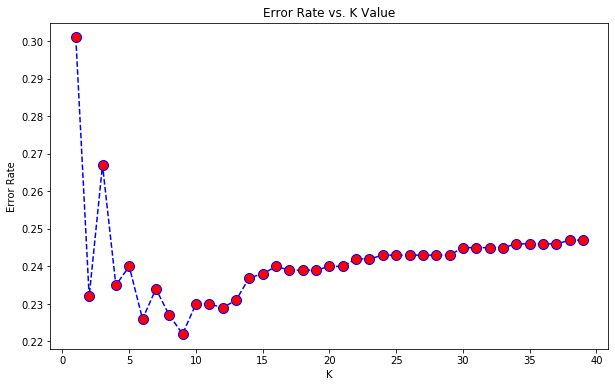

In [112]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [121]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(train_x,train_y)
pred_i = knn.predict(test_x)
errormetrics(test_y,pred_i)

0.778
[[727   9]
 [213  51]]
              precision    recall  f1-score   support

       <=50K       0.77      0.99      0.87       736
        >50K       0.85      0.19      0.31       264

    accuracy                           0.78      1000
   macro avg       0.81      0.59      0.59      1000
weighted avg       0.79      0.78      0.72      1000



#### Among all the models, Random forest is the best model with more accuracy